In [1]:
import os
import sys
import uproot
from glob import glob
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import datetime
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
NanoAODSchema.warn_missing_crossrefs = False
from coffea.nanoevents.methods import vector
from tqdm.notebook import tqdm

from PhiCPComp import PhiCPComp

In [2]:
#file = "/Users/gsaha/Work/IPHC/HCPtoTauTau/Test1_PhiCP/GluGluHToTauTau_M125/nanoHTT_1.root"

In [3]:
#files = glob("/Users/gsaha/Work/IPHC/HCPtoTauTau/HCPTools/GluGluHToTauTau_M125/nanoHTT_*.root")

In [4]:
#files

In [5]:
"""
fptr = uproot.open('/Users/gsaha/Work/IPHC/HCPtoTauTau/HCPTools/GluGluHToTauTau_M125/nanoHTT_0.root')
events = NanoEventsFactory.from_root(fptr).events()


is_taum = (events.GenPart.pdgId == 15 ) & (events.GenPart.hasFlags(["isLastCopy"])) & (events.GenPart.status == 2)
is_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"])) & (events.GenPart.status == 2)

taum = events.GenPart[is_taum]
taup = events.GenPart[is_taup]

taum_momidx    = taum.distinctParent.genPartIdxMother
taum_mompid    = events.GenPart[taum_momidx].pdgId
taum_momstatus = events.GenPart[taum_momidx].status

taup_momidx    = taup.distinctParent.genPartIdxMother
taup_mompid    = events.GenPart[taup_momidx].pdgId
taup_momstatus = events.GenPart[taup_momidx].status

taum_momidx_   = taum_momidx[((taum_mompid == 25) & (taum_momstatus == 22))][:,:1]
taup_momidx_   = taup_momidx[((taup_mompid == 25) & (taup_momstatus == 22))][:,:1]

mask = (taum_momidx_ == taup_momidx_)

taum_h = taum[mask]
taup_h = taup[mask]
taum_h_children = ak.firsts(taum_h.distinctChildren)
taup_h_children = ak.firsts(taup_h.distinctChildren)
taus_mother     = events.GenPart[taum_momidx_]
"""

'\nfptr = uproot.open(\'/Users/gsaha/Work/IPHC/HCPtoTauTau/HCPTools/GluGluHToTauTau_M125/nanoHTT_0.root\')\nevents = NanoEventsFactory.from_root(fptr).events()\n\n\nis_taum = (events.GenPart.pdgId == 15 ) & (events.GenPart.hasFlags(["isLastCopy"])) & (events.GenPart.status == 2)\nis_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"])) & (events.GenPart.status == 2)\n\ntaum = events.GenPart[is_taum]\ntaup = events.GenPart[is_taup]\n\ntaum_momidx    = taum.distinctParent.genPartIdxMother\ntaum_mompid    = events.GenPart[taum_momidx].pdgId\ntaum_momstatus = events.GenPart[taum_momidx].status\n\ntaup_momidx    = taup.distinctParent.genPartIdxMother\ntaup_mompid    = events.GenPart[taup_momidx].pdgId\ntaup_momstatus = events.GenPart[taup_momidx].status\n\ntaum_momidx_   = taum_momidx[((taum_mompid == 25) & (taum_momstatus == 22))][:,:1]\ntaup_momidx_   = taup_momidx[((taup_mompid == 25) & (taup_momstatus == 22))][:,:1]\n\nmask = (taum_momidx_ == taup_momidx_)\n\n

In [6]:
#ak.to_list(taum_h.children.pdgId[:100])

In [7]:
"""
genidxs = ak.local_index(ev.GenPart.pdgId)

is_taum = (ev.GenPart.pdgId == 15)  & (ev.GenPart.hasFlags(["isLastCopy"])) & (ev.GenPart.status == 2)
is_taup = (ev.GenPart.pdgId == -15) & (ev.GenPart.hasFlags(["isLastCopy"])) & (ev.GenPart.status == 2)

taumidx = genidxs[is_taum]
taupidx = genidxs[is_taup]

taummomidx  = genidxs[ev.GenPart[taumidx].distinctParent.pdgId == 25]
taupmomidx  = genidxs[ev.GenPart[taupidx].distinctParent.pdgId == 25]

#taum_h = taum[taum.distinctParent.pdgId == 25]
#taup_h = taup[taup.distinctParent.pdgId == 25]
#taum_children = ak.firsts(taum_h.distinctChildren)
#taup_children = ak.firsts(taup_h.distinctChildren)

ev.GenPart[taumidx].status, taumidx, taupidx, taummomidx, taupmomidx, ev.GenPart[taummomidx].pdgId, ev.GenPart[taupmomidx].pdgId, 
"""

'\ngenidxs = ak.local_index(ev.GenPart.pdgId)\n\nis_taum = (ev.GenPart.pdgId == 15)  & (ev.GenPart.hasFlags(["isLastCopy"])) & (ev.GenPart.status == 2)\nis_taup = (ev.GenPart.pdgId == -15) & (ev.GenPart.hasFlags(["isLastCopy"])) & (ev.GenPart.status == 2)\n\ntaumidx = genidxs[is_taum]\ntaupidx = genidxs[is_taup]\n\ntaummomidx  = genidxs[ev.GenPart[taumidx].distinctParent.pdgId == 25]\ntaupmomidx  = genidxs[ev.GenPart[taupidx].distinctParent.pdgId == 25]\n\n#taum_h = taum[taum.distinctParent.pdgId == 25]\n#taup_h = taup[taup.distinctParent.pdgId == 25]\n#taum_children = ak.firsts(taum_h.distinctChildren)\n#taup_children = ak.firsts(taup_h.distinctChildren)\n\nev.GenPart[taumidx].status, taumidx, taupidx, taummomidx, taupmomidx, ev.GenPart[taummomidx].pdgId, ev.GenPart[taupmomidx].pdgId, \n'

In [8]:
"""
taummomidx    = ev.GenPart[taumidx].distinctParent.genPartIdxMother
taummompid    = ev.GenPart[taummomidx].pdgId
taummomstatus = ev.GenPart[taummomidx].status
taupmomidx    = ev.GenPart[taupidx].distinctParent.genPartIdxMother
taupmompid    = ev.GenPart[taupmomidx].pdgId
taupmomstatus = ev.GenPart[taupmomidx].status


taummomidx_ = taummomidx[((taummompid == 25) & (taummomstatus == 22))][:,:1]
taupmomidx_ = taupmomidx[((taupmompid == 25) & (taupmomstatus == 22))][:,:1]

taummomidx_, taupmomidx_, ev.GenPart[taummomidx_].status, ev.GenPart[taupmomidx_].status
"""

'\ntaummomidx    = ev.GenPart[taumidx].distinctParent.genPartIdxMother\ntaummompid    = ev.GenPart[taummomidx].pdgId\ntaummomstatus = ev.GenPart[taummomidx].status\ntaupmomidx    = ev.GenPart[taupidx].distinctParent.genPartIdxMother\ntaupmompid    = ev.GenPart[taupmomidx].pdgId\ntaupmomstatus = ev.GenPart[taupmomidx].status\n\n\ntaummomidx_ = taummomidx[((taummompid == 25) & (taummomstatus == 22))][:,:1]\ntaupmomidx_ = taupmomidx[((taupmompid == 25) & (taupmomstatus == 22))][:,:1]\n\ntaummomidx_, taupmomidx_, ev.GenPart[taummomidx_].status, ev.GenPart[taupmomidx_].status\n'

In [9]:
"""
taups_prod = None
taums_prod = None
taup_childrens_prod = None
taum_childrens_prod = None
for i,file in enumerate(files):
    fptr = uproot.open(file)
    events = NanoEventsFactory.from_root(fptr).events()
    mask_events_with_at_least_two_taus = ak.num(events.Tau.pt, axis=1) >= 2
    events = events[mask_events_with_at_least_two_taus]
    
    is_taum = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isLastCopy"]))
    is_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"]))
    
    taum = events.GenPart[is_taum]
    taup = events.GenPart[is_taup]
    
    taum_h = taum[taum.distinctParent.pdgId == 25]
    taup_h = taup[taup.distinctParent.pdgId == 25]
    taum_children = ak.firsts(taum_h.distinctChildren)
    taup_children = ak.firsts(taup_h.distinctChildren)
    
    for j in range(10):
        print(f"idx: {j}\ttaum decay: {taum_children.pdgId[j]}\t\t\ttaup decay: {taup_children.pdgId[j]}\n")
    
    if i==0:
        taups_prod = taup_h
        taums_prod = taum_h
        taup_childrens_prod = taup_children
        taum_childrens_prod = taum_children
    else:
        taups_prod = ak.concatenate([taups_prod, taup_h], axis=0)
        taums_prod = ak.concatenate([taums_prod, taum_h], axis=0)
        taup_childrens_prod = ak.concatenate([taup_childrens_prod, taup_children], axis=0)
        taum_childrens_prod = ak.concatenate([taum_childrens_prod, taum_children], axis=0)
        
    
    #taup_list.append(taup_h)
    #taum_list.append(taum_h)
    #taup_children_list.append(taup_children)
    #taum_children_list.append(taum_children)
    
#taup = ak.concatenate(taup_list, axis=0)    
#taup = ak.concatenate(taum_list, axis=0)
#taup_children = ak.concatenate(taup_children_list, axis=0)
#taum_children = ak.concatenate(taum_children_list, axis=0)
"""

'\ntaups_prod = None\ntaums_prod = None\ntaup_childrens_prod = None\ntaum_childrens_prod = None\nfor i,file in enumerate(files):\n    fptr = uproot.open(file)\n    events = NanoEventsFactory.from_root(fptr).events()\n    mask_events_with_at_least_two_taus = ak.num(events.Tau.pt, axis=1) >= 2\n    events = events[mask_events_with_at_least_two_taus]\n    \n    is_taum = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isLastCopy"]))\n    is_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"]))\n    \n    taum = events.GenPart[is_taum]\n    taup = events.GenPart[is_taup]\n    \n    taum_h = taum[taum.distinctParent.pdgId == 25]\n    taup_h = taup[taup.distinctParent.pdgId == 25]\n    taum_children = ak.firsts(taum_h.distinctChildren)\n    taup_children = ak.firsts(taup_h.distinctChildren)\n    \n    for j in range(10):\n        print(f"idx: {j}\ttaum decay: {taum_children.pdgId[j]}\t\t\ttaup decay: {taup_children.pdgId[j]}\n")\n    \n    if i==0:\n     

In [10]:

#mask1 = ak.num(taups_prod.pdgId == -15) == 1
#mask1 = (taups.pdgId == -15)   # 1709358
#ak.sum(mask1)
"""
mask1 = ak.num(taups_prod.pdgId == -15) == 1
mask2 = ak.num(taums_prod.pdgId == 15) == 1

mask = mask1 & mask2
ak.sum(mask)

taups = taups_prod[mask]
taums = taums_prod[mask]
taup_childrens = taup_childrens_prod[mask]
taum_childrens = taum_childrens_prod[mask]
"""

'\nmask1 = ak.num(taups_prod.pdgId == -15) == 1\nmask2 = ak.num(taums_prod.pdgId == 15) == 1\n\nmask = mask1 & mask2\nak.sum(mask)\n\ntaups = taups_prod[mask]\ntaums = taums_prod[mask]\ntaup_childrens = taup_childrens_prod[mask]\ntaum_childrens = taum_childrens_prod[mask]\n'

In [11]:
#mask2 = (taums.pdgId == 15)
#ak.sum(mask2)
#taups = taups[mask2]
#taums = taums[mask2]
#taup_childrens = taup_childrens[mask2]
#taum_childrens = taum_childrens[mask2]

In [12]:
#taups.pdgId, taums.pdgId, taup_childrens.pdgId, taum_childrens.pdgId

In [13]:
#ak.sum(ak.num(taups.pdgId, axis=1) == 2)

In [14]:
"""
ak.to_parquet(taups, "taup.parquet")
ak.to_parquet(taums, "taum.parquet")
ak.to_parquet(taup_childrens, "taup_decay.parquet")
ak.to_parquet(taum_childrens, "taum_decay.parquet")
"""

'\nak.to_parquet(taups, "taup.parquet")\nak.to_parquet(taums, "taum.parquet")\nak.to_parquet(taup_childrens, "taup_decay.parquet")\nak.to_parquet(taum_childrens, "taum_decay.parquet")\n'

In [15]:
taum = ak.from_parquet("taum.parquet")
taup = ak.from_parquet("taup.parquet")
taum_children = ak.from_parquet("taum_decay.parquet")
taup_children = ak.from_parquet("taup_decay.parquet")

In [16]:
taup_children.pdgId

<Array [[-16, 111, 211], ... [-16, 111, 211]] type='1709262 * option[var * ?int32]'>

In [17]:
taum.pdgId

<Array [[15], [15], [15], ... [15], [15], [15]] type='1709262 * var * ?int32'>

In [18]:
"""
is_taum = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isLastCopy"]))
is_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"]))

taum_idxs = genidxs[is_taum]
taup_idxs = genidxs[is_taup]
taum_idxs, taup_idxs

gentaum = events.GenPart[taum_idxs]
gentaum.distinctParent.pdgId == 25

taum_idxs_h = taum_idxs[events.GenPart[taum_idxs].distinctParent.pdgId == 25]
taup_idxs_h = taup_idxs[events.GenPart[taup_idxs].distinctParent.pdgId == 25]

taum_idxs_h, taup_idxs_h

taum = events.GenPart[taum_idxs_h]
taup = events.GenPart[taup_idxs_h]
taum.pdgId, taup.pdgId

taum_children = ak.firsts(taum_h.distinctChildren)
taup_children = ak.firsts(taup_h.distinctChildren)
taum_children, taup_children
"""

'\nis_taum = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isLastCopy"]))\nis_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"]))\n\ntaum_idxs = genidxs[is_taum]\ntaup_idxs = genidxs[is_taup]\ntaum_idxs, taup_idxs\n\ngentaum = events.GenPart[taum_idxs]\ngentaum.distinctParent.pdgId == 25\n\ntaum_idxs_h = taum_idxs[events.GenPart[taum_idxs].distinctParent.pdgId == 25]\ntaup_idxs_h = taup_idxs[events.GenPart[taup_idxs].distinctParent.pdgId == 25]\n\ntaum_idxs_h, taup_idxs_h\n\ntaum = events.GenPart[taum_idxs_h]\ntaup = events.GenPart[taup_idxs_h]\ntaum.pdgId, taup.pdgId\n\ntaum_children = ak.firsts(taum_h.distinctChildren)\ntaup_children = ak.firsts(taup_h.distinctChildren)\ntaum_children, taup_children\n'

In [19]:
for i in range(10):
    print(f"idx: {i}\ttaum decay: {taum_children.pdgId[i]}\t\t\ttaup decay: {taup_children.pdgId[i]}\n")

idx: 0	taum decay: [16, 111, -211]			taup decay: [-16, 111, 211]

idx: 1	taum decay: [16, 111, 111, 111, -211]			taup decay: [-16, 111, 211]

idx: 2	taum decay: [16, 111, -211, -211, 211]			taup decay: [-16, 211, 211, -211]

idx: 3	taum decay: [16, -211, -211, 211]			taup decay: [-16, 211]

idx: 4	taum decay: [16, -211]			taup decay: [-16, 211, 211, -211]

idx: 5	taum decay: [16, 111, -211, -311]			taup decay: [-16, 211, 211, -211]

idx: 6	taum decay: [16, -211, -211, 211]			taup decay: [-16, 211, 211, -211]

idx: 7	taum decay: [16, 111, -211]			taup decay: [-16, 111, 211]

idx: 8	taum decay: [16, 13, -14]			taup decay: [-16, 211]

idx: 9	taum decay: [16, 111, 111, -211]			taup decay: [-16, 111, 211, 211, -211]



In [20]:
"""
#events = ak.concatenate([eventlist[0]], axis=0)
events = eventlist[0]
# get the genpart local indices
genidxs = ak.local_index(events.GenPart.pdgId)
#genidxs = ak.local_index(events.pdgId)

is_taum_from_h = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isFirstCopy"])) & (events.GenPart.parent.pdgId == 25)
is_taup_from_h = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isFirstCopy"])) & (events.GenPart.parent.pdgId == 25)

is_taum_from_h = ak.fill_none(is_taum_from_h, False)
is_taup_from_h = ak.fill_none(is_taup_from_h, False)

taum_idxs = genidxs[is_taum_from_h]
taup_idxs = genidxs[is_taup_from_h]

# Get the children

taum_decay = events.GenPart[taum_idxs].children
taup_decay = events.GenPart[taup_idxs].children

hasloop_taum = ak.sum(taum_decay.pdgId == 15, axis=-1)
hasloop_taup = ak.sum(taup_decay.pdgId == -15, axis=-1)
print(hasloop_taum, hasloop_taup)

taum_decay_decay = ak.firsts(taum_decay.children, axis=2)
taup_decay_decay = ak.firsts(taup_decay.children, axis=2)

taum_children = ak.where(hasloop_taum == 0, taum_decay, taum_decay_decay)
taup_children = ak.where(hasloop_taup == 0, taup_decay, taup_decay_decay)

for i in range(10):
    print(f"idx: {i}\ttaum decay: {taum_children.pdgId[i]}\t\t\ttaup decay: {taup_children.pdgId[i]}\n")
    
taum = events.GenPart[taum_idxs]#.GenPart[taum_idxs]
taup = events.GenPart[taup_idxs]#.GenPart[taup_idxs]

taum_children_2 = ak.firsts(taum_children, axis=1)
taup_children_2 = ak.firsts(taup_children, axis=1)

mask = (ak.num(taum_children_2.pdgId, axis=1) > 0) & (ak.num(taup_children_2.pdgId, axis=1) > 0)

taum = taum[mask]
taum_children = taum_children_2[mask]

taup = taup[mask]
taup_children = taup_children_2[mask]

print(taum.pdgId, taum_children.pdgId, taup.pdgId, taup_children.pdgId)
"""

'\n#events = ak.concatenate([eventlist[0]], axis=0)\nevents = eventlist[0]\n# get the genpart local indices\ngenidxs = ak.local_index(events.GenPart.pdgId)\n#genidxs = ak.local_index(events.pdgId)\n\nis_taum_from_h = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isFirstCopy"])) & (events.GenPart.parent.pdgId == 25)\nis_taup_from_h = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isFirstCopy"])) & (events.GenPart.parent.pdgId == 25)\n\nis_taum_from_h = ak.fill_none(is_taum_from_h, False)\nis_taup_from_h = ak.fill_none(is_taup_from_h, False)\n\ntaum_idxs = genidxs[is_taum_from_h]\ntaup_idxs = genidxs[is_taup_from_h]\n\n# Get the children\n\ntaum_decay = events.GenPart[taum_idxs].children\ntaup_decay = events.GenPart[taup_idxs].children\n\nhasloop_taum = ak.sum(taum_decay.pdgId == 15, axis=-1)\nhasloop_taup = ak.sum(taup_decay.pdgId == -15, axis=-1)\nprint(hasloop_taum, hasloop_taup)\n\ntaum_decay_decay = ak.firsts(taum_decay.children, axis=2)\ntaup_decay_decay = a

In [21]:
#for i in events.fields:
#    temp = events[i].fields
#    print(f"{i}\n{temp}\n")

In [22]:
"""
def get_mom(idxs):
    gens = events.GenPart[idxs]
    mompid = gens.parent.pdgId
    gmompid = gens.parent.parent.pdgId
    ggmompid = gens.parent.parent.parent.pdgId
    mompid = ak.where(gens.pdgId == mompid, 
                      gmompid,
                      ak.where(gens.pdgId == gmompid, ggmompid, gmompid))
    return mompid
"""

'\ndef get_mom(idxs):\n    gens = events.GenPart[idxs]\n    mompid = gens.parent.pdgId\n    gmompid = gens.parent.parent.pdgId\n    ggmompid = gens.parent.parent.parent.pdgId\n    mompid = ak.where(gens.pdgId == mompid, \n                      gmompid,\n                      ak.where(gens.pdgId == gmompid, ggmompid, gmompid))\n    return mompid\n'

In [23]:
# prepare masks to select taus 

"""
is_taum_from_h = (events.pdgId == 15) & (events.hasFlags(["isFirstCopy"])) & (events.parent.pdgId == 25)
is_taup_from_h = (events.pdgId == -15) & (events.hasFlags(["isFirstCopy"])) & (events.parent.pdgId == 25)

is_taum_from_h = ak.fill_none(is_taum_from_h, False)
is_taup_from_h = ak.fill_none(is_taup_from_h, False)
is_taum_from_h, is_taup_from_h
"""

'\nis_taum_from_h = (events.pdgId == 15) & (events.hasFlags(["isFirstCopy"])) & (events.parent.pdgId == 25)\nis_taup_from_h = (events.pdgId == -15) & (events.hasFlags(["isFirstCopy"])) & (events.parent.pdgId == 25)\n\nis_taum_from_h = ak.fill_none(is_taum_from_h, False)\nis_taup_from_h = ak.fill_none(is_taup_from_h, False)\nis_taum_from_h, is_taup_from_h\n'

In [24]:
# get the indices of the selected taus

#taum_idxs, taup_idxs

In [25]:
#ak.max(ak.num(taup_idxs))

In [26]:
#np.unique(ak.ravel(ak.sort(events.GenPart[taum_idxs].status, ascending=False, axis=0)).to_numpy())
#np.unique(ak.ravel(ak.sort(events[taum_idxs].status, ascending=False, axis=0)).to_numpy())

In [27]:

"""
taum_decay = events[taum_idxs].children
taup_decay = events[taup_idxs].children
"""
#taum_decay = ak.firsts(genpart[taum_idxs].children)
#taup_decay = ak.firsts(genpart[taup_idxs].children)


#loop_taum = ak.sum((taum_decay.pdgId == 15), axis=1)[..., None][...,:]
#loop_taup = ak.sum((taup_decay.pdgId == -15), axis=1)[..., None][...,:]

#taum_decay.pdgId[:2], taup_decay.pdgId[:2]

'\ntaum_decay = events[taum_idxs].children\ntaup_decay = events[taup_idxs].children\n'

In [28]:


#taum_decay_decay = ak.firsts(taum_decay.children, axis=2)
#taup_decay_decay = ak.firsts(taup_decay.children, axis=2)

In [29]:
#taum_decay_decay.pdgId[:2], taup_decay_decay.pdgId[:2]

In [30]:
#taum_children = ak.where(hasloop_taum == 0, taum_decay, taum_decay_decay)
#taup_children = ak.where(hasloop_taup == 0, taup_decay, taup_decay_decay)

In [31]:
#taum_children.pdgId

In [32]:
#taup_children.pdgId

In [33]:
"""
phicp_obj = PhiCPComp(cat="pipi", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
phicp
"""

'\nphicp_obj = PhiCPComp(cat="pipi", \n                      taum=taum,\n                      taup=taup,\n                      taum_decay=taum_children,\n                      taup_decay=taup_children)\nphicp = phicp_obj.comp_phiCP()\nphicp\n'

In [34]:
"""
phicp_obj = PhiCPComp(cat="pipi", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
#phicp = phicp_obj.comp_PhiCP_DP()
phicp
"""

'\nphicp_obj = PhiCPComp(cat="pipi", \n                      taum=taum,\n                      taup=taup,\n                      taum_decay=taum_children,\n                      taup_decay=taup_children)\nphicp = phicp_obj.comp_phiCP()\n#phicp = phicp_obj.comp_PhiCP_DP()\nphicp\n'

 --- comp_phiCP --- 
 --- gethvecs --- 
 
--- gethvecs_a1a1 --- 
 

--- get_evtinfo_a1a1 --- 
 --- get the masks to select a1-a1 events --- 
 --- then construct Lorentz vector --- 
Selection of a1-a1 pair [mask]: [False, False, False, False, False, False, ... False, False, False, False, False]
n total events: 1709262
n selected events: 35094
 [15]	[16, -211, -211, 211]
 [49.2]	[32.2, 2.53, 9.69, 4.83]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [76.8]	[21.1, 6.45, 7.28, 42]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [68.2]	[11.1, 17.9, 22.4, 16.8]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [49.8]	[18.4, 9.47, 17.6, 4.28]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [50.6]	[2.23, 38.9, 5.28, 4.28]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [74.2]	[36.5, 1.94, 17.2, 18.6]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [49.1]	[7.55, 15.4, 13.1, 13.1]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [69]	[25, 10.2, 19.2, 14.6]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -

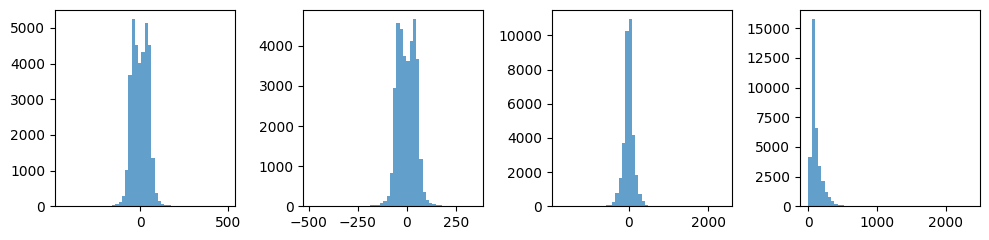

    pt: [[49.2], [68.2], [50.6], [49.1], [51], ... [44.5], [30.2], [68.5], [64], [11.8]]
    eta: [[-0.236], [1.29], [0.791], [-1.43], [-0.109, ... [-2.11], [1.8], [1.45], [-3.34]]
    phi: [[-2.92], [-2.52], [-2.64], [-0.449], ... [-1.95], [-1.8], [0.085], [-0.605]]
    M: [[1.78], [1.78], [1.78], [1.78], [1.78], ... [1.78], [1.78], [1.78], [1.78], [1.78]]
 ---> Plotting ---> 


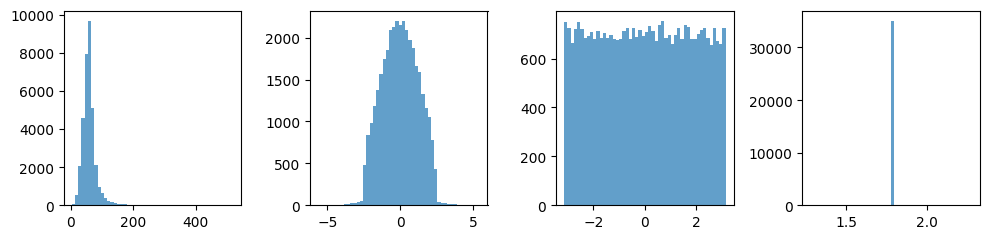

  ===> os pion in lab frame ===>
    px: [[-4.78], [-13.8], [-3.74], [12], [0.517, ... [-0.387], [-4.55], [15.6], [1.52]]
    py: [[-0.644], [-9.64], [-2.09], [-5.33], ... [-1.14], [-20.5], [1.14], [-1.36]]
    pz: [[-0.966], [27.6], [3.5], [-26.2], [-0.143, ... [-5.6], [63.4], [31.3], [-23]]
    E: [[4.93], [32.3], [5.53], [29.3], [0.727], ... [19], [5.73], [66.8], [35], [23.1]]
 ---> Plotting ---> 


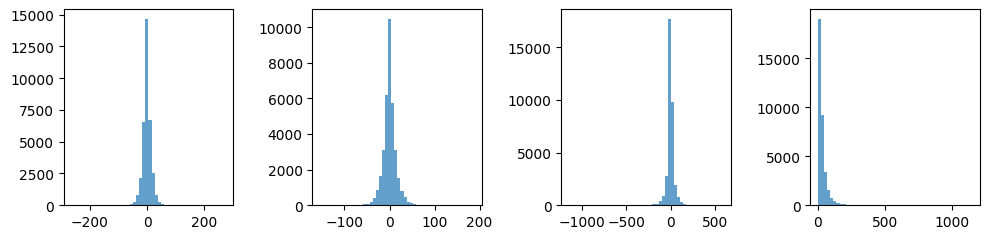

    pt: [[4.83], [16.8], [4.28], [13.1], [0.699], ... [17.8], [1.2], [21], [15.6], [2.04]]
    eta: [[-0.199], [1.27], [0.746], [-1.45], ... [-2.24], [1.82], [1.45], [-3.12]]
    phi: [[-3.01], [-2.53], [-2.63], [-0.419], ... [-1.9], [-1.79], [0.0728], [-0.732]]
    M: [[0.14], [0.14], [0.14], [0.14], [0.14], ... [0.14], [0.14], [0.14], [0.14], [0.14]]
 ---> Plotting ---> 


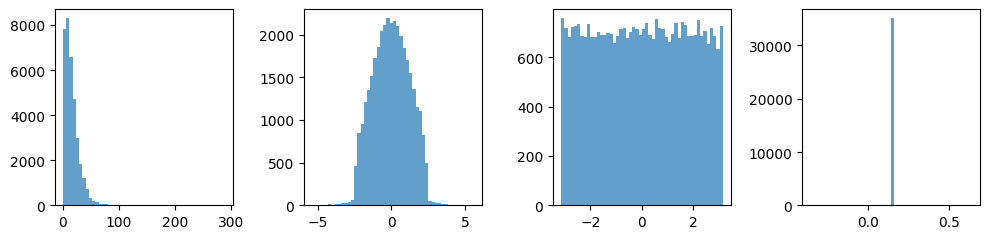

  ===> ss pion1 in lab frame ===>
    px: [[-2.45], [-14.6], [-34.1], [13.8], [18.2, ... [-3.69], [-7.36], [17.8], [0.429]]
    py: [[-0.648], [-10.4], [-18.7], [-6.78], ... [-8.24], [-33.2], [1.91], [-0.352]]
    pz: [[-0.639], [30.7], [34.2], [-29.6], [-2.04, ... [-36.1], [101], [37.1], [-10.5]]
    E: [[2.61], [35.5], [51.8], [33.4], [23.7], ... [11.9], [37.2], [107], [41.2], [10.5]]
 ---> Plotting ---> 


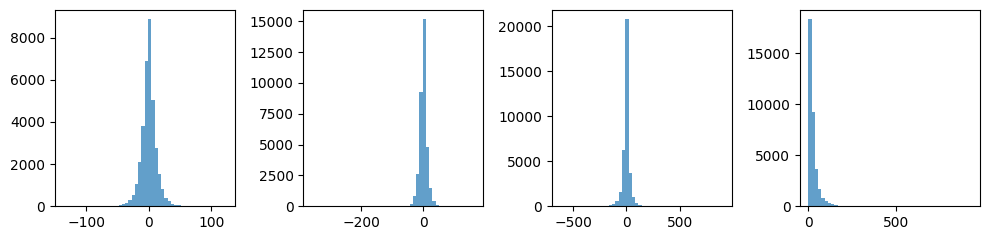

    pt: [[2.53], [17.9], [38.9], [15.4], [23.6], ... [11.2], [9.03], [34], [17.9], [0.555]]
    eta: [[-0.25], [1.31], [0.793], [-1.41], ... [-2.09], [1.81], [1.48], [-3.63]]
    phi: [[-2.88], [-2.52], [-2.64], [-0.457], ... [-1.99], [-1.79], [0.107], [-0.688]]
    M: [[0.14], [0.14], [0.14], [0.14], [0.14], ... [0.14], [0.14], [0.14], [0.14], [0.14]]
 ---> Plotting ---> 


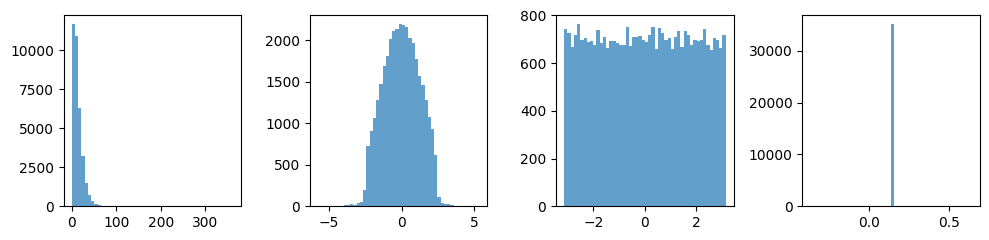

  ===> ss pion2 in lab frame ===>
    px: [[-9.4], [-18.5], [-4.63], [11.7], [15.3, ... 2.5], [-4.46], [-2.55], [11.4], [3.82]]
    py: [[-2.33], [-12.7], [-2.54], [-5.75], ... [-12.5], [-9.7], [0.544], [-2.64]]
    pz: [[-2.35], [36.6], [4.4], [-25.3], [-2.31, ... [-54.7], [28.9], [22.6], [-63.6]]
    E: [[9.97], [42.9], [6.87], [28.4], [19.8], ... [6.59], [56.3], [30.6], [25.3], [63.8]]
 ---> Plotting ---> 


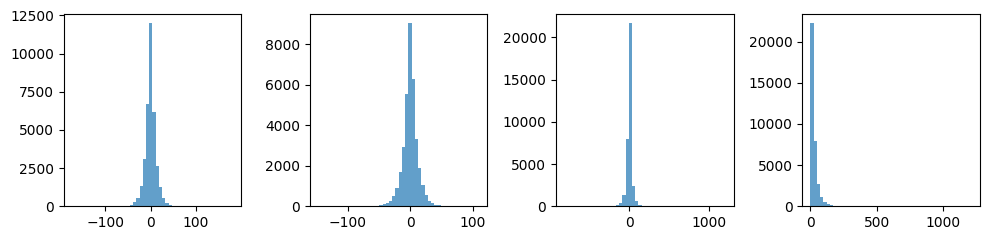

    pt: [[9.69], [22.4], [5.28], [13.1], [19.6], ... [6.09], [13.2], [10], [11.4], [4.64]]
    eta: [[-0.24], [1.27], [0.758], [-1.41], [-0.118, ... [-2.12], [1.78], [1.44], [-3.31]]
    phi: [[-2.9], [-2.54], [-2.64], [-0.456], ... [-1.91], [-1.83], [0.0479], [-0.605]]
    M: [[0.14], [0.14], [0.14], [0.14], [0.14], ... [0.14], [0.14], [0.14], [0.14], [0.14]]
 ---> Plotting ---> 


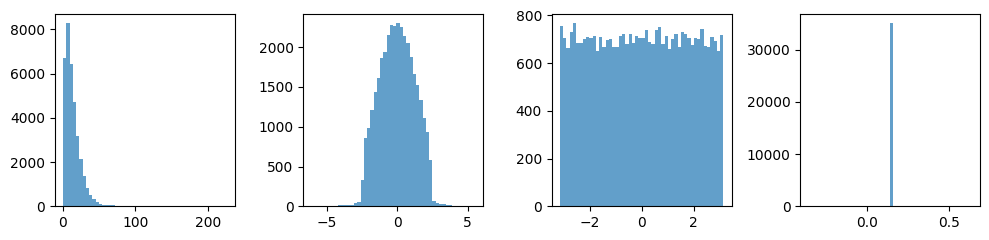

  ===> a1 in lab frame ===>
    px: [[-16.6], [-46.8], [-42.5], [37.5], [34, ... 15.7], [-8.54], [-14.5], [44.7], [5.76]]
    py: [[-3.62], [-32.7], [-23.3], [-17.9], ... [-21.9], [-63.4], [3.59], [-4.36]]
    pz: [[-3.95], [94.8], [42.1], [-81.1], [-4.5], ... -13.3], [-96.4], [193], [91], [-97.1]]
    E: [[17.5], [111], [64.2], [91.1], [44.1], ... [37.5], [99.2], [204], [101], [97.4]]
 ---> Plotting ---> 


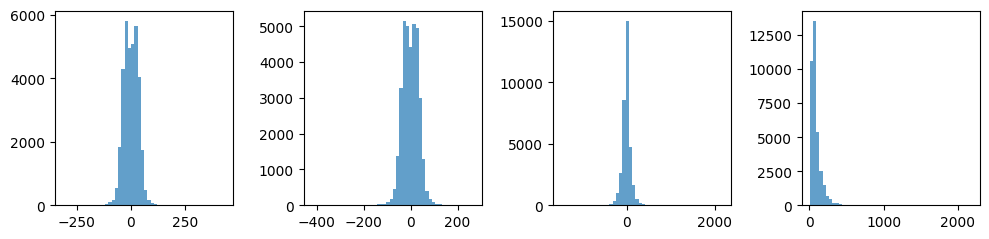

    pt: [[17], [57.1], [48.4], [41.5], [43.9], ... [35], [23.5], [65], [44.9], [7.22]]
    eta: [[-0.23], [1.28], [0.785], [-1.42], [-0.102, ... [-2.12], [1.81], [1.46], [-3.29]]
    phi: [[-2.93], [-2.53], [-2.64], [-0.445], ... [-1.94], [-1.8], [0.0801], [-0.648]]
    M: [[1.05], [1.23], [1.03], [1.06], [1.47], ... [1.18], [1.35], [1.37], [1.39], [1.18]]
 ---> Plotting ---> 


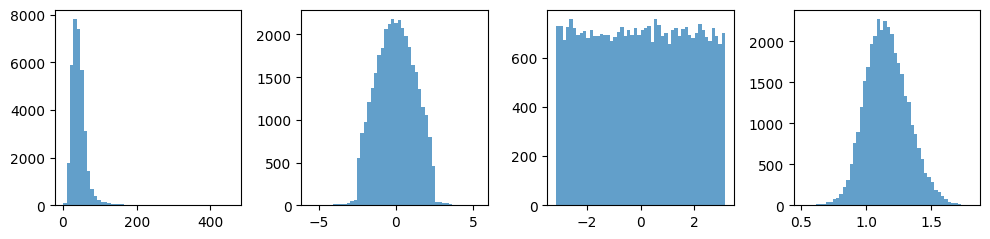

  ===> Boostvec: Higgs Rest Frame ===>
    x: [[0.129], [-0.189], [0.103], [-0.114], ... [0.0516], [-0.0143], [0.036], [-0.113]]
    y: [[0.235], [0.032], [0.107], [-0.011], ... [-0.0118], [-0.0324], [-0.0659], [-0.328]]
    z: [[0.0587], [0.745], [0.651], [-0.753], ... [-0.643], [0.935], [0.94], [-0.838]]
 ---> Plotting ---> 


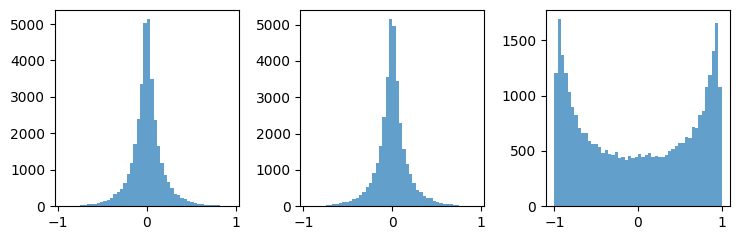

  -ve boost applied on tau and its decay products
  ===> tau in Higgs rest frame ===>
    px: [[-55.5], [-33.4], [-52], [56.1], [56.7], ... [26.8], [-16.8], [-12.4], [58.2], [28]]
    py: [[-24.3], [-43.3], [-32.2], [-20.2], [-10.7, ... [-26.8], [-60.1], [15.7], [46.3]]
    pz: [[-15.1], [26.1], [-3.62], [-18.8], [24, ... [-53.9], [11.7], [-16.4], [-31.4]]
    E: [[62.4], [60.6], [61.3], [62.6], [62.5], ... [62.5], [62.6], [62.5], [62.5], [62.6]]
 ---> Plotting ---> 


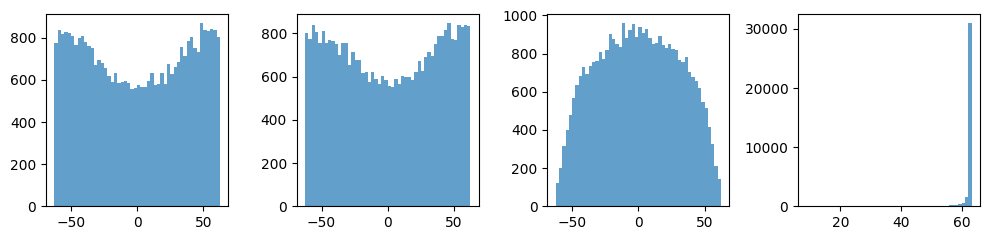

    pt: [[60.6], [54.7], [61.1], [59.6], [57.7], ... [46.9], [31.6], [61.4], [60.3], [54.1]]
    eta: [[-0.247], [0.46], [-0.0592], [-0.31], ... [-1.3], [0.189], [-0.27], [-0.551]]
    phi: [[-2.73], [-2.23], [-2.59], [-0.345], ... [-2.13], [-1.77], [0.263], [1.03]]
    M: [[1.78], [1.78], [1.78], [1.78], [1.78], ... [1.78], [1.78], [1.78], [1.78], [1.78]]
 ---> Plotting ---> 


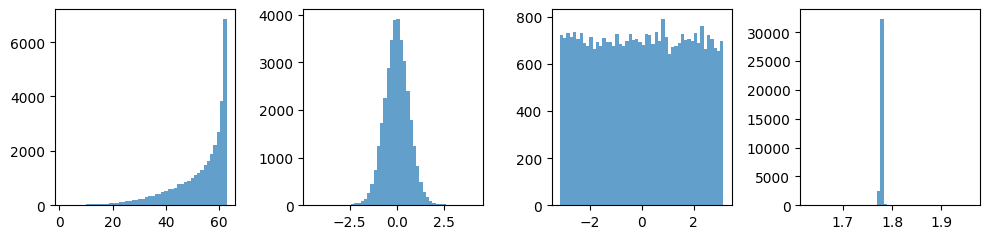

  ===> os pion in Higgs rest frame ===>
    px: [[-5.5], [-8.36], [-4.37], [15.2], [0.751, ... [-0.637], [-3.64], [14.2], [4.02]]
    py: [[-1.95], [-10.6], [-2.74], [-5.02], ... [-1.08], [-18.4], [3.62], [5.91]]
    pz: [[-1.29], [6.17], [-0.499], [-5.17], [0.26, ... [-2.49], [3.99], [-4.11], [-4.43]]
    E: [[5.98], [14.8], [5.18], [16.8], [0.826], ... [25.3], [2.79], [19.2], [15.2], [8.41]]
 ---> Plotting ---> 


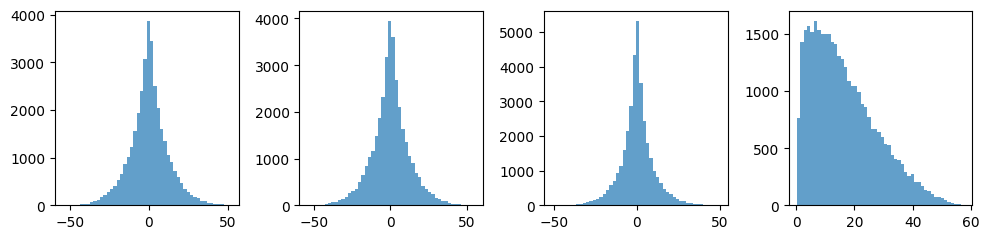

    pt: [[5.83], [13.5], [5.16], [16], [0.772], ... [18.8], [1.26], [18.8], [14.7], [7.15]]
    eta: [[-0.22], [0.443], [-0.0965], [-0.318], ... [-1.44], [0.211], [-0.276], [-0.586]]
    phi: [[-2.8], [-2.24], [-2.58], [-0.32], ... [-2.1], [-1.77], [0.249], [0.973]]
    M: [[0.14], [0.139], [0.14], [0.14], [0.14], ... 0.14], [0.14], [0.138], [0.14], [0.14]]
 ---> Plotting ---> 


/Users/gsaha/anaconda3/envs/PyTorchEnv/lib/python3.11/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


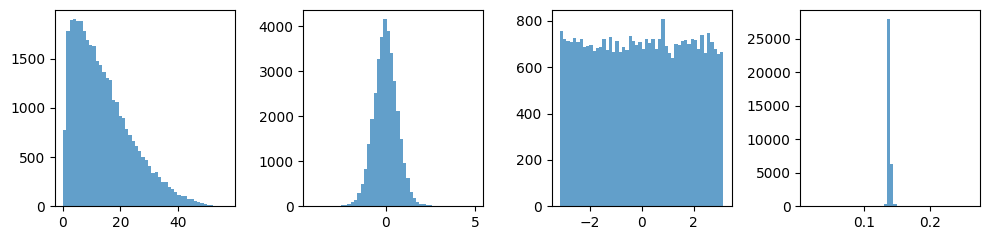

  ===> ss pion1 in Higgs rest frame ===>
    px: [[-2.83], [-8.64], [-39.9], [17.4], [26.2, ... [-5.32], [-5.91], [16.2], [1.58]]
    py: [[-1.35], [-11.4], [-24.7], [-6.43], [-4.95, ... [-7.87], [-29.9], [4.8], [2.98]]
    pz: [[-0.815], [7.26], [-2.69], [-5.5], [11.7, ... [-15.8], [5.93], [-4.21], [-1.99]]
    E: [[3.24], [16], [47], [19.4], [29.1], ... [15.6], [18.4], [31.1], [17.4], [3.91]]
 ---> Plotting ---> 


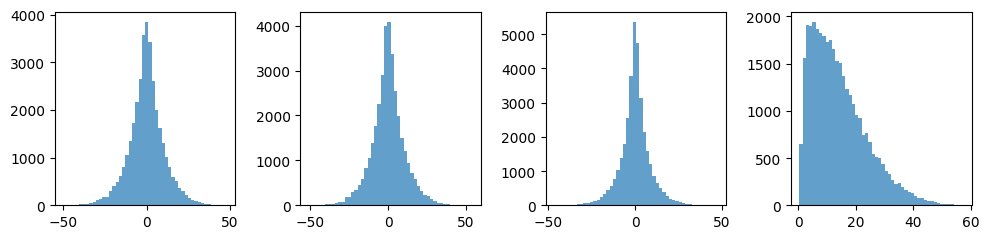

    pt: [[3.14], [14.3], [46.9], [18.6], [26.6], ... [11.8], [9.5], [30.5], [16.9], [3.37]]
    eta: [[-0.257], [0.489], [-0.0573], [-0.292], ... [-1.28], [0.193], [-0.247], [-0.561]]
    phi: [[-2.7], [-2.22], [-2.59], [-0.353], ... [-2.17], [-1.77], [0.288], [1.08]]
    M: [[0.14], [0.14], [0.139], [0.14], [0.14, ... 0.14], [0.14], [0.142], [0.138], [0.14]]
 ---> Plotting ---> 


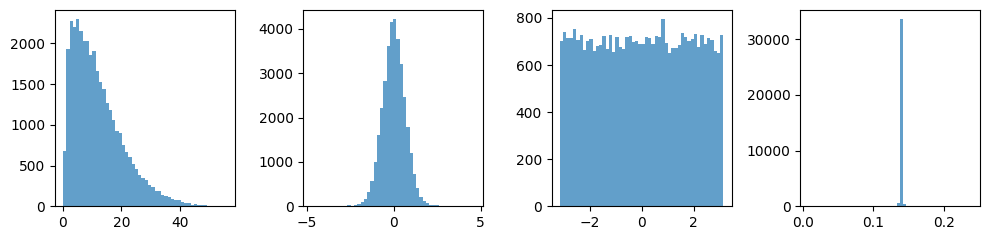

  ===> ss pion2 in Higgs rest frame ===>
    px: [[-10.9], [-11.3], [-5.41], [14.8], [21.9, ... [-6.92], [-2.13], [10.4], [10.8]]
    py: [[-5], [-13.9], [-3.35], [-5.45], [-4.06, ... [-11.9], [-8.75], [2.34], [17.6]]
    pz: [[-3.02], [8.16], [-0.552], [-4.73], [9.06, ... -6], [-24.1], [1.48], [-3.04], [-12]]
    E: [[12.3], [19.7], [6.39], [16.5], [24], ... [8.76], [27.7], [9.13], [11.1], [23.9]]
 ---> Plotting ---> 


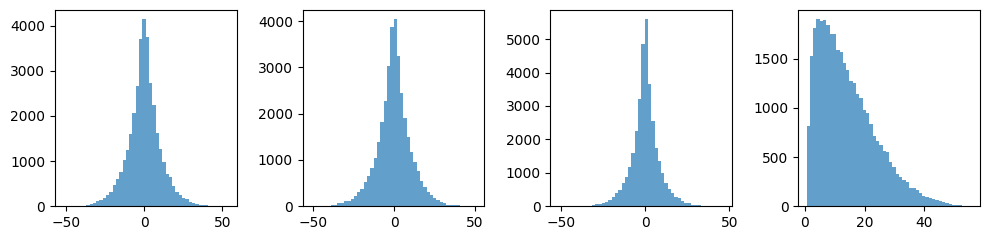

    pt: [[12], [17.9], [6.36], [15.8], [22.2], ... [6.39], [13.8], [9.01], [10.6], [20.6]]
    eta: [[-0.25], [0.44], [-0.0866], [-0.295], ... [-1.32], [0.163], [-0.282], [-0.552]]
    phi: [[-2.71], [-2.25], [-2.59], [-0.352], ... [-2.1], [-1.81], [0.222], [1.02]]
    M: [[0.14], [0.139], [0.14], [0.14], [0.14, ... 0.14], [0.138], [0.14], [0.14], [0.139]]
 ---> Plotting ---> 


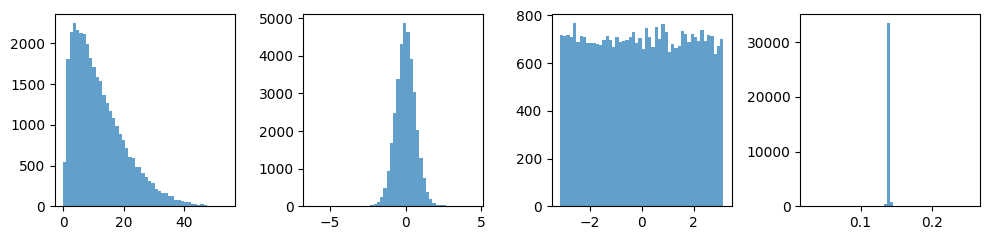

  ===> temp a1 in Higgs rest frame ===>
    px: [[-19.2], [-28.3], [-49.7], [47.4], [48.8, ... 21], [-12.9], [-11.7], [40.8], [16.4]]
    py: [[-8.29], [-35.9], [-30.8], [-16.9], [-9.19, ... [-20.9], [-57.1], [10.8], [26.5]]
    pz: [[-5.12], [21.6], [-3.74], [-15.4], [21, ... [-42.4], [11.4], [-11.4], [-18.4]]
    E: [[21.6], [50.5], [58.6], [52.7], [53.9], ... [49.6], [49], [59.4], [43.7], [36.2]]
 ---> Plotting ---> 


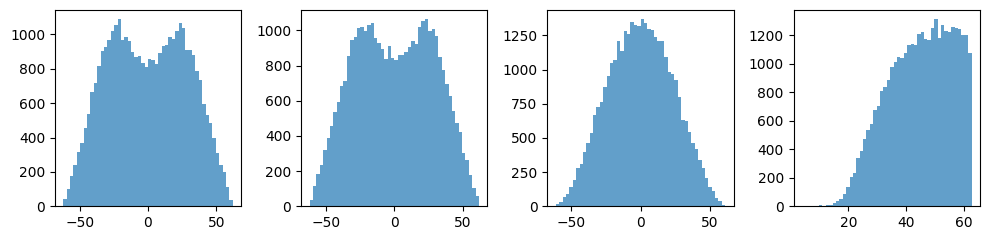

    pt: [[20.9], [45.7], [58.5], [50.4], [49.7], ... [36.9], [24.5], [58.3], [42.2], [31.1]]
    eta: [[-0.243], [0.457], [-0.0639], [-0.301], ... [-1.31], [0.194], [-0.266], [-0.561]]
    phi: [[-2.73], [-2.24], [-2.59], [-0.342], ... [-2.12], [-1.77], [0.258], [1.02]]
    M: [[1.05], [1.23], [1.03], [1.06], [1.47], ... [1.18], [1.35], [1.37], [1.39], [1.18]]
 ---> Plotting ---> 


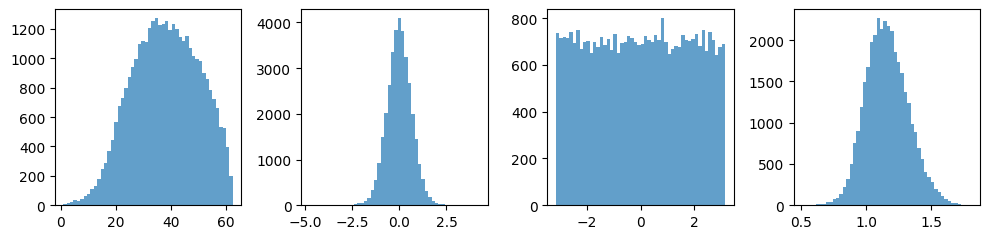

  ===> temp nu in Higgs rest frame ===>
    px: [[-36.3], [-5.09], [-2.28], [8.68], [7.9, ... [-3.94], [-0.755], [17.4], [11.6]]
    py: [[-16], [-7.47], [-1.38], [-3.29], [-1.5, ... [-5.93], [-3.05], [4.89], [19.8]]
    pz: [[-9.98], [4.48], [0.119], [-3.4], [3.05, ... [-11.6], [0.266], [-5.09], [-13]]
    E: [[40.9], [10.1], [2.67], [9.88], [8.6], ... [12.9], [13.6], [3.14], [18.8], [26.4]]
 ---> Plotting ---> 


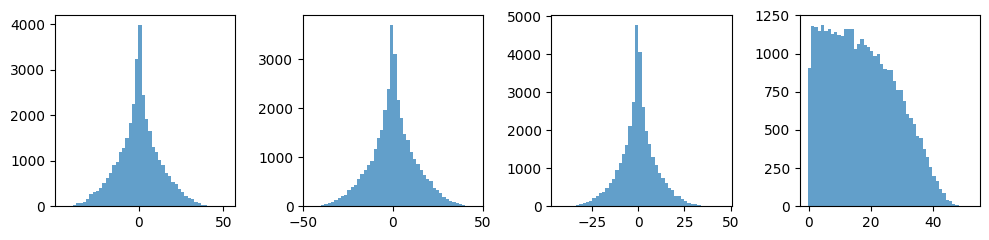

    pt: [[39.6], [9.04], [2.66], [9.28], [8.04], ... [10], [7.12], [3.14], [18.1], [23]]
    eta: [[-0.249], [0.477], [0.0445], [-0.359], ... [-1.26], [0.0847], [-0.278], [-0.538]]
    phi: [[-2.73], [-2.17], [-2.6], [-0.362], ... [-2.16], [-1.81], [0.274], [1.04]]
    M: [[nan], [nan], [0.0913], [0.114], [nan], ... [nan], [0.161], [nan], [0.172], [nan]]
 ---> Plotting ---> 


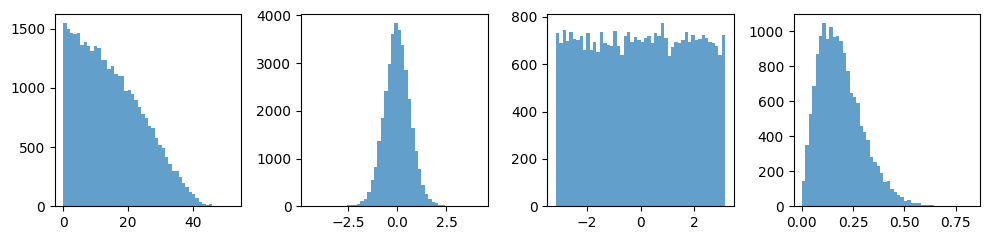

  ===> s1,s2,s3 mass in lab frame
 ---> Plotting ---> 


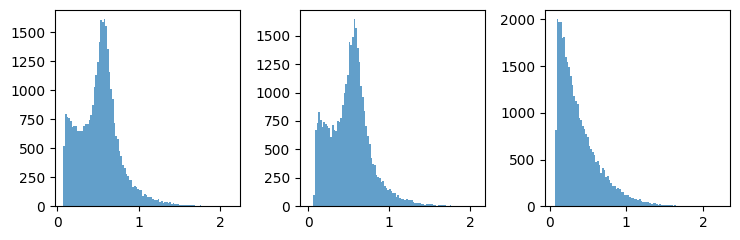

  ===> s1,s2,s3 mass in rest frame: individual boost
 ---> Plotting ---> 


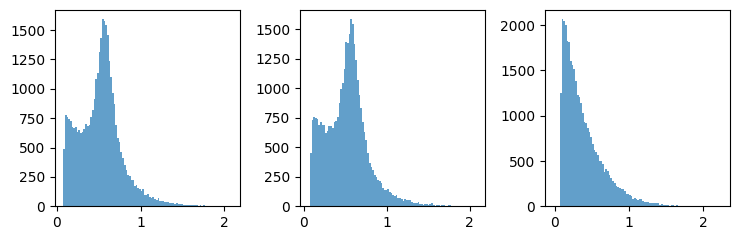

  ===> s1,s2,s3 mass in rest frame: combined boost
 ---> Plotting ---> 


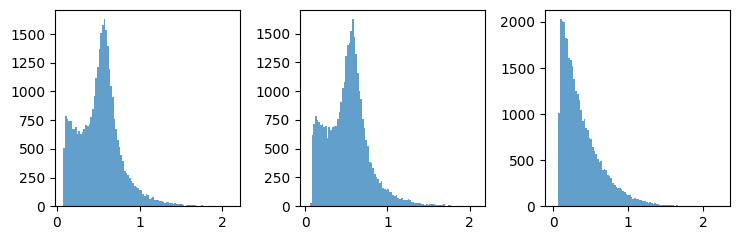

Vladimir
Configure PolarimetricA1 : Start
Configure PolarimetricA1 : End 

>> PVC : Start
>> a1 ===>
    px: [[-19.2], [-28.3], [-49.7], [47.4], [48.8, ... 21], [-12.9], [-11.7], [40.8], [16.4]]
    py: [[-8.29], [-35.9], [-30.8], [-16.9], [-9.19, ... [-20.9], [-57.1], [10.8], [26.5]]
    pz: [[-5.12], [21.6], [-3.74], [-15.4], [21, ... [-42.4], [11.4], [-11.4], [-18.4]]
    E: [[21.6], [50.5], [58.6], [52.7], [53.9], ... [49.6], [49], [59.4], [43.7], [36.2]]
 ---> Plotting ---> 


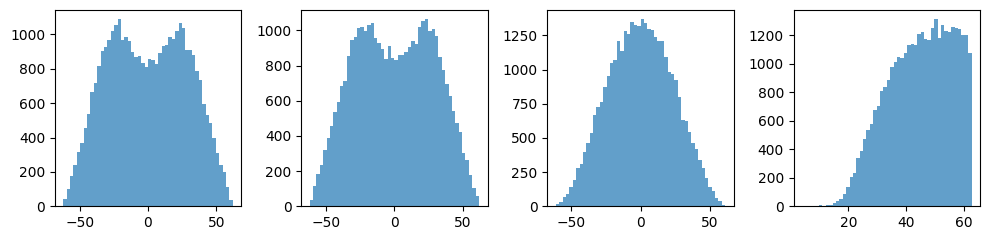

    pt: [[20.9], [45.7], [58.5], [50.4], [49.7], ... [36.9], [24.5], [58.3], [42.2], [31.1]]
    eta: [[-0.243], [0.457], [-0.0639], [-0.301], ... [-1.31], [0.194], [-0.266], [-0.561]]
    phi: [[-2.73], [-2.24], [-2.59], [-0.342], ... [-2.12], [-1.77], [0.258], [1.02]]
    M: [[1.05], [1.23], [1.03], [1.06], [1.47], ... [1.18], [1.35], [1.37], [1.39], [1.18]]
 ---> Plotting ---> 


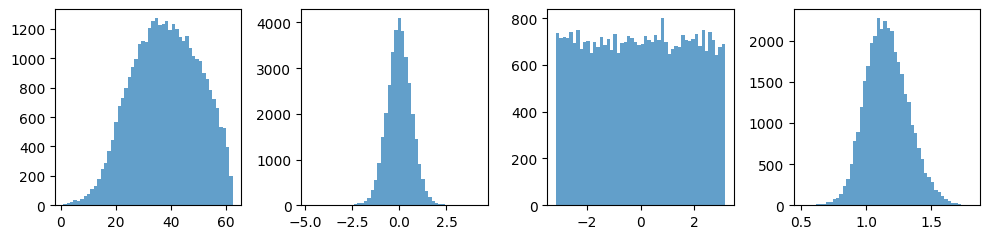

>> Nu ===>
    px: [[-36.3], [-5.09], [-2.28], [8.68], [7.9, ... [-3.94], [-0.755], [17.4], [11.6]]
    py: [[-16], [-7.47], [-1.38], [-3.29], [-1.5, ... [-5.93], [-3.05], [4.89], [19.8]]
    pz: [[-9.98], [4.48], [0.119], [-3.4], [3.05, ... [-11.6], [0.266], [-5.09], [-13]]
    E: [[40.9], [10.1], [2.67], [9.88], [8.6], ... [12.9], [13.6], [3.15], [18.8], [26.4]]
 ---> Plotting ---> 


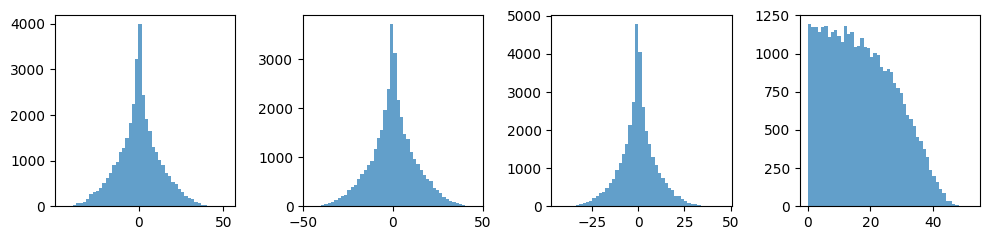

    pt: [[39.6], [9.04], [2.66], [9.28], [8.04], ... [10], [7.12], [3.14], [18.1], [23]]
    eta: [[-0.249], [0.477], [0.0445], [-0.359], ... [-1.26], [0.0847], [-0.278], [-0.538]]
    phi: [[-2.73], [-2.17], [-2.6], [-0.362], ... [-2.16], [-1.81], [0.274], [1.04]]
    M: [[0], [0], [0], [0], [0], [0], [0], [0], ... [0], [0], [0], [0], [0], [0], [0], [0]]
 ---> Plotting ---> 


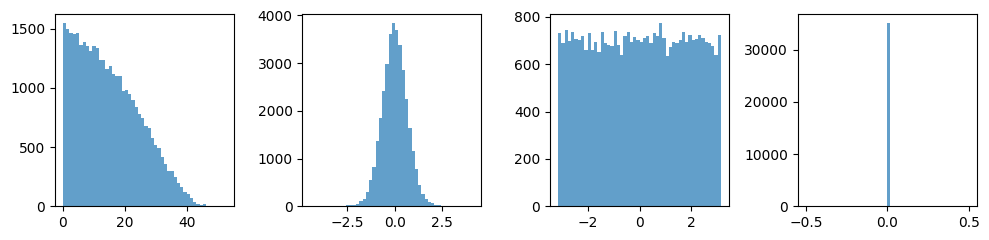

>> s1: ss2_pi + os_pi : [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>> s2: ss1_pi + os_pi : [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>> s3: ss1_pi + ss2_pi: [[0.127], [0.917], [0.442], [0.0819], ... [0.928], [0.889], [1.1], [0.444]]
 ---> Plotting ---> 


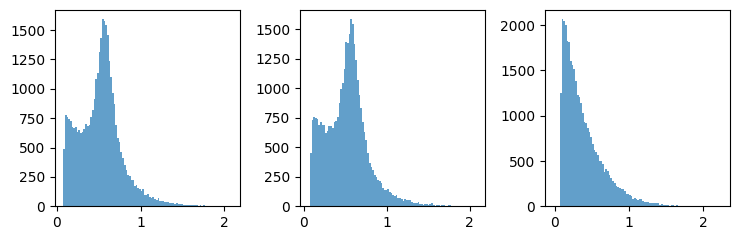

>> vec1 ===>
    px: [[2.38e+03], [4.58e+03], [3.3e+03], ... [-3.71e+03], [3.88e+03], [-6.54e+03]]
    py: [[1.03e+03], [5.81e+03], [2.04e+03], ... [-1.81e+04], [1.02e+03], [-1.06e+04]]
    pz: [[634], [-3.5e+03], [248], [-196, ... 2.83e+04], [3.62e+03], [-1.08e+03], [7.34e+03]]
    E: [[-2.67e+03], [-8.19e+03], [-3.89e+03], ... [1.89e+04], [4.15e+03], [-1.44e+04]]
 ---> Plotting ---> 


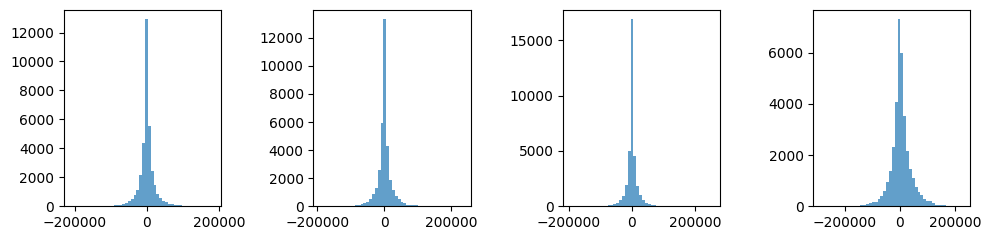

    pt: [[2.59e+03], [7.4e+03], [3.88e+03], [640, ... [1.85e+04], [4.01e+03], [1.24e+04]]
    eta: [[0.243], [-0.457], [0.064], [-0.301], ... [1.31], [0.194], [-0.266], [0.561]]
    phi: [[0.408], [0.903], [0.555], [-0.343], ... [1.02], [-1.77], [0.258], [-2.12]]
    M: [[131], [200], [68.6], [13.2], [850], [211, ... [690], [903], [437], [132], [473]]
 ---> Plotting ---> 


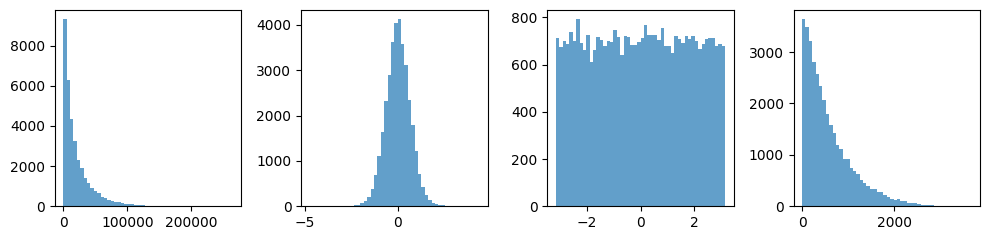

>> vec2 ===> 
    px: [[1.02e+03], [-1.13e+03], [-1.14e+05], ... [-4.35e+03], [1.99e+03], [-1.9e+03]]
    py: [[440], [-1.43e+03], [-7.08e+04], [-2.08e+03, ... [-2.13e+04], [525], [-3.07e+03]]
    pz: [[272], [859], [-8.6e+03], [-1.89e+03, ... [4.24e+03], [-556], [2.13e+03]]
    E: [[-1.14e+03], [2.01e+03], [1.35e+05], ... [2.21e+04], [2.14e+03], [-4.2e+03]]
 ---> Plotting ---> 


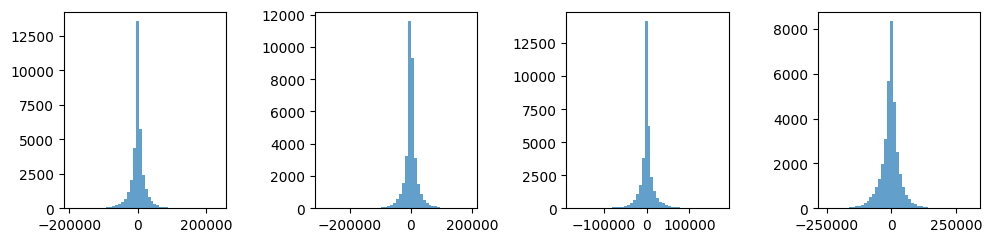

    pt: [[1.11e+03], [1.82e+03], [1.34e+05], ... [2.17e+04], [2.06e+03], [3.61e+03]]
    eta: [[0.243], [0.456], [-0.0639], [-0.301], ... [-1.31], [0.194], [-0.266], [0.561]]
    phi: [[0.408], [-2.24], [-2.59], [-0.342], ... [-2.12], [-1.77], [0.258], [-2.12]]
    M: [[55.5], [48.8], [2.37e+03], [130], [1.04e+03, ... 404], [566], [512], [67.5], [137]]
 ---> Plotting ---> 


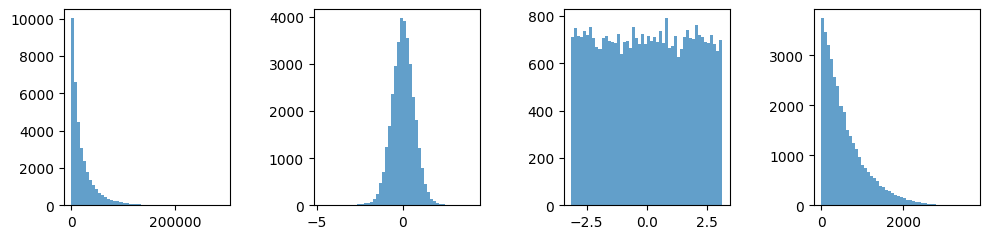

>> vec3 ===>
    px: [[-3.39e+03], [-3.46e+03], [1.11e+05], ... [8.06e+03], [-5.87e+03], [8.44e+03]]
    py: [[-1.47e+03], [-4.38e+03], [6.88e+04], ... [3.94e+04], [-1.55e+03], [1.36e+04]]
    pz: [[-906], [2.64e+03], [8.35e+03], ... [-7.86e+03], [1.64e+03], [-9.48e+03]]
    E: [[3.81e+03], [6.18e+03], [-1.31e+05], ... [-4.1e+04], [-6.29e+03], [1.86e+04]]
 ---> Plotting ---> 


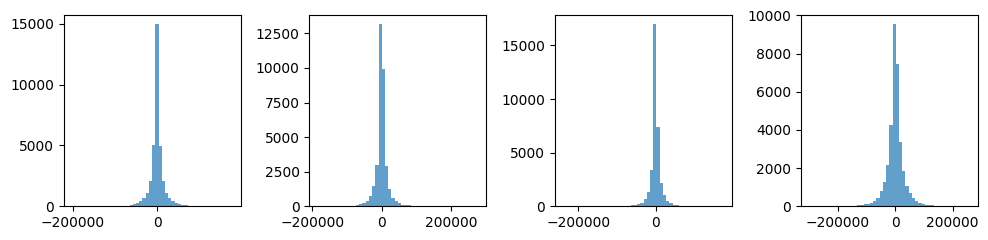

    pt: [[3.7e+03], [5.58e+03], [1.31e+05], ... [4.02e+04], [6.07e+03], [1.6e+04]]
    eta: [[-0.243], [0.457], [0.0639], [0.301], ... [-1.31], [-0.194], [0.266], [-0.561]]
    phi: [[-2.73], [-2.24], [0.555], [2.8], [2.96, ... [-2.12], [1.37], [-2.88], [1.02]]
    M: [[186], [151], [2.31e+03], [144], [186], ... [286], [336], [948], [200], [610]]
 ---> Plotting ---> 


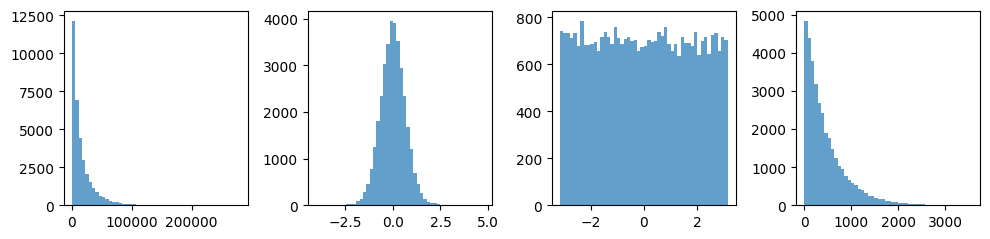

>> F1 ===>
>>>> F3PI --- : --- Start ---
>>>> BT1: 1.0	0.0
>>>> BT2: -0.11994078724388779	0.0037692910893753883
>>>> BT3: 0.3296724139496961	-0.16797648490363232
>>>> BT4: -0.0818742325871075	0.8661389092046796
>>>> BT5: -0.1330407333558646	0.6974239480173688
>>>> BT6: 1.5752332462239653	1.388754917179669
>>>> BT7: -0.09650658984451436	-0.7639283200121479
>>>> IDK: 1
>>>> IFORM: 1
>>>> S1: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>> S2: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>> S3: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
 ---> Plotting ---> 


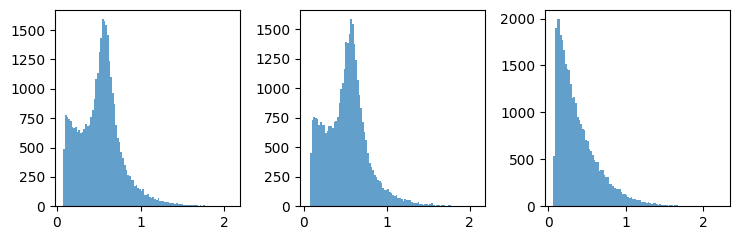

>>>> F134: [[0.202], [-0.269], [-0.118], [0.134], ... [-0.156], [-0.0282], [-0.299], [0.0579]]
>>>> F150: [[-0.0278], [-0.124], [-0.0689], [-0.00528, ... -0.14], [-0.14], [-0.156], [-0.0845]]
>>>> F167: 0.6666666666666666
>>>> FRO1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.808], [0.18], [0.0892], [0.636], ... [0.

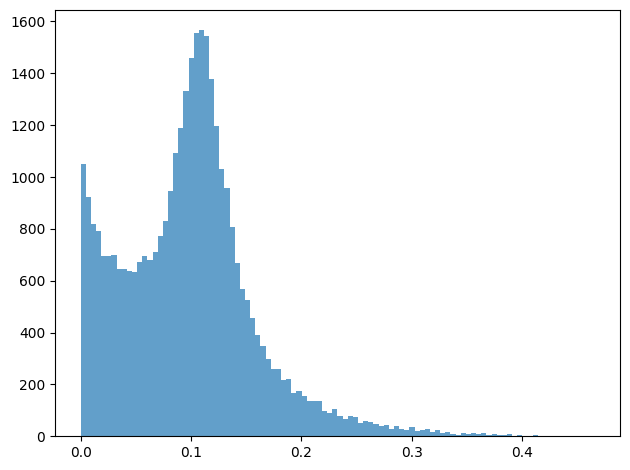

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[-0.128], [0.492], [0.516], [0.119], ... [0.144], [-0.201], [0.398], [-0.0145]] - Im: [[-0.145], [-0.0042], [-0.00058], [-0.0876, ... [-0.163], [-0.0235], [-0.119]]
 ---> Plotting ---> 


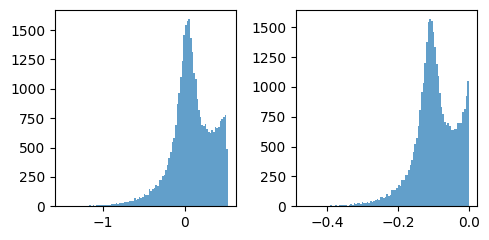

>>>>>> BWIGML out: [[-2.04], [1.22], [1.16], [3.27], [-2.05, ... [3.14], [-1.8], [1.5], [-0.606]]	[[2.32], [0.0104], [0.0013], [2.4], [2.4, ... [1.78], [1.46], [0.0885], [4.97]]
 ---> Plotting ---> 


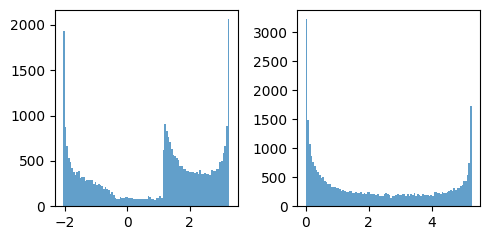

>>>>>> BWIGML : End 
>>>> FRP1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.808], [0.18], [0.0892], [0.636], ... [0.616], [0.851], [0.355], [0.734]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.185], [0.00535], [0.000737], [0.111], ... [0.104], [0.207], [0.0299], [0.151]]
>>>>>>>> GetWG

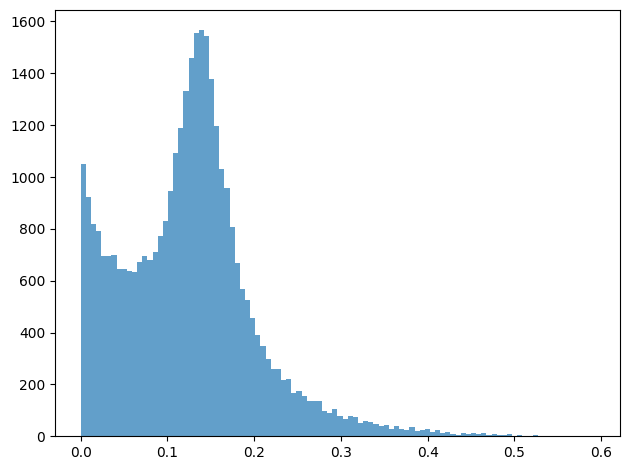

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.15], [1.77], [1.79], [1.4], [1.15], ... [1.23], [1.42], [1.08], [1.68], [1.26]] - Im: [[-0.185], [-0.00535], [-0.000737], [-0.111, ... [-0.207], [-0.0299], [-0.151]]
 ---> Plotting ---> 


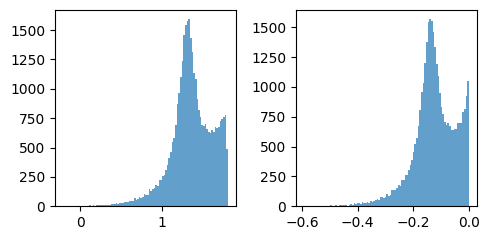

>>>>>> BWIGML out: [[1.59], [1.06], [1.05], [1.34], [1.59], ... [1.5], [1.31], [1.68], [1.12], [1.47]]	[[0.256], [0.00321], [0.00043], [0.107], ... [0.096], [0.323], [0.02], [0.175]]
 ---> Plotting ---> 


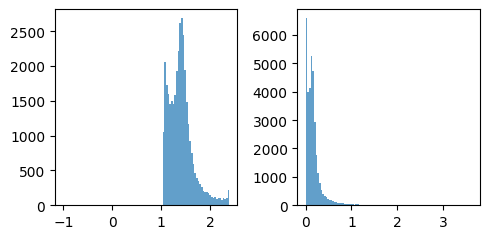

>>>>>> BWIGML : End 
>>>> FRO2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.556], [0.745], [0.774], [0.787], ... [0.71], [0.507], [0.823], [0.633]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.556], [0.745], [0.774], [0.787], ... [0.71], [0.507], [0.823], [0.633]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.483], [0.692], [0.724], [0.738], ... [0.655], [0.426], [0.776], [0.57]]
>>>>>>>> QM: 0.723979355706531
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.0478], [0.105], [0.115], [0.12], ... [0.0931], [0.0359], [0.134], [0.069]]
>>>>>>>> GetWGS 

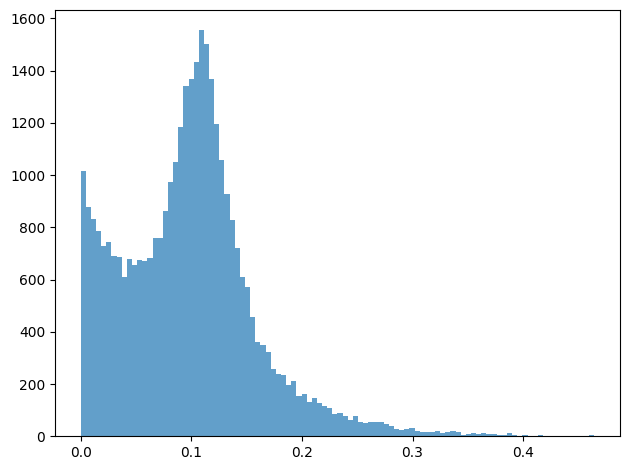

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[0.291], [0.0448], [0.000475], [-0.0198], ... [0.0955], [0.343], [-0.0778], [0.199]] - Im: [[-0.0478], [-0.105], [-0.115], [-0.12], ... -0.0931], [-0.0359], [-0.134], [-0.069]]
 ---> Plotting ---> 


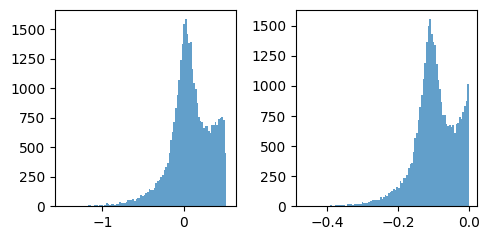

>>>>>> BWIGML out: [[2.01], [2.06], [0.0214], [-0.802], [-1.29, ... [3.22], [1.73], [-1.95], [2.69]]	[[0.33], [4.83], [5.2], [4.86], [0.728], ... 3.46], [3.14], [0.181], [3.35], [0.931]]
 ---> Plotting ---> 


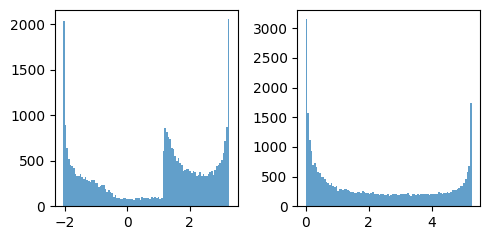

>>>>>> BWIGML : End 
>>>> FRP2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.556], [0.745], [0.774], [0.787], ... [0.71], [0.507], [0.823], [0.633]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.556], [0.745], [0.774], [0.787], ... [0.71], [0.507], [0.823], [0.633]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.483], [0.692], [0.724], [0.738], ... [0.655], [0.426], [0.776], [0.57]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.0608], [0.134], [0.147], [0.153], ... [0.118], [0.0456], [0.17], [0.0877]]
>>>>>>>

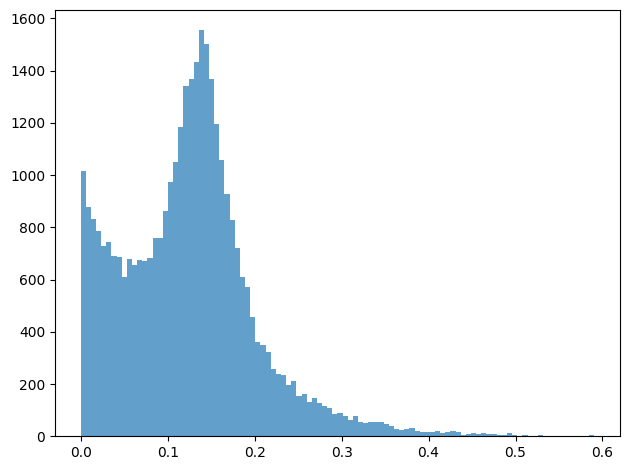

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.57], [1.32], [1.28], [1.26], [0.925], ... [1.36], [1.37], [1.62], [1.2], [1.48]] - Im: [[-0.0608], [-0.134], [-0.147], [-0.153], ... -0.118], [-0.0456], [-0.17], [-0.0877]]
 ---> Plotting ---> 


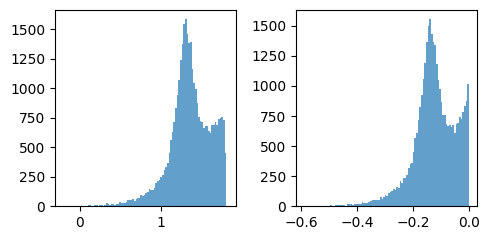

>>>>>> BWIGML out: [[1.2], [1.41], [1.45], [1.47], [1.89], ... [1.37], [1.36], [1.16], [1.53], [1.27]]	[[0.0464], [0.142], [0.166], [0.179], ... [0.117], [0.0326], [0.217], [0.0753]]
 ---> Plotting ---> 


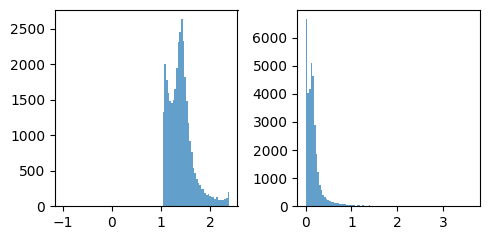

>>>>>> BWIGML : End 
>>>> FF23 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>> M: 1.275
>>>>>> G: 0.185
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.6256249999999999
>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.6256249999999999
>>>>>>>> L: 2
>>>>>>>> G: 0.185
>>>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> M: 1.275
>>>>>>>> QS: [[0.227], [0.918], [0.605], [0.0798], ... [0.923], [0.902], [1.01], [0.607]]
>>>>>>>> QM: 1.246094005205771
>>>>>>>> IPOW: 5
>>>>>>>> WGS: [[0.00017], [0.0681], [0.0123], [1.15e-06], ... 0.0699], [0.0634], [0.102], [0.0124]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], [Tru

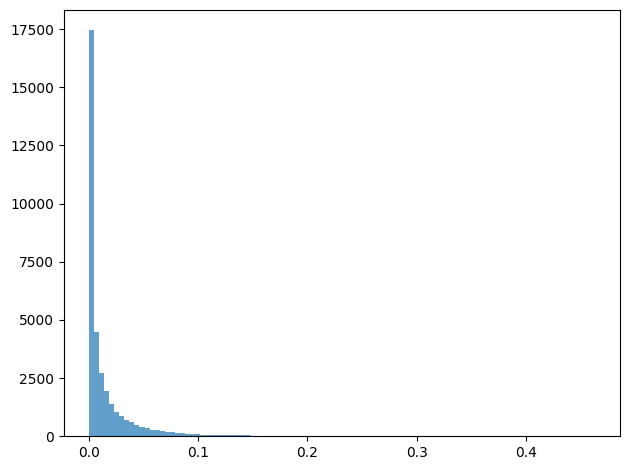

>>>>>> num - Re: 1.6256249999999999 - Im: 0
>>>>>> den - Re: [[1.5], [0.711], [1.19], [1.55], [1.08], ... [1.32], [0.7], [0.739], [0.526], [1.18]] - Im: [[-0.00017], [-0.0681], [-0.0123], [-1.15e-06, ... [-0.0634], [-0.102], [-0.0124]]
 ---> Plotting ---> 


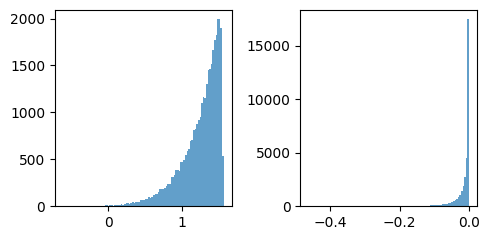

>>>>>> BWIGML out: [[1.08], [2.27], [1.37], [1.05], [1.5], ... [1.23], [2.3], [2.18], [2.98], [1.37]]	[[0.000122], [0.217], [0.0142], [7.81e-07], ... [0.23], [0.187], [0.577], [0.0144]]
 ---> Plotting ---> 


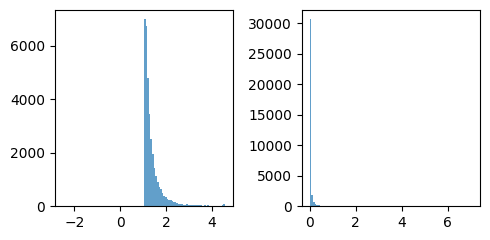

>>>>>> BWIGML : End 
>>>> FSG3 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>> M: 0.86
>>>>>> G: 0.88
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 0.7395999999999999
>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 0.7395999999999999
>>>>>>>> L: 0
>>>>>>>> G: 0.88
>>>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> M: 0.86
>>>>>>>> QS: [[0.227], [0.918], [0.605], [0.0798], ... [0.923], [0.902], [1.01], [0.607]]
>>>>>>>> QM: 0.8165324670885781
>>>>>>>> IPOW: 1
>>>>>>>> WGS: [[0.512], [0.765], [0.728], [0.226], ... [0.765], [0.764], [0.77], [0.728]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], [True], [True], [

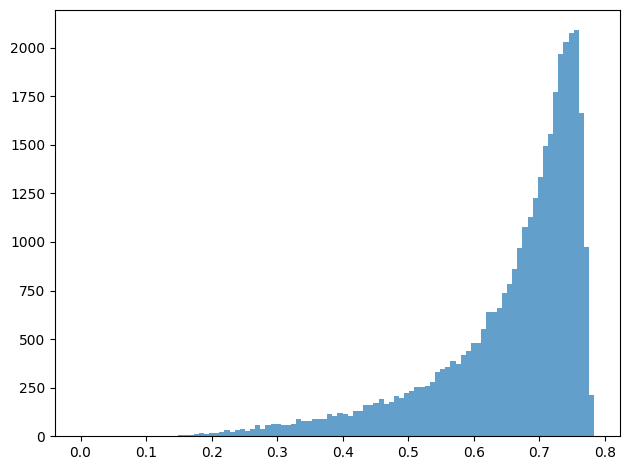

>>>>>> num - Re: 0.7395999999999999 - Im: 0
>>>>>> den - Re: [[0.615], [-0.175], [0.3], [0.66], ... [-0.186], [-0.147], [-0.36], [0.298]] - Im: [[-0.512], [-0.765], [-0.728], [-0.226], ... [-0.765], [-0.764], [-0.77], [-0.728]]
 ---> Plotting ---> 


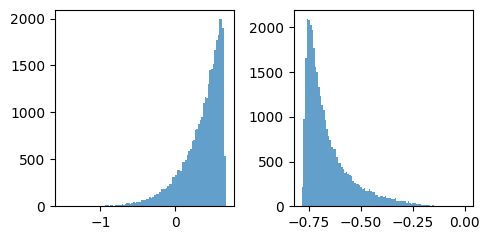

>>>>>> BWIGML out: [[0.71], [-0.211], [0.358], [1], ... [-0.222], [-0.179], [-0.368], [0.356]]	[[0.591], [0.919], [0.868], [0.343], ... [0.913], [0.934], [0.788], [0.87]]
 ---> Plotting ---> 


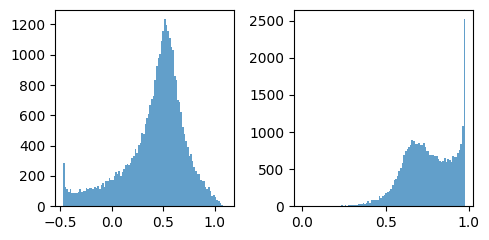

>>>>>> BWIGML : End 
>>>> FF03 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>> M: 1.186
>>>>>> G: 0.35
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.406596
>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.406596
>>>>>>>> L: 0
>>>>>>>> G: 0.35
>>>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> M: 1.186
>>>>>>>> QS: [[0.227], [0.918], [0.605], [0.0798], ... [0.923], [0.902], [1.01], [0.607]]
>>>>>>>> QM: 1.1548685075842011
>>>>>>>> IPOW: 1
>>>>>>>> WGS: [[0.274], [0.409], [0.389], [0.121], ... [0.409], [0.408], [0.412], [0.39]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], [True], [True], [True], [True], ...

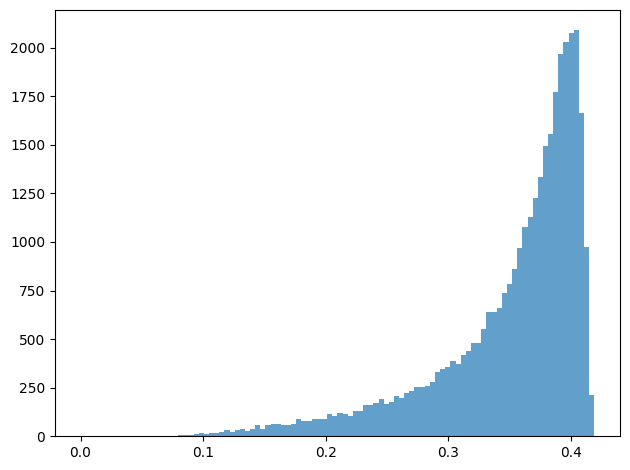

>>>>>> num - Re: 1.406596 - Im: 0
>>>>>> den - Re: [[1.28], [0.492], [0.967], [1.33], [0.863, ... [0.481], [0.52], [0.307], [0.965]] - Im: [[-0.274], [-0.409], [-0.389], [-0.121], ... [-0.409], [-0.408], [-0.412], [-0.39]]
 ---> Plotting ---> 


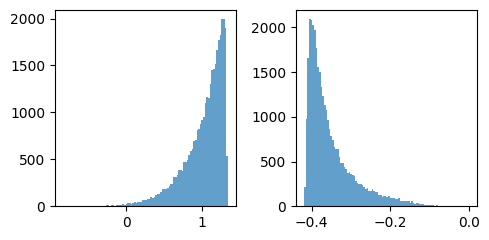

>>>>>> BWIGML out: [[1.05], [1.69], [1.25], [1.05], [1.35], ... [1.14], [1.7], [1.67], [1.64], [1.25]]	[[0.224], [1.41], [0.504], [0.0957], [0.619, ... [1.44], [1.31], [2.2], [0.506]]
 ---> Plotting ---> 


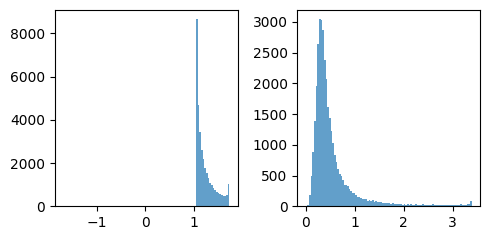

>>>>>> BWIGML : End 
>>>> F3PIFactor: [[-1.87], [0.347], [0.724], [3.86], [-2.64, ... [2.38], [-2.45], [1.5], [-0.97]]	[[3.17], [-1.02], [0.164], [3.54], [2.85], ... 5.02], [1.09], [1.07], [-1.53], [5.5]]


>>>> \\ F3PI ///
 ---> Plotting ---> 


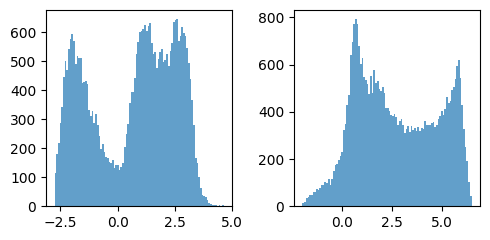

>>>>>> FA1A1P : Start
>>>>>>>> WGA1 : Start
>>>>>>>> S: [[1.1], [1.52], [1.07], [1.12], [2.16], ... [1.4], [1.83], [1.89], [1.92], [1.4]]
>>>>>>>>>> WGA1C : Start
>>>>>>>>>> G1_IM: [[4.47], [7.88], [4.1], [4.64], [13.3], ... [6.97], [10.3], [10.7], [11], [6.94]]
>>>>>>>>>> WGA1C : End 
>>>>>>>>>> WGA1N : Start
>>>>>>>>>> G1_IM: [[4.57], [7.89], [4.21], [4.74], [13.1], ... [7.01], [10.2], [10.6], [10.9], [6.99]]
>>>>>>>>>> WGA1N : End
>>>>>>>> S > MK1SQ: [[False], [False], [False], [False], ... [False], [False], [False], [False]]
>>>>>>>> GKST: [[0], [0], [0], [0], [0.157], [0], [0], [0, ... [0], [0], [0], [0], [0], [0], [0]]
>>>>>>>> out: [[0.514], [0.896], [0.473], [0.533], [1.7, ... [1.16], [1.22], [1.25], [0.792]]
>>>>>>>> WGA1 : End
>>>>>> FA1A1P: <TComplex.TComplex object at 0x310a45790>
>>>>>> FA1A1P : End
>>>> FORMA1: [[1.86], [0.298], [1.94], [1.82], ... [-0.337], [-0.388], [-0.411], [0.753]]	[[1.53], [2.13], [1.37], [1.61], [1], ... [2.21], [1.61], [1.5], [1.44], [2.2]]
>>>> \

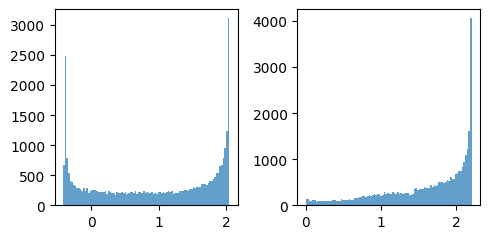

>>>> F3PIFactor x FORMA1: [[-8.33], [2.28], [1.18], [1.32], [-1.85, ... [-2.55], [-0.664], [1.59], [-12.9]]	[[3.03], [0.437], [1.31], [12.6], [-3.73], ... [0.253], [3.47], [-4.11], [2.8], [2]]
>>>> \\ F3PIFactor x FORMA1 ///
 ---> Plotting ---> 


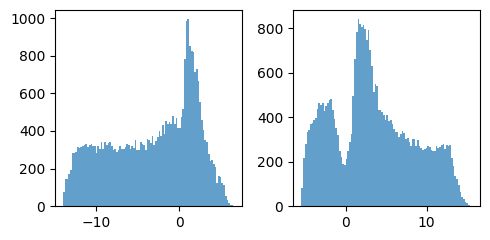

>>>> F3PI : End


>> F1: [[-7.86], [2.14], [1.11], [1.25], [-1.75, ... [-2.41], [-0.626], [1.5], [-12.1]]	[[2.86], [0.412], [1.23], [11.9], [-3.52, ... [3.27], [-3.87], [2.64], [1.89]]

 ---> Plotting ---> 


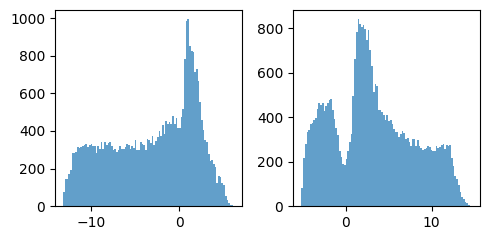

>> F2 ===>
>>>> F3PI --- : --- Start ---
>>>> BT1: 1.0	0.0
>>>> BT2: -0.11994078724388779	0.0037692910893753883
>>>> BT3: 0.3296724139496961	-0.16797648490363232
>>>> BT4: -0.0818742325871075	0.8661389092046796
>>>> BT5: -0.1330407333558646	0.6974239480173688
>>>> BT6: 1.5752332462239653	1.388754917179669
>>>> BT7: -0.09650658984451436	-0.7639283200121479
>>>> IDK: 1
>>>> IFORM: 2
>>>> S1: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>> S2: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>> S3: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
 ---> Plotting ---> 


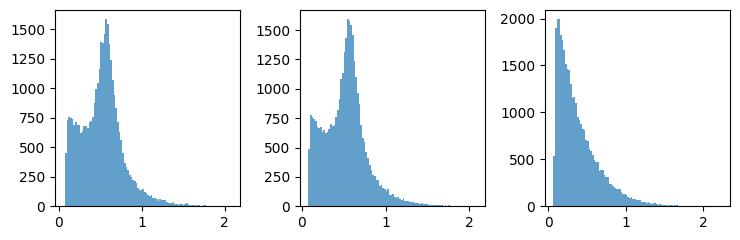

>>>> F134: [[0.062], [-0.12], [0.0536], [0.18], ... [-0.14], [-0.209], [-0.14], [-0.0133]]
>>>> F150: [[-0.0278], [-0.124], [-0.0689], [-0.00528, ... -0.14], [-0.14], [-0.156], [-0.0845]]
>>>> F167: 0.6666666666666666
>>>> FRO1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.556], [0.745], [0.774], [0.787], ... [0.71], [0.507], [0.823], [0.633]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.556], [0.745], [0.774], [0.787], ... [0.71], [0.507], [0.823], [0.633]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.483], [0.692], [0.724], [0.738],

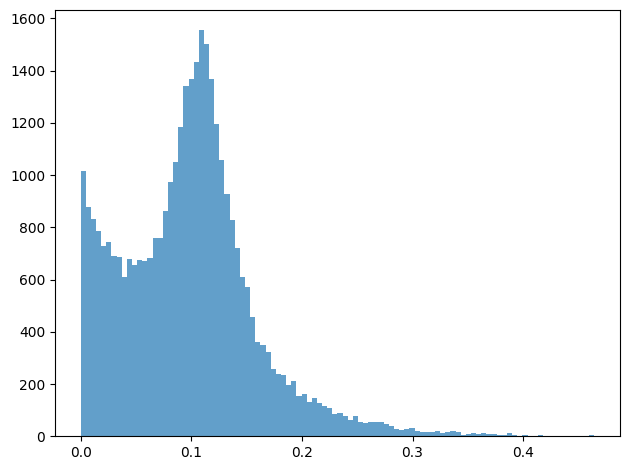

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[0.291], [0.0448], [0.000475], [-0.0198], ... [0.0955], [0.343], [-0.0778], [0.199]] - Im: [[-0.0478], [-0.105], [-0.115], [-0.12], ... -0.0931], [-0.0359], [-0.134], [-0.069]]
 ---> Plotting ---> 


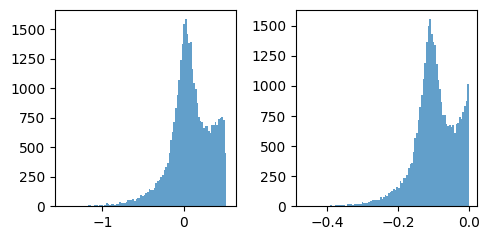

>>>>>> BWIGML out: [[2.01], [2.06], [0.0214], [-0.802], [-1.29, ... [3.22], [1.73], [-1.95], [2.69]]	[[0.33], [4.83], [5.2], [4.86], [0.728], ... 3.46], [3.14], [0.181], [3.35], [0.931]]
 ---> Plotting ---> 


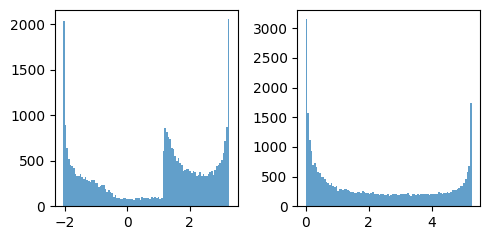

>>>>>> BWIGML : End 
>>>> FRP1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.556], [0.745], [0.774], [0.787], ... [0.71], [0.507], [0.823], [0.633]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.309], [0.555], [0.599], [0.619], [0.952, ... [0.504], [0.257], [0.677], [0.4]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.556], [0.745], [0.774], [0.787], ... [0.71], [0.507], [0.823], [0.633]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.483], [0.692], [0.724], [0.738], ... [0.655], [0.426], [0.776], [0.57]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.0608], [0.134], [0.147], [0.153], ... [0.118], [0.0456], [0.17], [0.0877]]
>>>>>>>

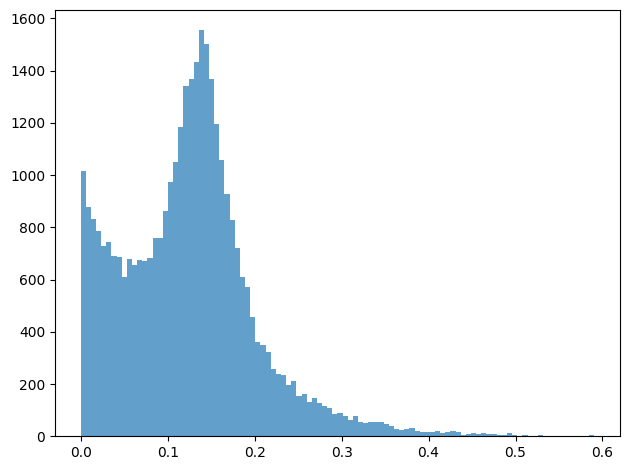

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.57], [1.32], [1.28], [1.26], [0.925], ... [1.36], [1.37], [1.62], [1.2], [1.48]] - Im: [[-0.0608], [-0.134], [-0.147], [-0.153], ... -0.118], [-0.0456], [-0.17], [-0.0877]]
 ---> Plotting ---> 


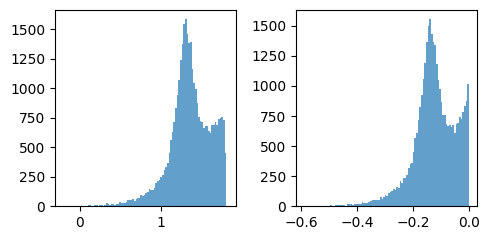

>>>>>> BWIGML out: [[1.2], [1.41], [1.45], [1.47], [1.89], ... [1.37], [1.36], [1.16], [1.53], [1.27]]	[[0.0464], [0.142], [0.166], [0.179], ... [0.117], [0.0326], [0.217], [0.0753]]
 ---> Plotting ---> 


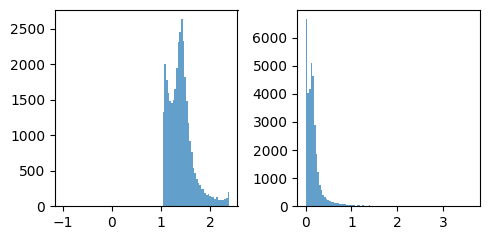

>>>>>> BWIGML : End 
>>>> FRO2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.808], [0.18], [0.0892], [0.636], ... [0.616], [0.851], [0.355], [0.734]]
>>>>>>>> QM: 0.723979355706531
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.145], [0.0042], [0.00058], [0.0876], ... [0.0817], [0.163], [0.0235], [0.119]]
>>>>>>>> GetWGS : End
>

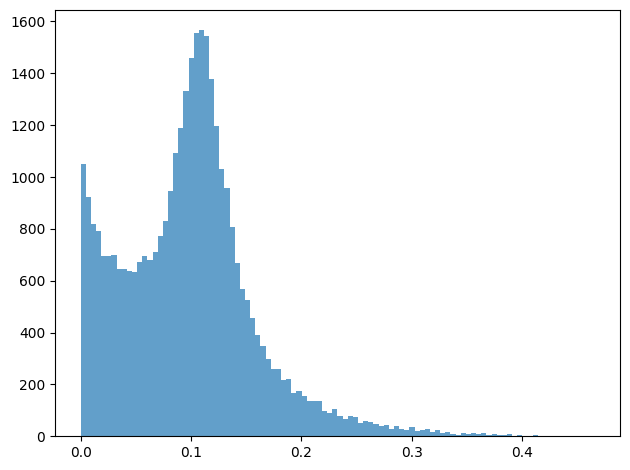

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[-0.128], [0.492], [0.516], [0.119], ... [0.144], [-0.201], [0.398], [-0.0145]] - Im: [[-0.145], [-0.0042], [-0.00058], [-0.0876, ... [-0.163], [-0.0235], [-0.119]]
 ---> Plotting ---> 


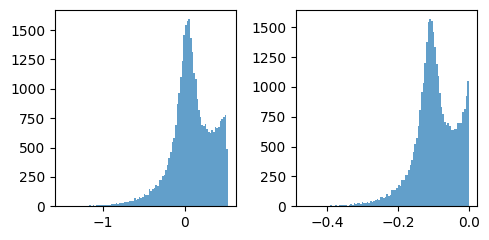

>>>>>> BWIGML out: [[-2.04], [1.22], [1.16], [3.27], [-2.05, ... [3.14], [-1.8], [1.5], [-0.606]]	[[2.32], [0.0104], [0.0013], [2.4], [2.4, ... [1.78], [1.46], [0.0885], [4.97]]
 ---> Plotting ---> 


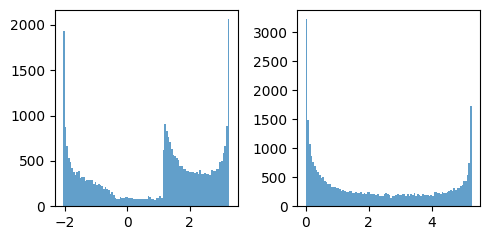

>>>>>> BWIGML : End 
>>>> FRP2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.808], [0.18], [0.0892], [0.636], ... [0.616], [0.851], [0.355], [0.734]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.185], [0.00535], [0.000737], [0.111], ... [0.104], [0.207], [0.0299], [0.151]]
>>>>>>>> GetWG

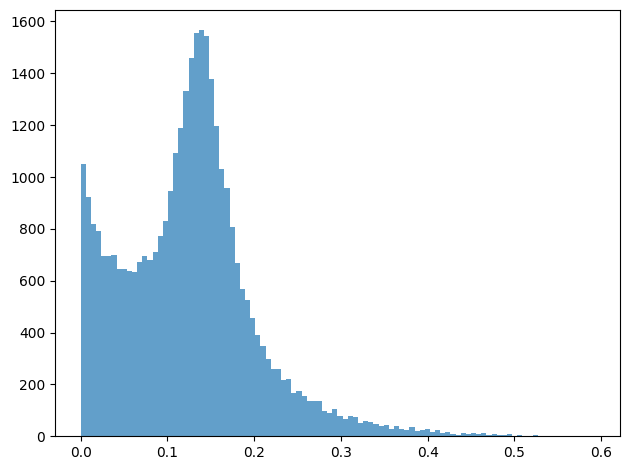

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.15], [1.77], [1.79], [1.4], [1.15], ... [1.23], [1.42], [1.08], [1.68], [1.26]] - Im: [[-0.185], [-0.00535], [-0.000737], [-0.111, ... [-0.207], [-0.0299], [-0.151]]
 ---> Plotting ---> 


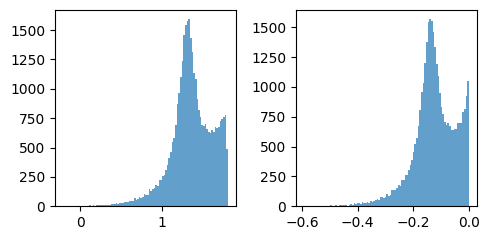

>>>>>> BWIGML out: [[1.59], [1.06], [1.05], [1.34], [1.59], ... [1.5], [1.31], [1.68], [1.12], [1.47]]	[[0.256], [0.00321], [0.00043], [0.107], ... [0.096], [0.323], [0.02], [0.175]]
 ---> Plotting ---> 


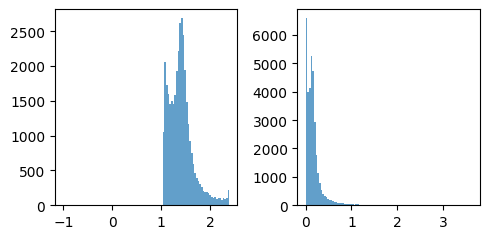

>>>>>> BWIGML : End 
>>>> FF23 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>> M: 1.275
>>>>>> G: 0.185
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.6256249999999999
>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.6256249999999999
>>>>>>>> L: 2
>>>>>>>> G: 0.185
>>>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> M: 1.275
>>>>>>>> QS: [[0.227], [0.918], [0.605], [0.0798], ... [0.923], [0.902], [1.01], [0.607]]
>>>>>>>> QM: 1.246094005205771
>>>>>>>> IPOW: 5
>>>>>>>> WGS: [[0.00017], [0.0681], [0.0123], [1.15e-06], ... 0.0699], [0.0634], [0.102], [0.0124]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], [Tru

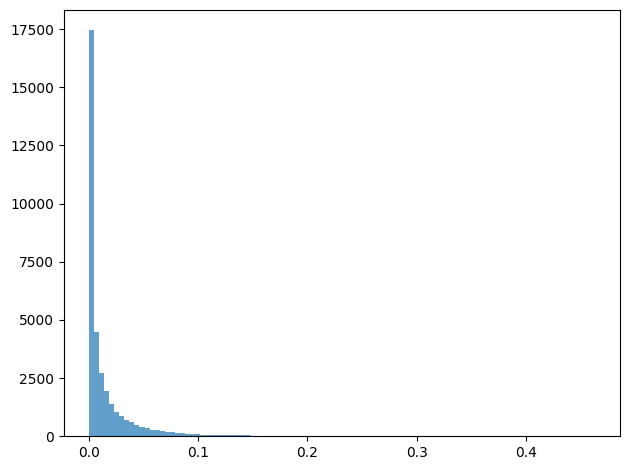

>>>>>> num - Re: 1.6256249999999999 - Im: 0
>>>>>> den - Re: [[1.5], [0.711], [1.19], [1.55], [1.08], ... [1.32], [0.7], [0.739], [0.526], [1.18]] - Im: [[-0.00017], [-0.0681], [-0.0123], [-1.15e-06, ... [-0.0634], [-0.102], [-0.0124]]
 ---> Plotting ---> 


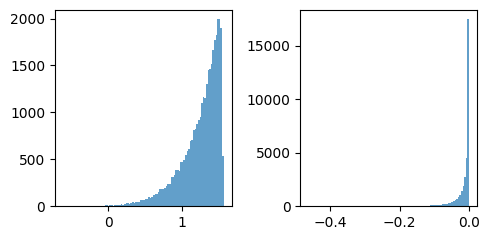

>>>>>> BWIGML out: [[1.08], [2.27], [1.37], [1.05], [1.5], ... [1.23], [2.3], [2.18], [2.98], [1.37]]	[[0.000122], [0.217], [0.0142], [7.81e-07], ... [0.23], [0.187], [0.577], [0.0144]]
 ---> Plotting ---> 


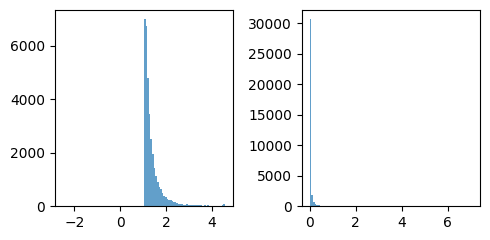

>>>>>> BWIGML : End 
>>>> FSG3 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>> M: 0.86
>>>>>> G: 0.88
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 0.7395999999999999
>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 0.7395999999999999
>>>>>>>> L: 0
>>>>>>>> G: 0.88
>>>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> M: 0.86
>>>>>>>> QS: [[0.227], [0.918], [0.605], [0.0798], ... [0.923], [0.902], [1.01], [0.607]]
>>>>>>>> QM: 0.8165324670885781
>>>>>>>> IPOW: 1
>>>>>>>> WGS: [[0.512], [0.765], [0.728], [0.226], ... [0.765], [0.764], [0.77], [0.728]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], [True], [True], [

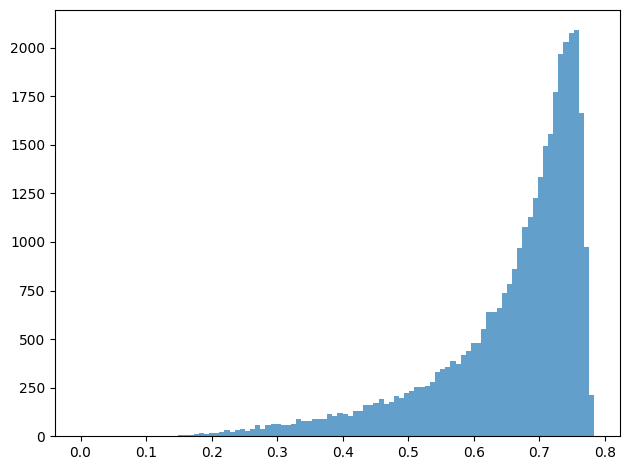

>>>>>> num - Re: 0.7395999999999999 - Im: 0
>>>>>> den - Re: [[0.615], [-0.175], [0.3], [0.66], ... [-0.186], [-0.147], [-0.36], [0.298]] - Im: [[-0.512], [-0.765], [-0.728], [-0.226], ... [-0.765], [-0.764], [-0.77], [-0.728]]
 ---> Plotting ---> 


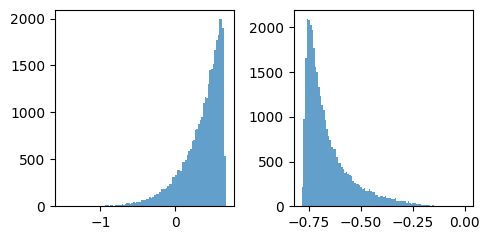

>>>>>> BWIGML out: [[0.71], [-0.211], [0.358], [1], ... [-0.222], [-0.179], [-0.368], [0.356]]	[[0.591], [0.919], [0.868], [0.343], ... [0.913], [0.934], [0.788], [0.87]]
 ---> Plotting ---> 


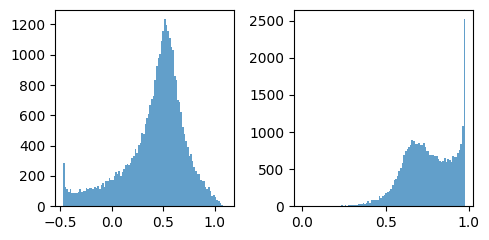

>>>>>> BWIGML : End 
>>>> FF03 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>> M: 1.186
>>>>>> G: 0.35
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.406596
>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.124], [0.915], [0.439], [0.0792], ... [0.926], [0.886], [1.1], [0.442]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.406596
>>>>>>>> L: 0
>>>>>>>> G: 0.35
>>>>>>>> W: [[0.352], [0.956], [0.663], [0.281], ... [0.962], [0.941], [1.05], [0.665]]
>>>>>>>> M: 1.186
>>>>>>>> QS: [[0.227], [0.918], [0.605], [0.0798], ... [0.923], [0.902], [1.01], [0.607]]
>>>>>>>> QM: 1.1548685075842011
>>>>>>>> IPOW: 1
>>>>>>>> WGS: [[0.274], [0.409], [0.389], [0.121], ... [0.409], [0.408], [0.412], [0.39]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], [True], [True], [True], [True], ...

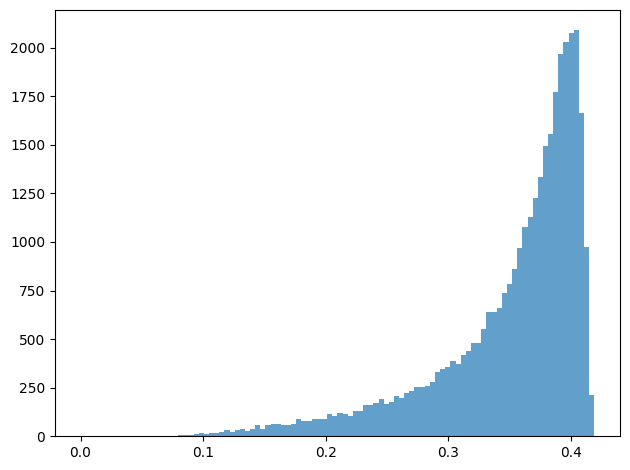

>>>>>> num - Re: 1.406596 - Im: 0
>>>>>> den - Re: [[1.28], [0.492], [0.967], [1.33], [0.863, ... [0.481], [0.52], [0.307], [0.965]] - Im: [[-0.274], [-0.409], [-0.389], [-0.121], ... [-0.409], [-0.408], [-0.412], [-0.39]]
 ---> Plotting ---> 


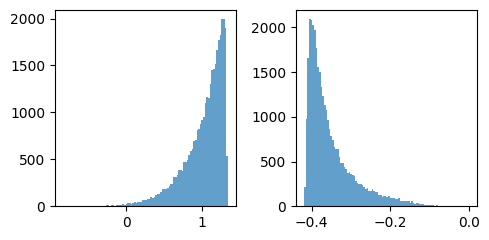

>>>>>> BWIGML out: [[1.05], [1.69], [1.25], [1.05], [1.35], ... [1.14], [1.7], [1.67], [1.64], [1.25]]	[[0.224], [1.41], [0.504], [0.0957], [0.619, ... [1.44], [1.31], [2.2], [0.506]]
 ---> Plotting ---> 


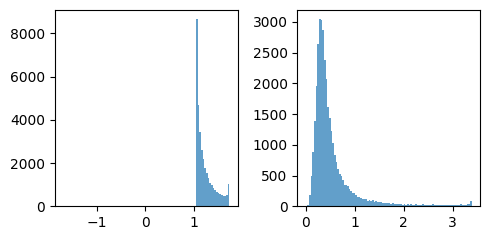

>>>>>> BWIGML : End 
>>>> F3PIFactor: [[2.07], [1.45], [-0.376], [-0.0309], [-1.95, ... [2.51], [1.32], [-2.17], [2.29]]	[[1.19], [4.36], [5.73], [5.84], [1.36], ... 4.24], [2.54], [-0.614], [2.43], [1.38]]


>>>> \\ F3PI ///
 ---> Plotting ---> 


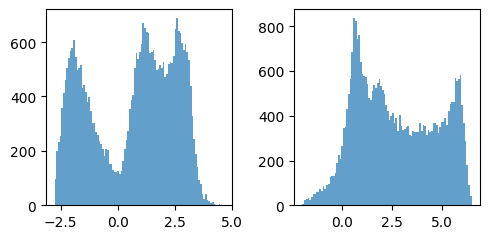

>>>>>> FA1A1P : Start
>>>>>>>> WGA1 : Start
>>>>>>>> S: [[1.1], [1.52], [1.07], [1.12], [2.16], ... [1.4], [1.83], [1.89], [1.92], [1.4]]
>>>>>>>>>> WGA1C : Start
>>>>>>>>>> G1_IM: [[4.47], [7.88], [4.1], [4.64], [13.3], ... [6.97], [10.3], [10.7], [11], [6.94]]
>>>>>>>>>> WGA1C : End 
>>>>>>>>>> WGA1N : Start
>>>>>>>>>> G1_IM: [[4.57], [7.89], [4.21], [4.74], [13.1], ... [7.01], [10.2], [10.6], [10.9], [6.99]]
>>>>>>>>>> WGA1N : End
>>>>>>>> S > MK1SQ: [[False], [False], [False], [False], ... [False], [False], [False], [False]]
>>>>>>>> GKST: [[0], [0], [0], [0], [0.157], [0], [0], [0, ... [0], [0], [0], [0], [0], [0], [0]]
>>>>>>>> out: [[0.514], [0.896], [0.473], [0.533], [1.7, ... [1.16], [1.22], [1.25], [0.792]]
>>>>>>>> WGA1 : End
>>>>>> FA1A1P: <TComplex.TComplex object at 0x310c70dd0>
>>>>>> FA1A1P : End
>>>> FORMA1: [[1.86], [0.298], [1.94], [1.82], ... [-0.337], [-0.388], [-0.411], [0.753]]	[[1.53], [2.13], [1.37], [1.61], [1], ... [2.21], [1.61], [1.5], [1.44], [2.2]]
>>>> \

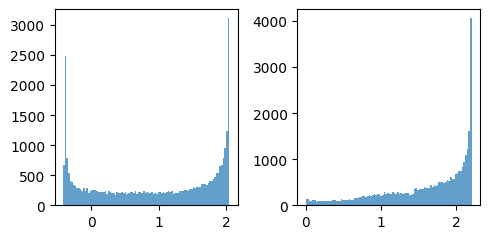

>>>> F3PIFactor x FORMA1: [[2.04], [-8.88], [-8.56], [-9.43], ... [-4.93], [0.412], [-2.61], [-1.31]]	[[5.39], [4.39], [10.6], [10.6], [-2.48], ... 9.51], [3.17], [2.22], [-4.13], [6.09]]
>>>> \\ F3PIFactor x FORMA1 ///
 ---> Plotting ---> 


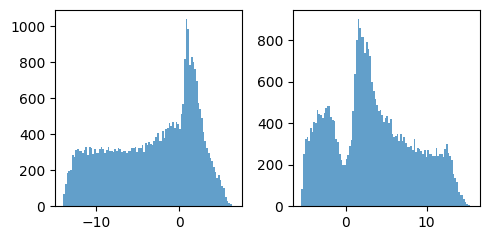

>>>> F3PI : End


>> F2: [[-1.92], [8.37], [8.07], [8.89], [0.587, ... [4.64], [-0.388], [2.46], [1.24]]	[[-5.08], [-4.13], [-10], [-9.95], [2.33, ... [-2.99], [-2.09], [3.89], [-5.74]]

 ---> Plotting ---> 


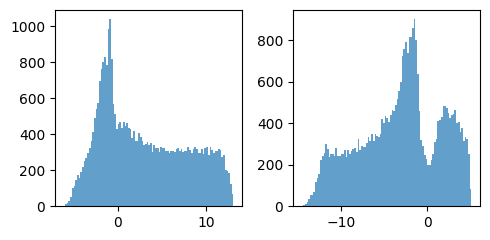

>> F3 ===>
>>>> F3PI --- : --- Start ---
>>>> BT1: 1.0	0.0
>>>> BT2: -0.11994078724388779	0.0037692910893753883
>>>> BT3: 0.3296724139496961	-0.16797648490363232
>>>> BT4: -0.0818742325871075	0.8661389092046796
>>>> BT5: -0.1330407333558646	0.6974239480173688
>>>> BT6: 1.5752332462239653	1.388754917179669
>>>> BT7: -0.09650658984451436	-0.7639283200121479
>>>> IDK: 1
>>>> IFORM: 3
>>>> S1: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>> S2: [[0.306], [0.552], [0.597], [0.617], ... [0.502], [0.254], [0.675], [0.398]]
>>>> S3: [[0.127], [0.917], [0.442], [0.0819], ... [0.928], [0.889], [1.1], [0.444]]
 ---> Plotting ---> 


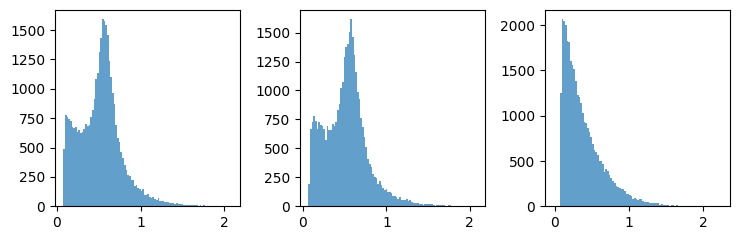

>>>> F34A: [[0.0603], [-0.121], [0.0521], [0.179], ... [-0.142], [-0.211], [-0.142], [-0.0149]]
>>>> F34B: [[-0.201], [0.269], [0.119], [-0.133], ... [0.157], [0.0292], [0.3], [-0.0571]]
>>>> F35: [[-0.211], [0.222], [0.257], [0.0681], ... [0.0233], [-0.273], [0.237], [-0.108]]
>>>> FRO1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> M: 0.7743


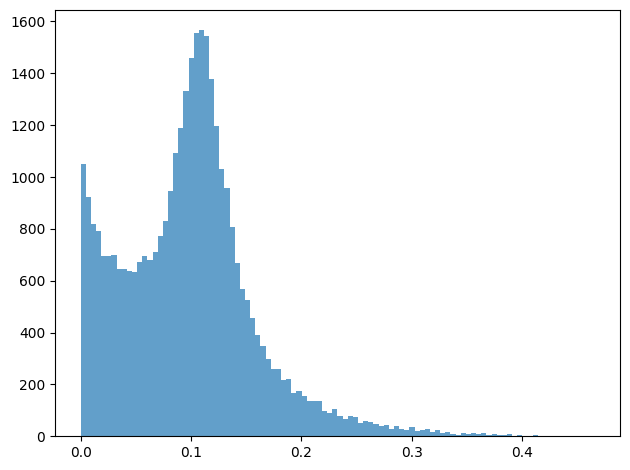

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[-0.128], [0.492], [0.516], [0.119], ... [0.144], [-0.201], [0.398], [-0.0145]] - Im: [[-0.145], [-0.0042], [-0.00058], [-0.0876, ... [-0.163], [-0.0235], [-0.119]]
 ---> Plotting ---> 


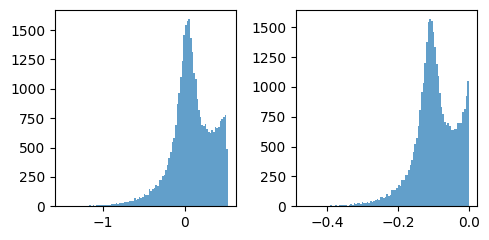

>>>>>> BWIGML out: [[-2.04], [1.22], [1.16], [3.27], [-2.05, ... [3.14], [-1.8], [1.5], [-0.606]]	[[2.32], [0.0104], [0.0013], [2.4], [2.4, ... [1.78], [1.46], [0.0885], [4.97]]
 ---> Plotting ---> 


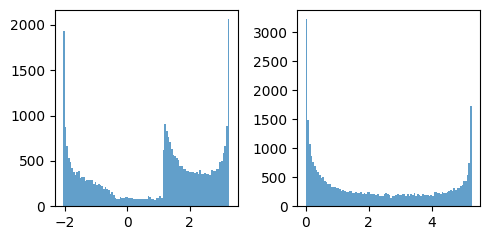

>>>>>> BWIGML : End 
>>>> FRP1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.728], [0.108], [0.0833], [0.481], ... [0.455], [0.8], [0.201], [0.614]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.853], [0.328], [0.289], [0.693], ... [0.675], [0.895], [0.449], [0.784]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.808], [0.18], [0.0892], [0.636], ... [0.616], [0.851], [0.355], [0.734]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.185], [0.00535], [0.000737], [0.111], ... [0.104], [0.207], [0.0299], [0.151]]
>>>>>>>> GetWG

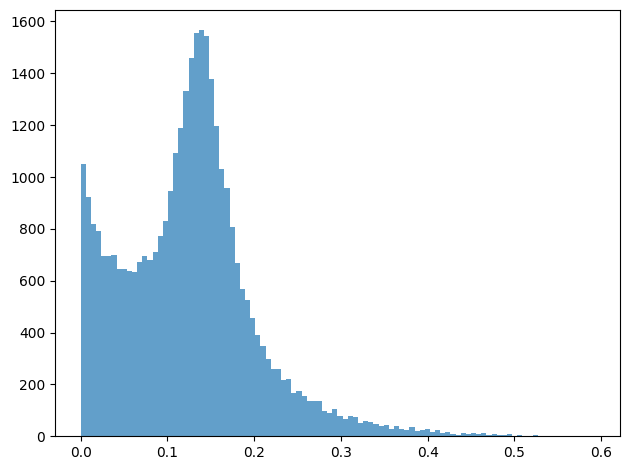

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.15], [1.77], [1.79], [1.4], [1.15], ... [1.23], [1.42], [1.08], [1.68], [1.26]] - Im: [[-0.185], [-0.00535], [-0.000737], [-0.111, ... [-0.207], [-0.0299], [-0.151]]
 ---> Plotting ---> 


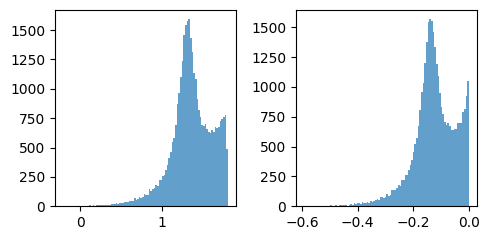

>>>>>> BWIGML out: [[1.59], [1.06], [1.05], [1.34], [1.59], ... [1.5], [1.31], [1.68], [1.12], [1.47]]	[[0.256], [0.00321], [0.00043], [0.107], ... [0.096], [0.323], [0.02], [0.175]]
 ---> Plotting ---> 


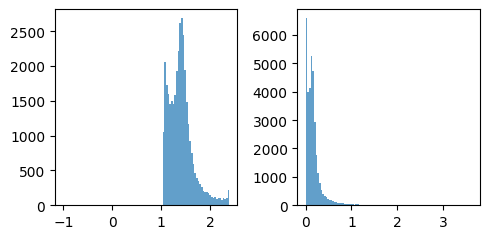

>>>>>> BWIGML : End 
>>>> FRO2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.306], [0.552], [0.597], [0.617], ... [0.502], [0.254], [0.675], [0.398]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.553], [0.743], [0.773], [0.785], ... [0.708], [0.504], [0.822], [0.631]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.306], [0.552], [0.597], [0.617], ... [0.502], [0.254], [0.675], [0.398]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.553], [0.743], [0.773], [0.785], ... [0.708], [0.504], [0.822], [0.631]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.481], [0.691], [0.722], [0.736], ... [0.653], [0.422], [0.774], [0.568]]
>>>>>>>> QM: 0.723979355706531
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.0472], [0.104], [0.115], [0.119], ... [0.0926], [0.0352], [0.133], [0.0684]]
>>>>>>>> GetWGS : End
>

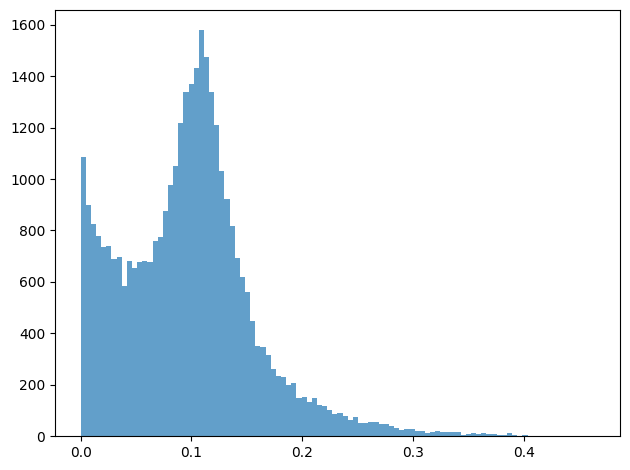

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[0.293], [0.0471], [0.00277], [-0.0171], ... [0.0978], [0.346], [-0.0754], [0.201]] - Im: [[-0.0472], [-0.104], [-0.115], [-0.119, ... [-0.0352], [-0.133], [-0.0684]]
 ---> Plotting ---> 


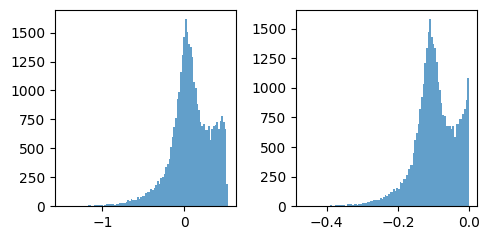

>>>>>> BWIGML out: [[1.99], [2.15], [0.126], [-0.706], [-1.3, ... [3.23], [1.72], [-1.93], [2.67]]	[[0.321], [4.77], [5.22], [4.92], [0.735, ... [3.06], [0.175], [3.41], [0.906]]
 ---> Plotting ---> 


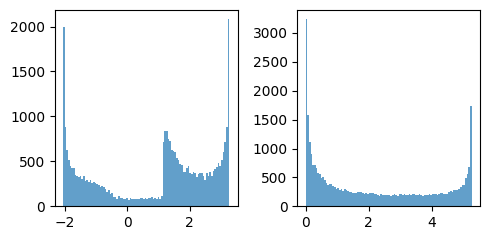

>>>>>> BWIGML : End 
>>>> FRP2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.306], [0.552], [0.597], [0.617], ... [0.502], [0.254], [0.675], [0.398]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.553], [0.743], [0.773], [0.785], ... [0.708], [0.504], [0.822], [0.631]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.306], [0.552], [0.597], [0.617], ... [0.502], [0.254], [0.675], [0.398]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.553], [0.743], [0.773], [0.785], ... [0.708], [0.504], [0.822], [0.631]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.481], [0.691], [0.722], [0.736], ... [0.653], [0.422], [0.774], [0.568]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.0601], [0.133], [0.146], [0.152], ... [0.118], [0.0448], [0.169], [0.087]]
>>>>>>>> GetWGS 

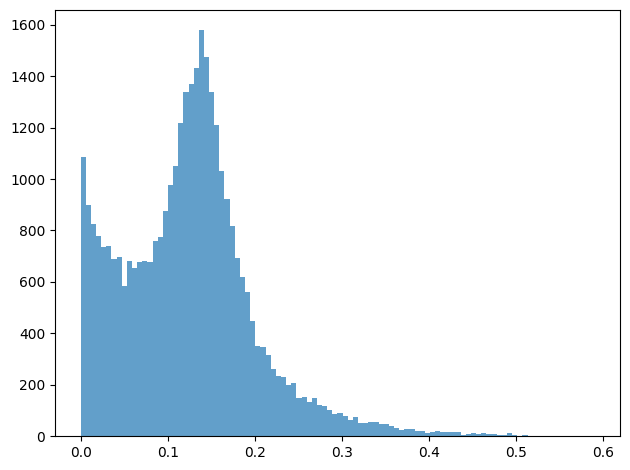

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.57], [1.32], [1.28], [1.26], [0.928], ... [1.37], [1.38], [1.62], [1.2], [1.48]] - Im: [[-0.0601], [-0.133], [-0.146], [-0.152], ... -0.118], [-0.0448], [-0.169], [-0.087]]
 ---> Plotting ---> 


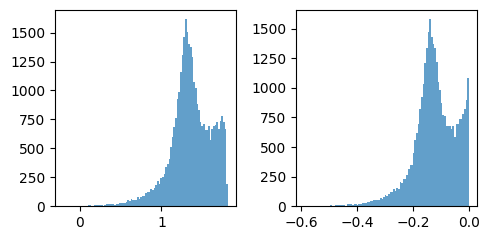

>>>>>> BWIGML out: [[1.19], [1.4], [1.45], [1.47], [1.88], ... [1.36], [1.35], [1.16], [1.53], [1.26]]	[[0.0457], [0.141], [0.165], [0.177], ... [0.116], [0.0319], [0.216], [0.0744]]
 ---> Plotting ---> 


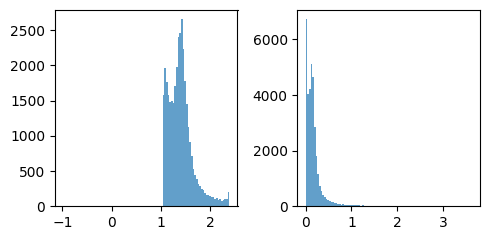

>>>>>> BWIGML : End 
>>>> FF23 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.127], [0.917], [0.442], [0.0819], ... [0.928], [0.889], [1.1], [0.444]]
>>>>>> M: 1.275
>>>>>> G: 0.185
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.6256249999999999
>>>>>> W: [[0.356], [0.958], [0.665], [0.286], ... [0.963], [0.943], [1.05], [0.666]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.127], [0.917], [0.442], [0.0819], ... [0.928], [0.889], [1.1], [0.444]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.6256249999999999
>>>>>>>> L: 2
>>>>>>>> G: 0.185
>>>>>>>> W: [[0.356], [0.958], [0.665], [0.286], ... [0.963], [0.943], [1.05], [0.666]]
>>>>>>>> M: 1.275
>>>>>>>> QS: [[0.232], [0.919], [0.607], [0.095], ... [0.925], [0.903], [1.01], [0.609]]
>>>>>>>> QM: 1.246094005205771
>>>>>>>> IPOW: 5
>>>>>>>> WGS: [[0.000189], [0.0685], [0.0124], [2.71e-06, ... 0.0703], [0.0639], [0.102], [0.0126]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], [True

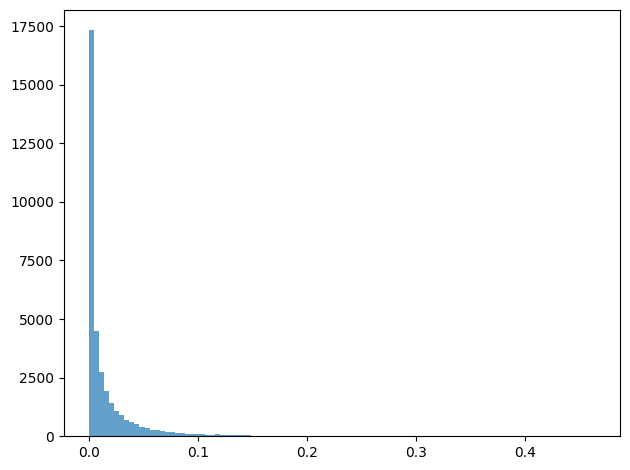

>>>>>> num - Re: 1.6256249999999999 - Im: 0
>>>>>> den - Re: [[1.5], [0.709], [1.18], [1.54], [1.08, ... 1.32], [0.698], [0.737], [0.524], [1.18]] - Im: [[-0.000189], [-0.0685], [-0.0124], ... [-0.0639], [-0.102], [-0.0126]]
 ---> Plotting ---> 


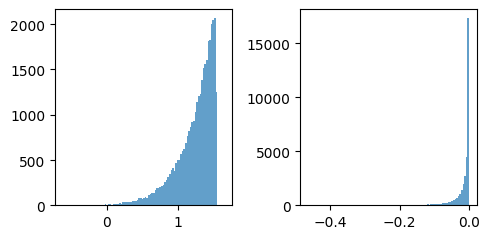

>>>>>> BWIGML out: [[1.08], [2.27], [1.37], [1.05], [1.51], ... [1.23], [2.31], [2.19], [2.99], [1.38]]	[[0.000137], [0.22], [0.0144], [1.85e-06], ... [0.232], [0.19], [0.585], [0.0147]]
 ---> Plotting ---> 


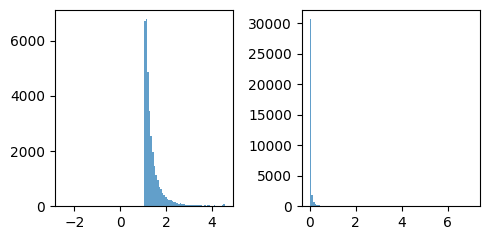

>>>>>> BWIGML : End 
>>>> F3PIFactor: [[-0.123], [0.204], [0.0442], [0.176], ... [0.042], [0.292], [-0.36], [-0.0339]]	[[-0.171], [0.909], [0.632], [-0.101], ... [0.125], [-0.856], [1.2], [-0.202]]


>>>> \\ F3PI ///
 ---> Plotting ---> 


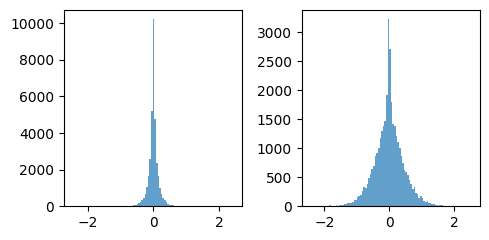

>>>>>> FA1A1P : Start
>>>>>>>> WGA1 : Start
>>>>>>>> S: [[1.1], [1.52], [1.07], [1.12], [2.16], ... [1.4], [1.83], [1.89], [1.92], [1.4]]
>>>>>>>>>> WGA1C : Start
>>>>>>>>>> G1_IM: [[4.47], [7.88], [4.1], [4.64], [13.3], ... [6.97], [10.3], [10.7], [11], [6.94]]
>>>>>>>>>> WGA1C : End 
>>>>>>>>>> WGA1N : Start
>>>>>>>>>> G1_IM: [[4.57], [7.89], [4.21], [4.74], [13.1], ... [7.01], [10.2], [10.6], [10.9], [6.99]]
>>>>>>>>>> WGA1N : End
>>>>>>>> S > MK1SQ: [[False], [False], [False], [False], ... [False], [False], [False], [False]]
>>>>>>>> GKST: [[0], [0], [0], [0], [0.157], [0], [0], [0, ... [0], [0], [0], [0], [0], [0], [0]]
>>>>>>>> out: [[0.514], [0.896], [0.473], [0.533], [1.7, ... [1.16], [1.22], [1.25], [0.792]]
>>>>>>>> WGA1 : End
>>>>>> FA1A1P: <TComplex.TComplex object at 0x3113e6a50>
>>>>>> FA1A1P : End
>>>> FORMA1: [[1.86], [0.298], [1.94], [1.82], ... [-0.337], [-0.388], [-0.411], [0.753]]	[[1.53], [2.13], [1.37], [1.61], [1], ... [2.21], [1.61], [1.5], [1.44], [2.2]]
>>>> \

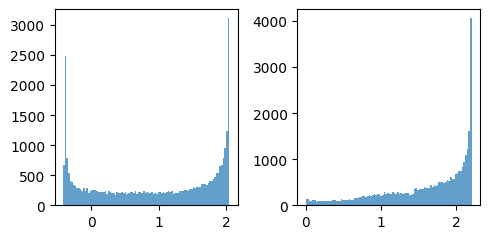

>>>> F3PIFactor x FORMA1: [[0.0332], [-1.88], [-0.779], [0.482], ... [-0.214], [1.17], [-1.58], [0.419]]	[[-0.508], [0.706], [1.29], [0.1], ... [0.0254], [0.771], [-1.01], [-0.227]]
>>>> \\ F3PIFactor x FORMA1 ///
 ---> Plotting ---> 


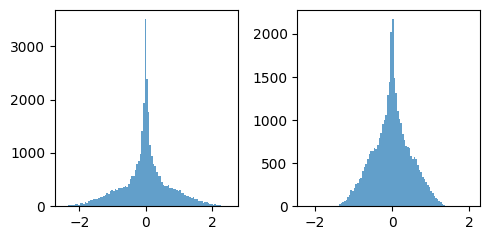

>>>> F3PI : End


>> F3: [[0.0313], [-1.77], [-0.734], [0.454], ... [-0.202], [1.11], [-1.49], [0.395]]	[[-0.478], [0.665], [1.21], [0.0947], ... [0.024], [0.727], [-0.954], [-0.214]]

 ---> Plotting ---> 


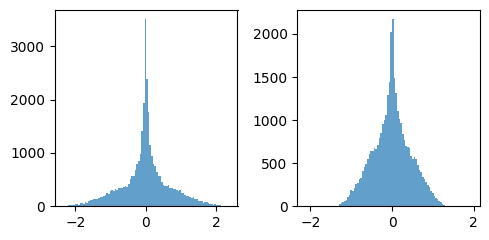

>>>> CLVEC --- : --- Start ---
>>>> HN: [[1.18e+03], [-286], [1.91e+04], [1.02e+03, ... [-1.45e+03], [271], [4.64e+03]]	[[-189], [-189], [-2.45e+04], [-1.06e+03, ... -2.07e+03], [-3.28e+03], [329], [-191]]
 ---> Plotting ---> 


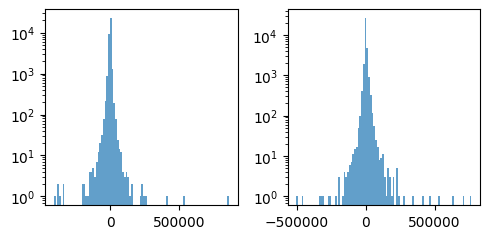

>>>> HCN: [[1.18e+03], [-286], [1.91e+04], [1.02e+03, ... [-1.45e+03], [271], [4.64e+03]]	[[189], [189], [2.45e+04], [1.06e+03], ... [2.07e+03], [3.28e+03], [-329], [191]]
 ---> Plotting ---> 


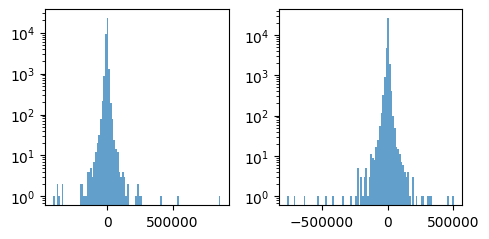

>>>> HH: [[1.33e+06], [1.17e+05], [1.14e+09], ... [1.42e+07], [1.08e+06], [3.37e+07]]
 ---> Plotting ---> 


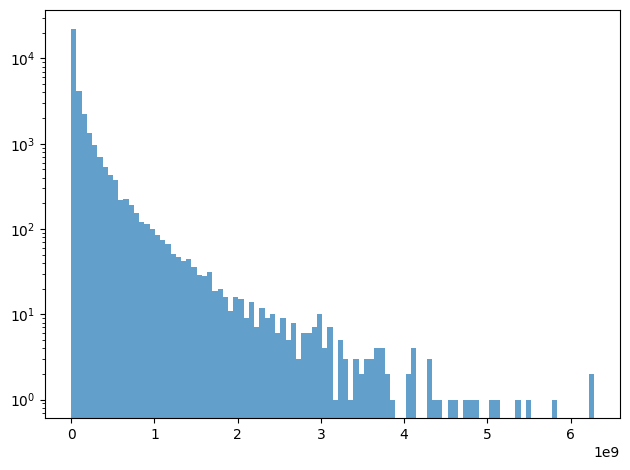

>>>> PIVEC0: [[3.91e+06], [1.67e+07], [2.32e+11], ... [2.24e+09], [1.54e+07], [1.52e+09]]
>>>> PIVEC1: [[-3.8e+06], [-9.5e+06], [-1.97e+11], ... [-4.37e+08], [1.46e+07], [7.13e+08]]
>>>> PIVEC2: [[-8.71e+05], [-1.18e+07], [-1.22e+11], ... [-2.16e+09], [3.19e+06], [1.07e+09]]
>>>> PIVEC3: [[-2.15e+05], [7.12e+06], [-1.55e+10], ... [4.4e+08], [-3.54e+06], [-8.03e+08]]
>>>> out: [[{x: -3.8e+06, y: -8.71e+05, z: -2.15e+05, ... z: -8.03e+08, t: 1.52e+09}]]
>>>> CLVEC : End
>>>> CLAXI : Start
>>>> d12: [[1.77e+05], [-7.9e+04], [-1.82e+05], ... [-3.5e+04], [-1.16e+03], [1.1e+06]] 
>>>> d13: [[7.34e+04], [1.4e+05], [-5.45e+04], ... [2.21e+04], [-963], [-2.53e+05]] 
>>>> d14:[[-8.24e+04], [1.17e+05], [1.06e+05], ... [3.79e+04], [-62.5], [9.3e+05]] 
>>>> d23: [[-1.54e+04], [1.17e+05], [-2.01e+04], ... [7.41e+04], [-576], [8.21e+05]] 
>>>> d24: [[1.63e+05], [7.24e+03], [-1.49e+05], ... [6.82e+03], [1.22e+03], [-9.18e+05]] 
>>>> d34: [[6.04e+04], [1.61e+05], [-5.63e+04], ... [7.57e+04], [1.05e+03]

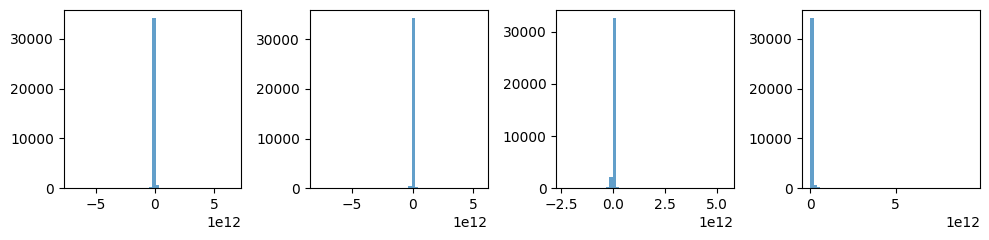

>> CLA ===>
    px: [[5.88e+04], [-1.03e+05], [8.35e+04], ... [1.75e+03], [1.09e+03], [3e+05]]
    py: [[2.96e+04], [-1.4e+05], [5.93e+04], ... [-5.26e+03], [287], [4.81e+05]]
    pz: [[367], [8.11e+04], [449], [-3.4e+05], ... [-1.35e+05], [-401], [-270], [-3.35e+05]]
    E: [[-6.38e+04], [1.92e+05], [-1.02e+05], ... [4.63e+03], [1.15e+03], [6.59e+05]]
 ---> Plotting ---> 


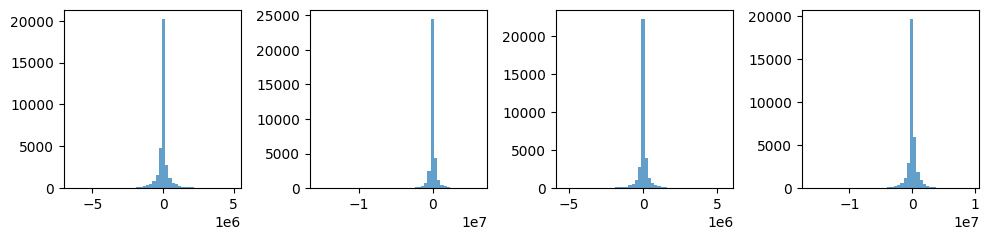

>> P.CLV: [[2.35e+08], [1.01e+09], [1.42e+13], ... [1.4e+11], [9.59e+08], [9.49e+10]]
>> P.CLA: [[-3.98e+06], [1.16e+07], [-6.25e+06], ... [2.9e+05], [7.21e+04], [4.12e+07]]
>> omega: [[2.39e+08], [1e+09], [1.42e+13], ... [1.4e+11], [9.59e+08], [9.49e+10]]
 ---> Plotting ---> 


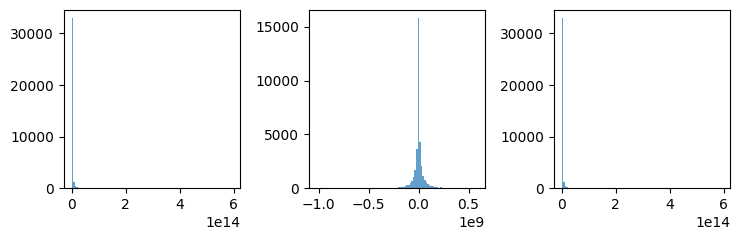

>> P.mass: [[1.78], [1.78], [1.78], [1.78], [1.78], ... [1.78], [1.78], [1.78], [1.78], [1.78]]
>> P.mass**2: [[3.16], [3.16], [3.16], [3.16], [3.16], ... [3.16], [3.16], [3.15], [3.16], [3.15]]
>> CLA - CLV : [[{x: 3.86e+06, y: 9.01e+05, z: 2.15e+05, ... z: 8.02e+08, t: -1.52e+09}]]
>> P*(P.dot(CLA) - P.dot(CLV)): [[{x: 1.33e+10, y: 5.81e+09, z: 3.62e+09, ... z: 2.97e+12, t: -5.93e+12}]]	[[{x: 1.33e+10, y: 5.81e+09, z: 3.62e+09, ... z: 2.97e+12, t: -5.93e+12}]]
>> 1/omega/P.mass: [[2.35e-09], [5.61e-10], [3.96e-14], ... [4.02e-12], [5.87e-10], [5.94e-12]]
>> PVC out : [[{x: -31.2, y: -13.6, z: -8.5, t: 35.1}], ... y: 26.1, z: -17.6, t: 35.2}]]
 ---> Plotting ---> 


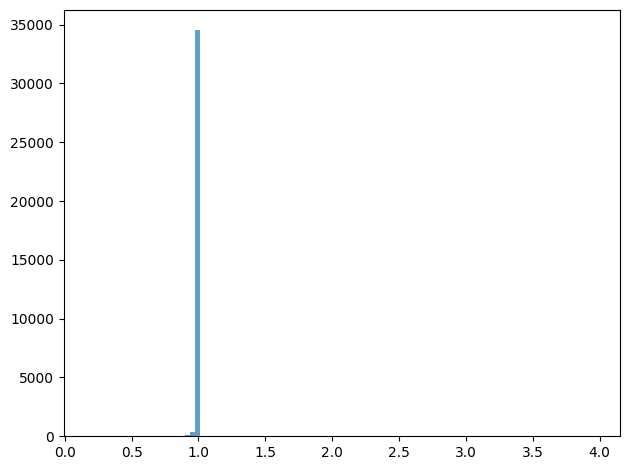

>> PVC : End 
  hvec : [[{x: 31.2, y: 13.6, z: 8.5}], [{x: 18.8, ... [{x: -15.7, y: -26.1, z: 17.6}]]
    x: [[31.2], [18.8], [29.2], [-31.6], [-31.9], ... -15.1], [9.46], [7], [-32.7], [-15.7]]
    y: [[13.6], [24.4], [18.1], [11.4], [6.01], ... [21.6], [15.1], [33.9], [-8.8], [-26.1]]
    z: [[8.5], [-14.7], [2.04], [10.6], [-13.5], ... 23.3], [30.3], [-6.57], [9.25], [17.6]]
 --- gethvec_a1 --- 
  ===> tau in lab frame ===>
    px: [[64.8], [19.9], [61.3], [-66.3], [-82.7, ... [19.7], [10.3], [-50.3], [-43.2]]
    py: [[41.2], [45.6], [41.9], [19.2], [-21.9, ... 36.7], [26.1], [55.3], [-30.1], [-90.7]]
    pz: [[19.3], [27.2], [62.8], [-48.3], [-68.8], ... [76.8], [17.6], [128], [223], [-81.9]]
    E: [[79.2], [56.8], [97.2], [84.2], [110], ... [92.5], [37.2], [140], [231], [130]]
 ---> Plotting ---> 


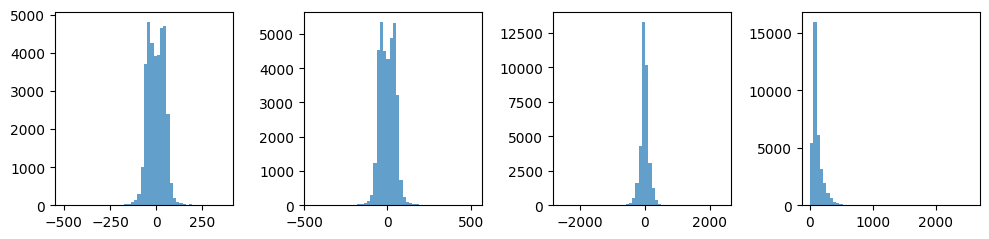

    pt: [[76.8], [49.8], [74.2], [69], [85.5], ... [51.6], [32.8], [56.2], [58.6], [100]]
    eta: [[0.25], [0.523], [0.768], [-0.652], ... [0.514], [1.56], [2.05], [-0.744]]
    phi: [[0.566], [1.16], [0.6], [2.86], [-2.88, ... 2.35], [0.924], [1.39], [-2.6], [-2.02]]
    M: [[1.78], [1.78], [1.78], [1.78], [1.78], ... [1.78], [1.78], [1.78], [1.78], [1.78]]
 ---> Plotting ---> 


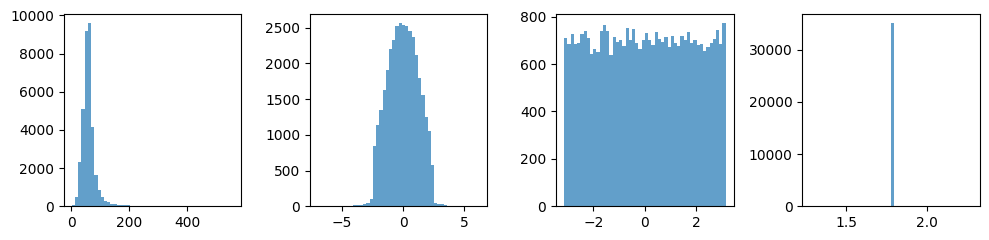

  ===> os pion in lab frame ===>
    px: [[35.4], [1.54], [15.3], [-13.9], [-37.1, ... [2.72], [4.07], [-6.29], [-4.83]]
    py: [[22.5], [4], [10.5], [4.51], [-9.82], ... [14.2], [3.8], [19.7], [-4.11], [-10.8]]
    pz: [[11], [2.1], [15.9], [-10.2], [-31.6], ... [28], [2.67], [45.3], [28.8], [-9.48]]
    E: [[43.4], [4.77], [24.5], [17.8], [49.7], ... [34.2], [5.38], [49.6], [29.8], [15.1]]
 ---> Plotting ---> 


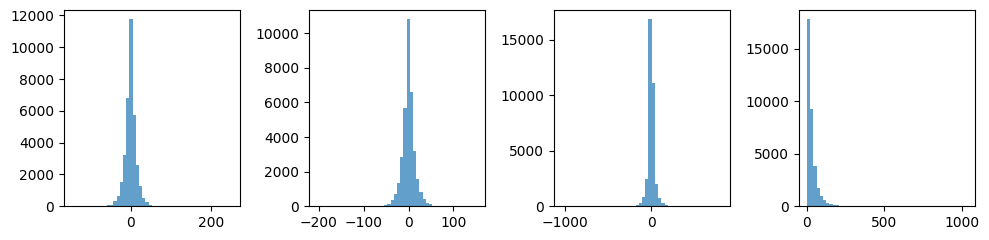

    pt: [[42], [4.28], [18.6], [14.6], [38.4], ... [19.6], [4.67], [20.1], [7.52], [11.8]]
    eta: [[0.26], [0.474], [0.777], [-0.65], [-0.75, ... [0.545], [1.55], [2.05], [-0.734]]
    phi: [[0.566], [1.2], [0.604], [2.83], [-2.88, ... [0.949], [1.37], [-2.56], [-1.99]]
    M: [[0.14], [0.14], [0.14], [0.14], [0.14], ... [0.14], [0.14], [0.14], [0.14], [0.14]]
 ---> Plotting ---> 


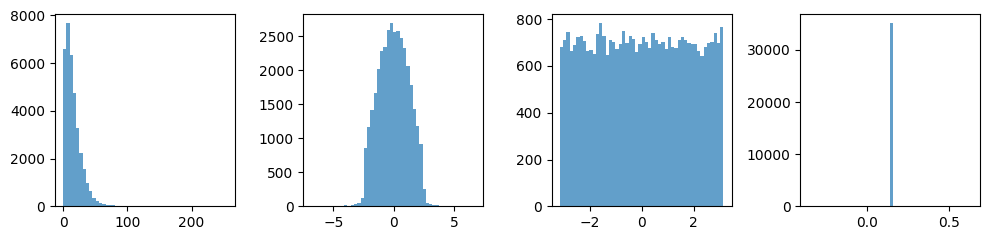

  ===> ss pion1 in lab frame ===>
    px: [[5.46], [4.08], [1.66], [-9.85], [-21.8, ... [1.24], [1.57], [-7.26], [-17.5]]
    py: [[3.44], [8.54], [1], [2.61], [-5.76], ... [7.35], [1.52], [9.02], [-4.66], [-36.1]]
    pz: [[1.62], [5.61], [1.71], [-7.35], [-17.8, ... 15.5], [1.34], [20.9], [32.3], [-32.9]]
    E: [[6.66], [11], [2.59], [12.6], [28.7], ... [18.6], [2.38], [22.8], [33.4], [51.9]]
 ---> Plotting ---> 


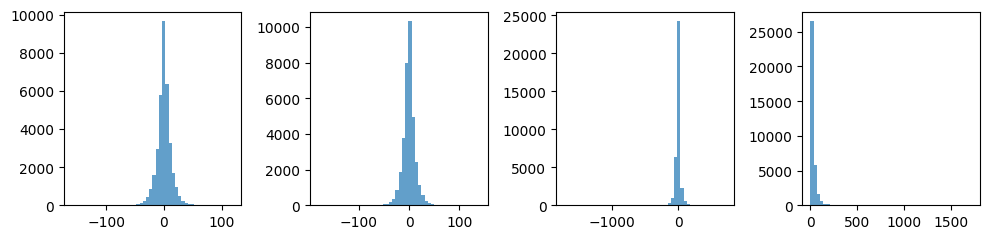

    pt: [[6.45], [9.47], [1.94], [10.2], [22.5], ... [10.2], [1.96], [9.16], [8.62], [40.1]]
    eta: [[0.249], [0.562], [0.793], [-0.67], ... [0.637], [1.56], [2.03], [-0.748]]
    phi: [[0.562], [1.12], [0.541], [2.88], [-2.88, ... [0.887], [1.4], [-2.57], [-2.02]]
    M: [[0.14], [0.14], [0.14], [0.14], [0.14], ... [0.14], [0.14], [0.14], [0.14], [0.14]]
 ---> Plotting ---> 


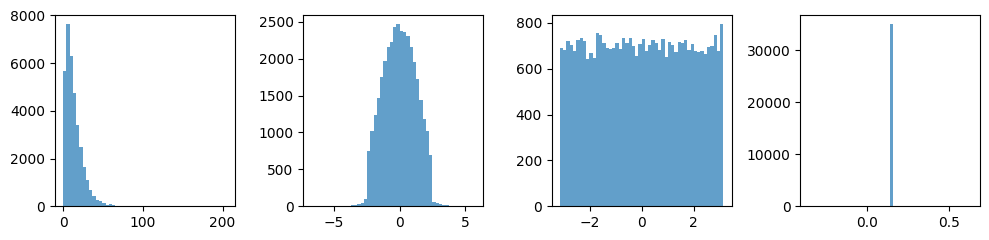

  ===> ss pion2 in lab frame ===>
    px: [[5.96], [7.14], [14.5], [-18.4], [-21.6, ... [7.1], [4.52], [-13.5], [-9.11]]
    py: [[4.18], [16], [9.4], [5.49], [-5.91], ... [1.49], [8.92], [23.8], [-7.81], [-18.4]]
    pz: [[1.91], [9.78], [14.2], [-13.8], [-17.8, ... 3.14], [5.48], [54.9], [57.9], [-16.4]]
    E: [[7.53], [20.1], [22.4], [23.7], [28.6], ... [3.78], [12.7], [60], [60], [26.3]]
 ---> Plotting ---> 


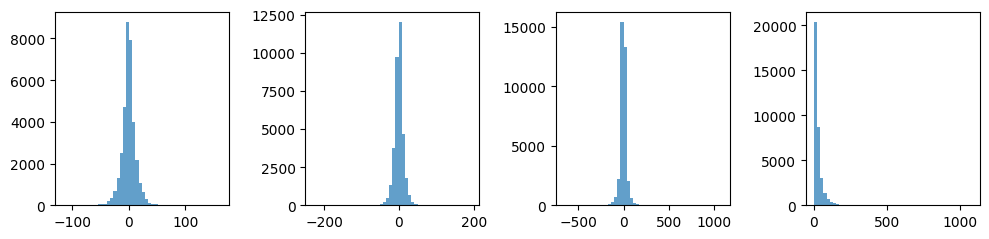

    pt: [[7.28], [17.6], [17.2], [19.2], [22.4], ... [2.09], [11.4], [24.2], [15.6], [20.5]]
    eta: [[0.26], [0.531], [0.752], [-0.67], ... [0.464], [1.56], [2.02], [-0.734]]
    phi: [[0.611], [1.15], [0.576], [2.85], [-2.88, ... [0.898], [1.38], [-2.62], [-2.03]]
    M: [[0.14], [0.14], [0.14], [0.14], [0.14], ... [0.14], [0.14], [0.14], [0.14], [0.14]]
 ---> Plotting ---> 


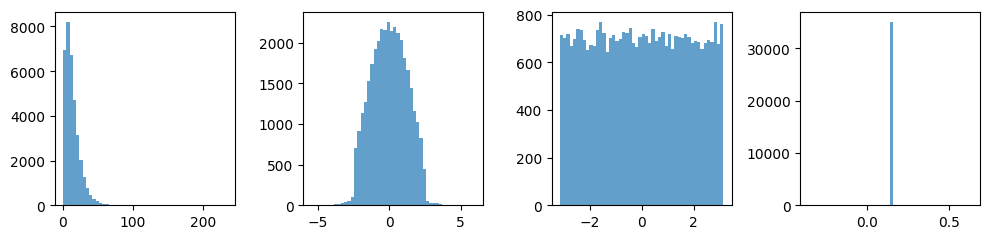

  ===> a1 in lab frame ===>
    px: [[46.9], [12.8], [31.4], [-42.1], [-80.5, ... -22.1], [11.1], [10.2], [-27], [-31.5]]
    py: [[30.2], [28.6], [20.9], [12.6], [-21.5], ... [23], [14.2], [52.5], [-16.6], [-65.2]]
    pz: [[14.6], [17.5], [31.9], [-31.4], [-67.2], ... [46.6], [9.49], [121], [119], [-58.8]]
    E: [[57.6], [35.9], [49.4], [54], [107], ... [56.5], [20.4], [132], [123], [93.3]]
 ---> Plotting ---> 


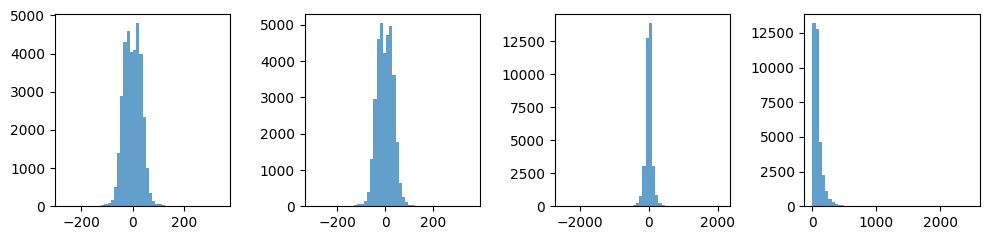

    pt: [[55.7], [31.3], [37.7], [44], [83.3], ... [31.9], [18], [53.5], [31.7], [72.4]]
    eta: [[0.259], [0.533], [0.767], [-0.664], ... [0.505], [1.56], [2.03], [-0.742]]
    phi: [[0.572], [1.15], [0.588], [2.85], [-2.88, ... [0.91], [1.38], [-2.59], [-2.02]]
    M: [[1.06], [1.24], [1.07], [1.07], [1.1], ... [1.04], [1.24], [0.787], [1], [1.16]]
 ---> Plotting ---> 


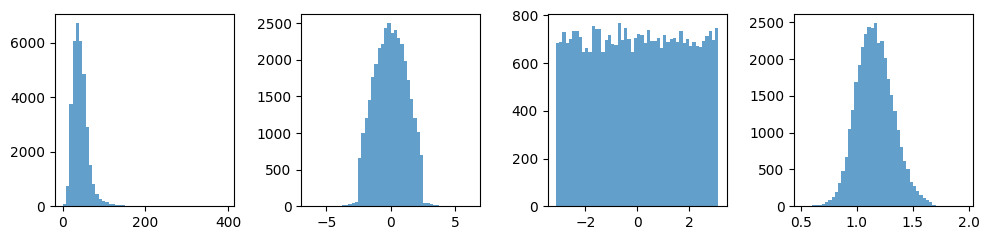

  ===> Boostvec: Higgs Rest Frame ===>
    x: [[0.129], [-0.189], [0.103], [-0.114], ... [0.0516], [-0.0143], [0.036], [-0.113]]
    y: [[0.235], [0.032], [0.107], [-0.011], ... [-0.0118], [-0.0324], [-0.0659], [-0.328]]
    z: [[0.0587], [0.745], [0.651], [-0.753], ... [-0.643], [0.935], [0.94], [-0.838]]
 ---> Plotting ---> 


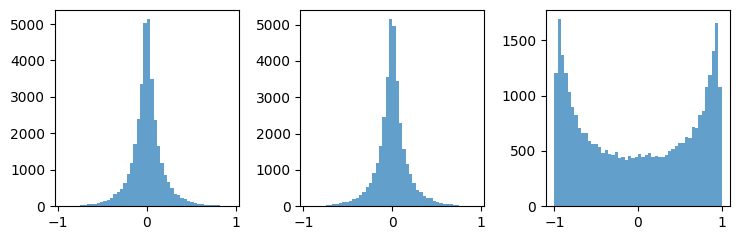

  -ve boost applied on tau and its decay products
  ===> tau in Higgs rest frame ===>
    px: [[55.5], [33.4], [52], [-56.1], [-56.7], ... [-26.8], [16.8], [12.4], [-58.2], [-28]]
    py: [[24.3], [43.3], [32.2], [20.2], [10.7], ... 38.4], [26.8], [60.1], [-15.7], [-46.3]]
    pz: [[15.1], [-26.1], [3.62], [18.8], [-24], ... [41.4], [53.9], [-11.7], [16.4], [31.4]]
    E: [[62.4], [60.6], [61.3], [62.6], [62.5], ... [62.5], [62.6], [62.5], [62.5], [62.6]]
 ---> Plotting ---> 


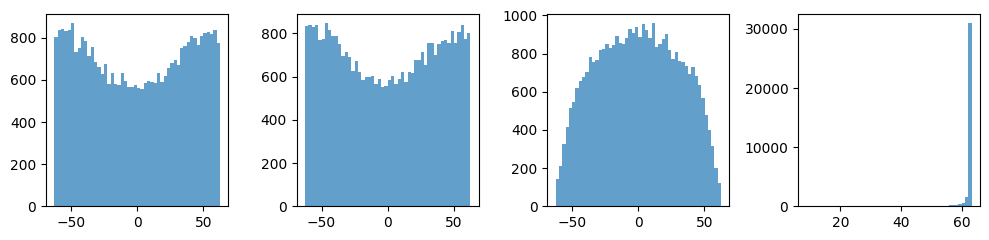

    pt: [[60.6], [54.7], [61.1], [59.6], [57.7], ... [46.9], [31.6], [61.4], [60.3], [54.1]]
    eta: [[0.247], [-0.46], [0.0592], [0.31], ... [1.3], [-0.189], [0.27], [0.551]]
    phi: [[0.412], [0.915], [0.555], [2.8], [2.96, ... [1.01], [1.37], [-2.88], [-2.11]]
    M: [[1.78], [1.78], [1.78], [1.78], [1.78], ... [1.78], [1.78], [1.78], [1.78], [1.78]]
 ---> Plotting ---> 


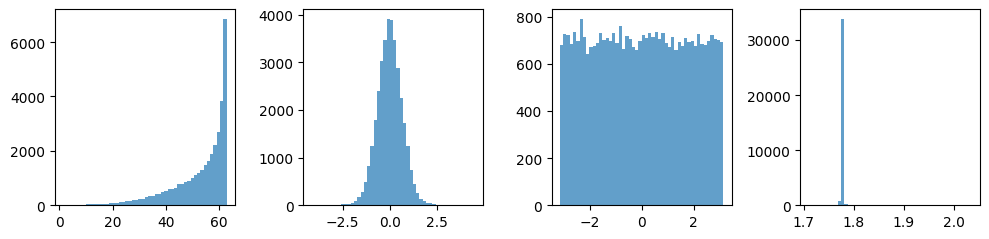

  ===> os pion in Higgs rest frame ===>
    px: [[30.3], [2.69], [12.9], [-11.8], [-25.4, ... [2.29], [4.83], [-7.31], [-3.04]]
    py: [[13.3], [3.8], [8.1], [4.72], [4.9], ... [14.8], [3.9], [21.4], [-2.25], [-5.57]]
    pz: [[8.71], [-2.46], [1.09], [4.03], [-11.3, ... 14.8], [7.98], [-4.41], [2.22], [3.81]]
    E: [[34.2], [5.27], [15.3], [13.3], [28.2], ... [23.3], [9.17], [22.4], [7.96], [7.4]]
 ---> Plotting ---> 


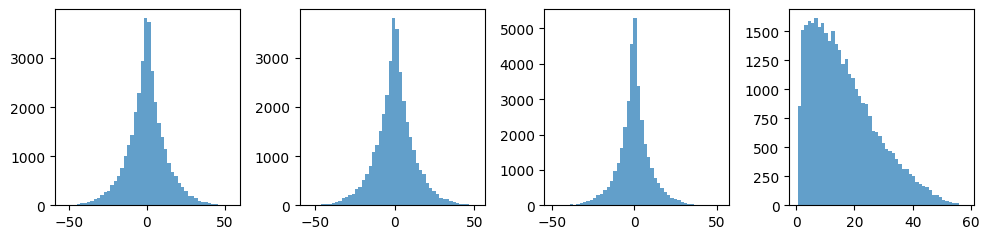

    pt: [[33.1], [4.66], [15.3], [12.7], [25.8], ... [17.9], [4.52], [22], [7.65], [6.35]]
    eta: [[0.26], [-0.506], [0.0714], [0.313], ... [1.33], [-0.199], [0.286], [0.569]]
    phi: [[0.412], [0.954], [0.559], [2.76], [2.95, ... [1.04], [1.35], [-2.84], [-2.07]]
    M: [[0.139], [0.14], [0.14], [0.14], [0.14], ... [0.14], [0.14], [0.14], [0.14], [0.14]]
 ---> Plotting ---> 


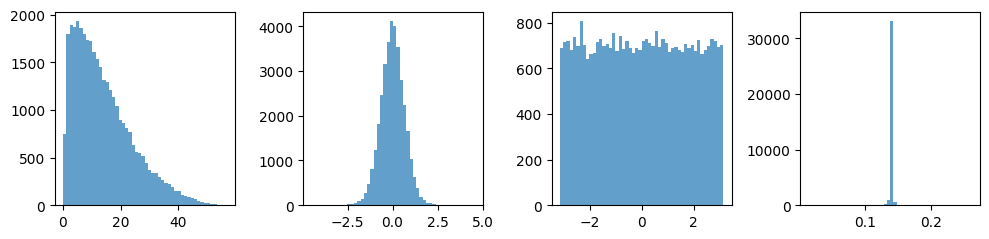

  ===> ss pion1 in Higgs rest frame ===>
    px: [[4.68], [6.67], [1.42], [-8.35], [-15], ... -5.16], [1.05], [1.92], [-8.4], [-11.4]]
    py: [[2.02], [8.11], [0.743], [2.75], [2.77], ... 7.7], [1.57], [9.81], [-2.56], [-18.4]]
    pz: [[1.27], [-4.59], [0.139], [2.58], [-6.11, ... [3.73], [-1.89], [2.33], [12.3]]
    E: [[5.25], [11.5], [1.61], [9.16], [16.4], ... [12.5], [4.18], [10.2], [9.09], [24.9]]
 ---> Plotting ---> 


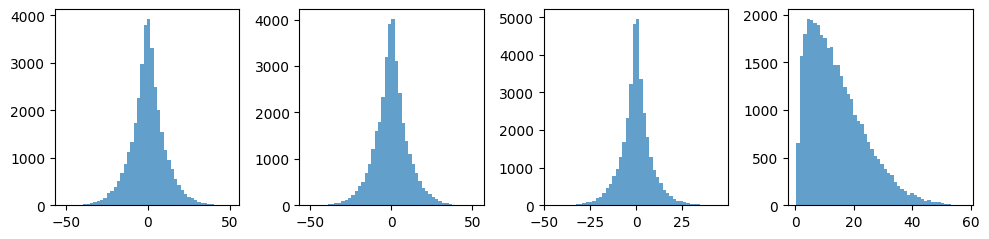

    pt: [[5.09], [10.5], [1.6], [8.79], [15.2], ... [9.27], [1.89], [10], [8.78], [21.6]]
    eta: [[0.246], [-0.425], [0.0868], [0.289], ... [1.43], [-0.188], [0.262], [0.544]]
    phi: [[0.407], [0.882], [0.483], [2.82], [2.96, ... [0.981], [1.38], [-2.85], [-2.13]]
    M: [[0.14], [0.14], [0.14], [0.14], [0.14], ... 0.14], [0.14], [0.14], [0.139], [0.139]]
 ---> Plotting ---> 


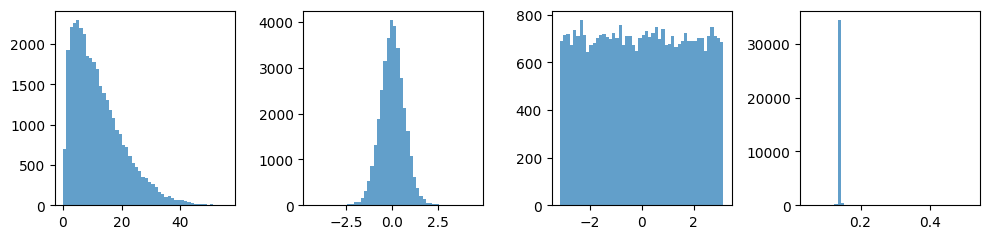

  ===> ss pion2 in Higgs rest frame ===>
    px: [[5.08], [11.9], [12.3], [-15.6], [-14.9, ... [6.12], [5.44], [-15.6], [-5.99]]
    py: [[2.57], [15.2], [7.16], [5.76], [2.58], ... 1.56], [9.15], [25.8], [-4.02], [-9.31]]
    pz: [[1.51], [-9.06], [0.569], [4.87], [-6.1], ... [1.7], [17.7], [-5.1], [3.97], [6.65]]
    E: [[5.9], [21.4], [14.3], [17.3], [16.3], ... [2.55], [20.8], [26.9], [16.6], [12.9]]
 ---> Plotting ---> 


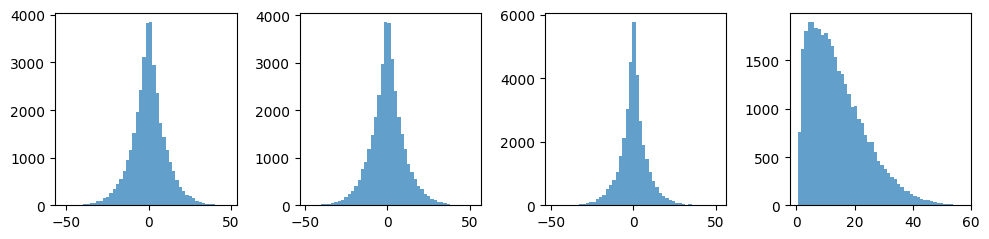

    pt: [[5.7], [19.3], [14.2], [16.6], [15.1], ... [1.9], [11], [26.4], [16.1], [11.1]]
    eta: [[0.262], [-0.453], [0.04], [0.29], ... [1.25], [-0.192], [0.244], [0.569]]
    phi: [[0.469], [0.908], [0.527], [2.79], [2.97, ... [0.981], [1.36], [-2.89], [-2.14]]
    M: [[0.14], [0.14], [0.139], [0.14], [0.14, ... [0.139], [0.138], [0.142], [0.139]]
 ---> Plotting ---> 


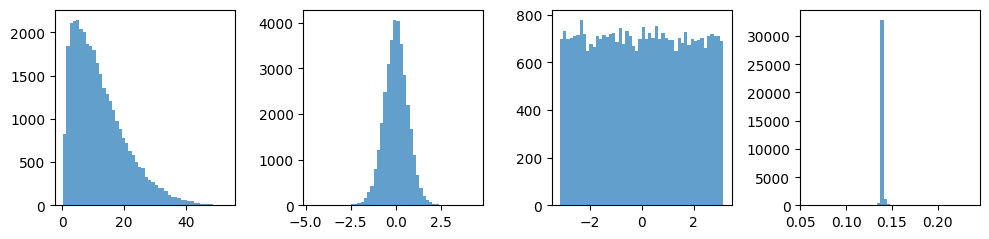

  ===> temp a1 in Higgs rest frame ===>
    px: [[40.1], [21.3], [26.7], [-35.7], [-55.2, ... [9.47], [12.2], [-31.3], [-20.5]]
    py: [[17.8], [27.1], [16], [13.2], [10.2], ... [24.1], [14.6], [57.1], [-8.83], [-33.2]]
    pz: [[11.5], [-16.1], [1.8], [11.5], [-23.5], ... [25], [29.4], [-11.4], [8.51], [22.8]]
    E: [[45.4], [38.1], [31.2], [39.7], [60.9], ... [38.3], [34.2], [59.5], [33.6], [45.2]]
 ---> Plotting ---> 


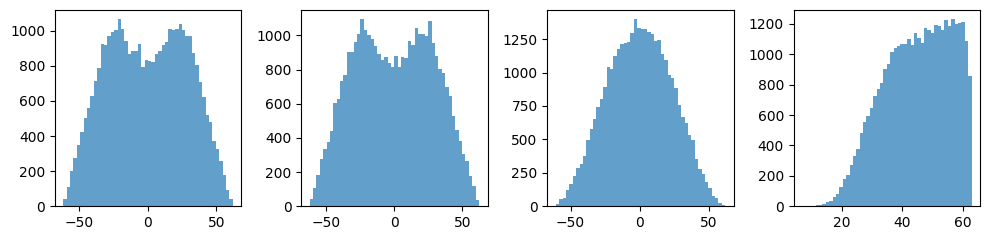

    pt: [[43.9], [34.5], [31.1], [38], [56.1], ... [29.1], [17.4], [58.4], [32.5], [39]]
    eta: [[0.259], [-0.452], [0.0578], [0.297], ... [1.29], [-0.194], [0.259], [0.555]]
    phi: [[0.419], [0.906], [0.54], [2.79], [2.96, ... [0.996], [1.36], [-2.87], [-2.12]]
    M: [[1.06], [1.24], [1.07], [1.07], [1.1], ... [1.04], [1.24], [0.787], [1], [1.16]]
 ---> Plotting ---> 


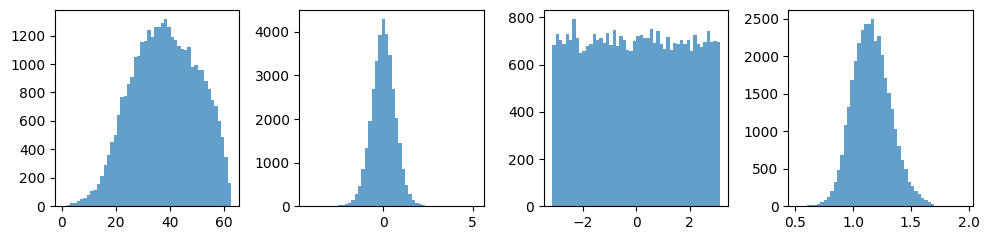

  ===> temp nu in Higgs rest frame ===>
    px: [[15.4], [12.1], [25.3], [-20.5], [-1.5, ... [7.35], [0.25], [-26.9], [-7.49]]
    py: [[6.41], [16.2], [16.2], [6.96], [0.439, ... 14.4], [12.2], [3.07], [-6.82], [-13.1]]
    pz: [[3.62], [-9.96], [1.82], [7.33], [-0.505, ... [24.5], [-0.264], [7.94], [8.56]]
    E: [[17], [22.5], [30.1], [22.8], [1.64], ... [24.2], [28.4], [3.07], [28.9], [17.3]]
 ---> Plotting ---> 


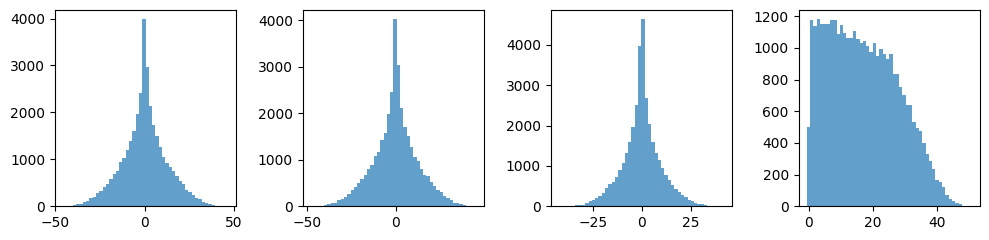

    pt: [[16.7], [20.2], [30], [21.6], [1.56], ... [17.8], [14.2], [3.08], [27.8], [15.1]]
    eta: [[0.216], [-0.475], [0.0607], [0.333], ... [1.31], [-0.0859], [0.282], [0.541]]
    phi: [[0.395], [0.929], [0.569], [2.81], [2.86, ... [1.03], [1.49], [-2.89], [-2.09]]
    M: [[nan], [nan], [0.223], [nan], [0.0886], ... [nan], [nan], [nan], [0.263], [0.387]]
 ---> Plotting ---> 


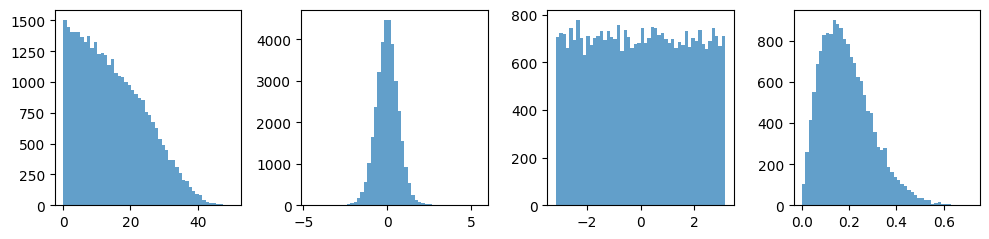

  ===> s1,s2,s3 mass in lab frame
 ---> Plotting ---> 


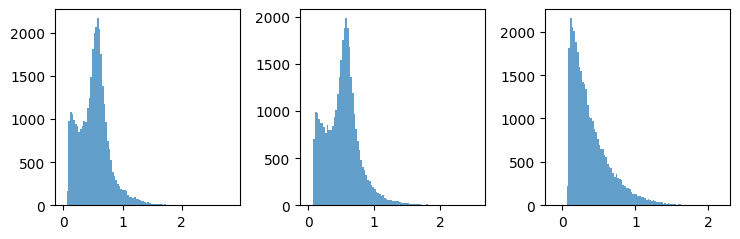

  ===> s1,s2,s3 mass in rest frame: individual boost
 ---> Plotting ---> 


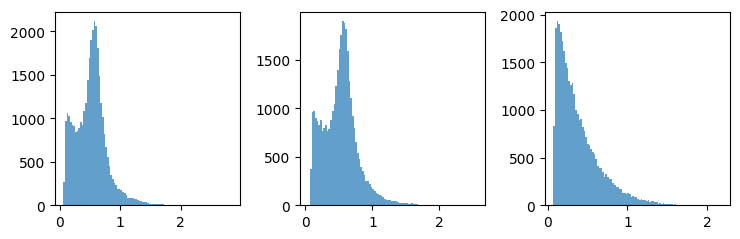

  ===> s1,s2,s3 mass in rest frame: combined boost
 ---> Plotting ---> 


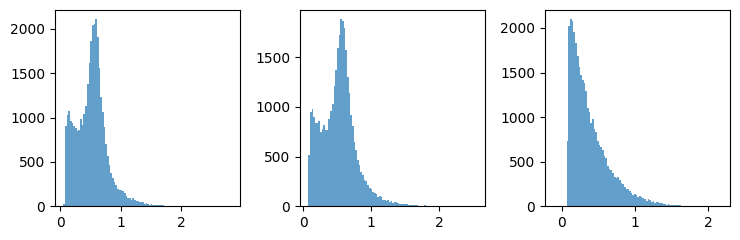

Vladimir
Configure PolarimetricA1 : Start
Configure PolarimetricA1 : End 

>> PVC : Start
>> a1 ===>
    px: [[40.1], [21.3], [26.7], [-35.7], [-55.2, ... [9.47], [12.2], [-31.3], [-20.5]]
    py: [[17.8], [27.1], [16], [13.2], [10.2], ... [24.1], [14.6], [57.1], [-8.83], [-33.2]]
    pz: [[11.5], [-16.1], [1.8], [11.5], [-23.5], ... [25], [29.4], [-11.4], [8.51], [22.8]]
    E: [[45.4], [38.1], [31.2], [39.7], [60.9], ... [38.3], [34.2], [59.5], [33.6], [45.2]]
 ---> Plotting ---> 


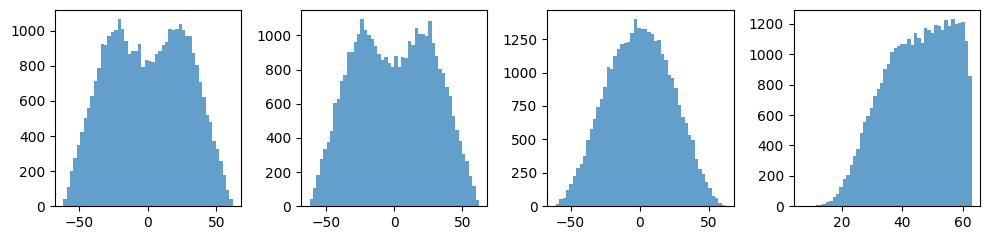

    pt: [[43.9], [34.5], [31.1], [38], [56.1], ... [29.1], [17.4], [58.4], [32.5], [39]]
    eta: [[0.259], [-0.452], [0.0578], [0.297], ... [1.29], [-0.194], [0.259], [0.555]]
    phi: [[0.419], [0.906], [0.54], [2.79], [2.96, ... [0.996], [1.36], [-2.87], [-2.12]]
    M: [[1.06], [1.24], [1.07], [1.07], [1.1], ... [1.04], [1.24], [0.787], [1], [1.16]]
 ---> Plotting ---> 


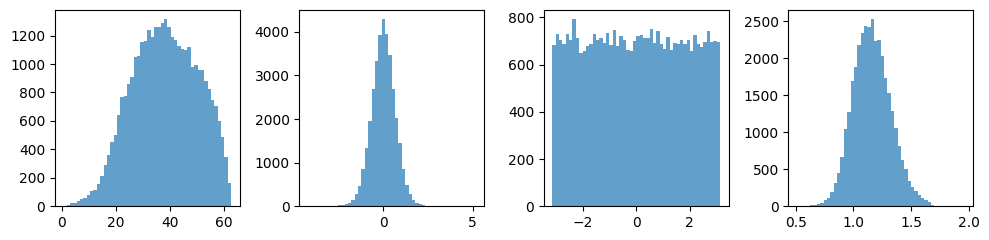

>> Nu ===>
    px: [[15.4], [12.1], [25.3], [-20.5], [-1.5, ... [7.35], [0.25], [-26.9], [-7.49]]
    py: [[6.41], [16.2], [16.2], [6.96], [0.439, ... 14.4], [12.2], [3.07], [-6.82], [-13.1]]
    pz: [[3.62], [-9.96], [1.82], [7.33], [-0.505, ... [24.5], [-0.264], [7.94], [8.56]]
    E: [[17], [22.5], [30.1], [22.8], [1.64], ... [24.2], [28.4], [3.09], [28.9], [17.3]]
 ---> Plotting ---> 


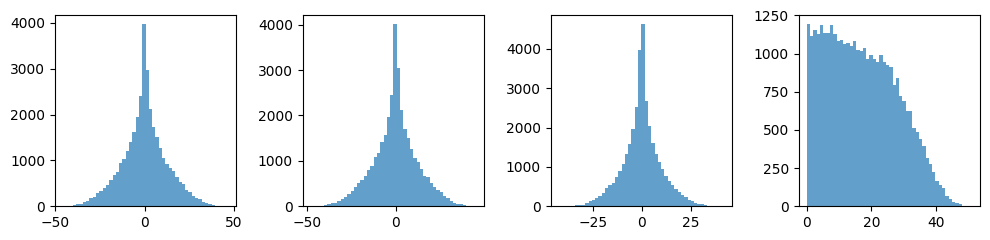

    pt: [[16.7], [20.2], [30], [21.6], [1.56], ... [17.8], [14.2], [3.08], [27.8], [15.1]]
    eta: [[0.216], [-0.475], [0.0607], [0.333], ... [1.31], [-0.0859], [0.282], [0.541]]
    phi: [[0.395], [0.929], [0.569], [2.81], [2.86, ... [1.03], [1.49], [-2.89], [-2.09]]
    M: [[0], [0], [0], [0], [0], [0], [0], [0], ... [0], [0], [0], [0], [0], [0], [0], [0]]
 ---> Plotting ---> 


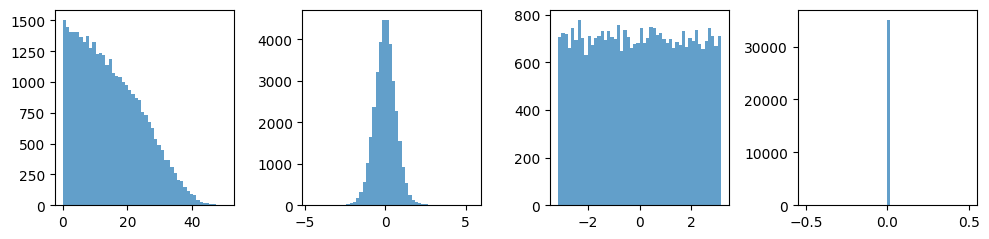

>> s1: ss2_pi + os_pi : [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>> s2: ss1_pi + os_pi : [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>> s3: ss1_pi + ss2_pi: [[0.196], [0.372], [0.307], [0.277], ... [0.821], [0.155], [0.389], [0.291]]
 ---> Plotting ---> 


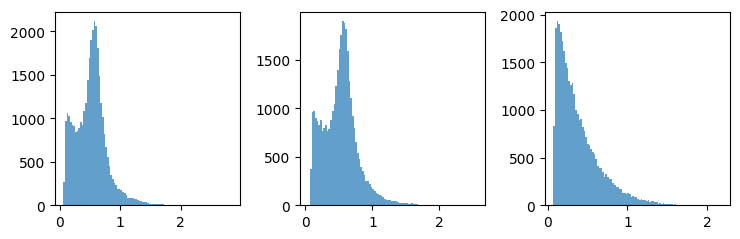

>> vec1 ===>
    px: [[4.63e+04], [-8.44e+03], [764], ... [-5.26e+03], [9.02e+03], [3.78e+03]]
    py: [[2.06e+04], [-1.08e+04], [458], ... [-2.46e+04], [2.55e+03], [6.15e+03]]
    pz: [[1.33e+04], [6.39e+03], [51.1], ... [4.92e+03], [-2.45e+03], [-4.22e+03]]
    E: [[5.24e+04], [-1.51e+04], [893], ... [-2.57e+04], [-9.69e+03], [-8.36e+03]]
 ---> Plotting ---> 


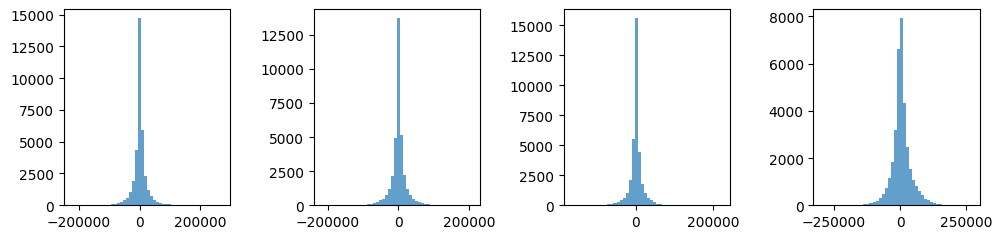

    pt: [[5.07e+04], [1.37e+04], [891], [5.28e+03, ... [2.52e+04], [9.37e+03], [7.22e+03]]
    eta: [[0.259], [0.452], [0.0573], [-0.297], ... [-1.3], [0.194], [-0.259], [-0.555]]
    phi: [[0.419], [-2.24], [0.54], [-0.355], [2.96, ... [-2.15], [-1.78], [0.275], [1.02]]
    M: [[1.22e+03], [493], [30.7], [149], [657], ... [765], [320], [339], [289], [215]]
 ---> Plotting ---> 


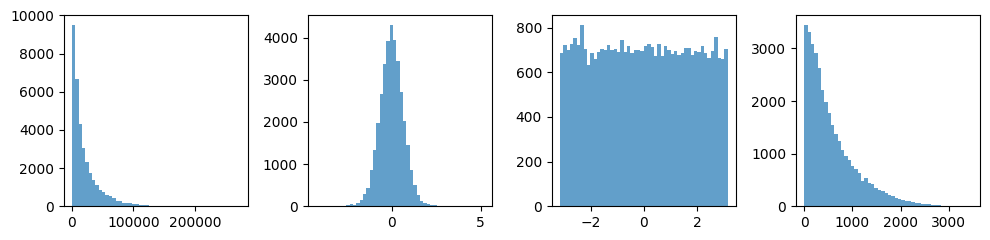

>> vec2 ===> 
    px: [[-4.74e+04], [3.25e+03], [-9.91e+03], ... [-1.43e+04], [-1.18e+03], [-1.2e+04]]
    py: [[-2.11e+04], [4.14e+03], [-5.94e+03], ... [-6.71e+04], [-334], [-1.95e+04]]
    pz: [[-1.36e+04], [-2.46e+03], [-668], [-1.65e+03, ... [1.34e+04], [322], [1.34e+04]]
    E: [[-5.36e+04], [5.81e+03], [-1.16e+04], ... [-6.99e+04], [1.27e+03], [2.65e+04]]
 ---> Plotting ---> 


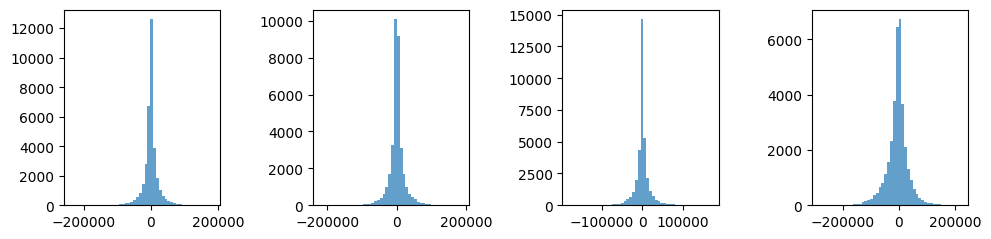

    pt: [[5.18e+04], [5.26e+03], [1.16e+04], ... [6.86e+04], [1.23e+03], [2.29e+04]]
    eta: [[-0.259], [-0.452], [-0.0578], [-0.297], ... [-1.3], [0.194], [0.259], [0.555]]
    phi: [[-2.72], [0.906], [-2.6], [-0.355], ... [-2.15], [-1.78], [-2.87], [-2.12]]
    M: [[1.25e+03], [190], [398], [154], [651], ... [397], [137], [925], [38], [681]]
 ---> Plotting ---> 


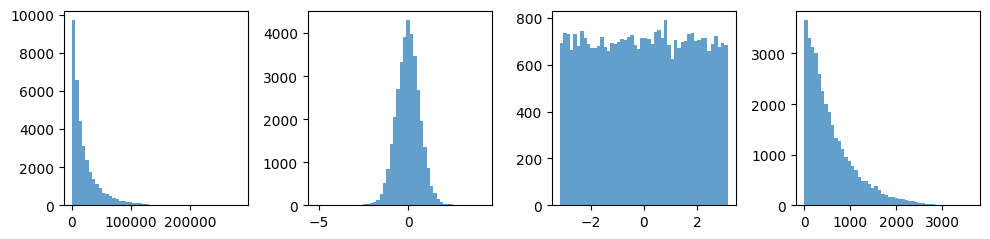

>> vec3 ===>
    px: [[1.04e+03], [5.19e+03], [9.14e+03], ... [1.96e+04], [-7.83e+03], [8.22e+03]]
    py: [[463], [6.62e+03], [5.48e+03], ... [9.17e+04], [-2.21e+03], [1.33e+04]]
    pz: [[298], [-3.93e+03], [617], [3.25e+03, ... [-1.83e+04], [2.13e+03], [-9.15e+03]]
    E: [[1.18e+03], [9.29e+03], [1.07e+04], ... [9.55e+04], [8.42e+03], [-1.82e+04]]
 ---> Plotting ---> 


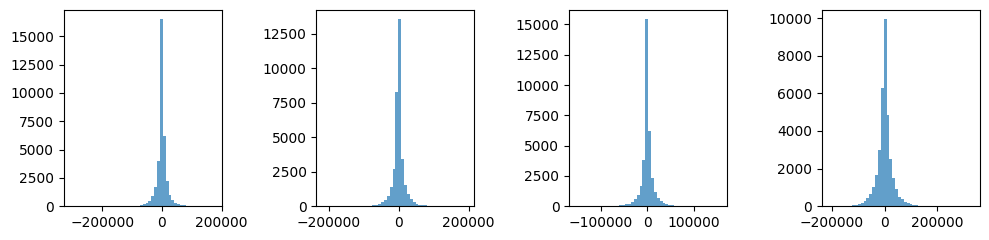

    pt: [[1.14e+03], [8.42e+03], [1.07e+04], ... [9.38e+04], [8.14e+03], [1.57e+04]]
    eta: [[0.259], [-0.452], [0.0578], [0.297], ... [1.3], [-0.194], [0.259], [-0.555]]
    phi: [[0.418], [0.906], [0.54], [2.79], [-0.183, ... [0.996], [1.36], [-2.87], [1.02]]
    M: [[27.1], [303], [368], [302], [5.73], ... [368], [457], [1.26e+03], [251], [466]]
 ---> Plotting ---> 


/Users/gsaha/anaconda3/envs/PyTorchEnv/lib/python3.11/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


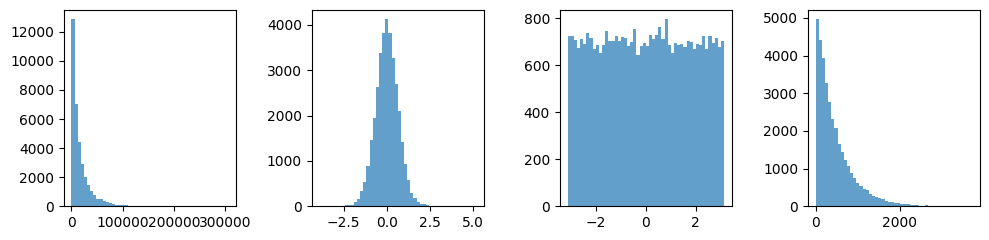

>> F1 ===>
>>>> F3PI --- : --- Start ---
>>>> BT1: 1.0	0.0
>>>> BT2: -0.11994078724388779	0.0037692910893753883
>>>> BT3: 0.3296724139496961	-0.16797648490363232
>>>> BT4: -0.0818742325871075	0.8661389092046796
>>>> BT5: -0.1330407333558646	0.6974239480173688
>>>> BT6: 1.5752332462239653	1.388754917179669
>>>> BT7: -0.09650658984451436	-0.7639283200121479
>>>> IDK: 1
>>>> IFORM: 1
>>>> S1: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>> S2: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>> S3: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
 ---> Plotting ---> 


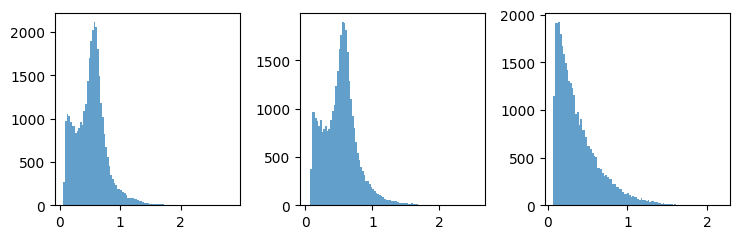

>>>> F134: [[0.193], [0.0671], [0.0734], [0.0226], ... [-0.0787], [0.0253], [0.0563], [0.0554]]
>>>> F150: [[-0.0445], [-0.0844], [-0.0606], [-0.057, ... [-0.0218], [-0.0616], [-0.0672]]
>>>> F167: 0.6666666666666666
>>>> FRO1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.834], [0.703], [0.67], [0.515], ... [0.711]

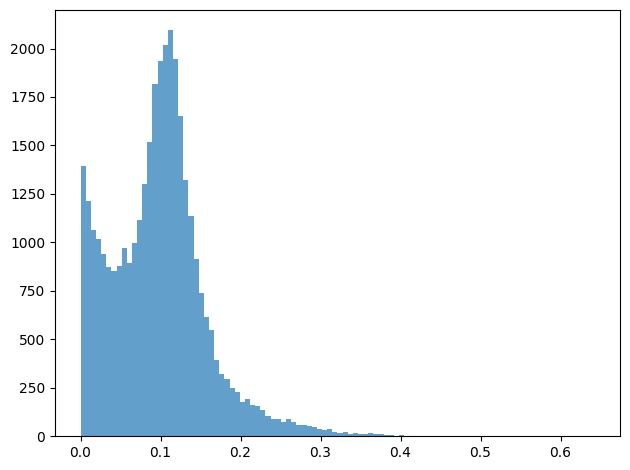

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[-0.172], [0.0302], [0.0757], [0.259], ... [0.0188], [0.373], [0.046], [0.146]] - Im: [[-0.156], [-0.108], [-0.0978], [-0.0552, ... [-0.0291], [-0.105], [-0.0813]]
 ---> Plotting ---> 


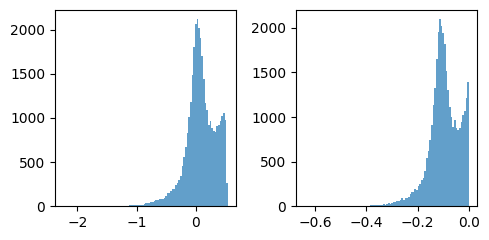

>>>>>> BWIGML out: [[-1.91], [1.43], [2.97], [2.22], [-0.43], ... [1.98], [0.89], [1.6], [2.11], [3.13]]	[[1.73], [5.13], [3.84], [0.473], [5.05], ... 0.311], [5.25], [0.125], [4.8], [1.74]]
 ---> Plotting ---> 


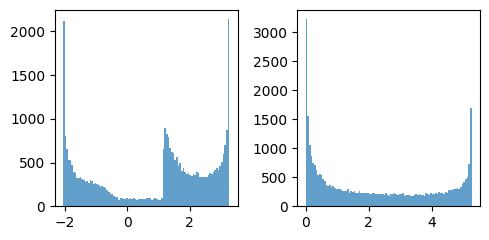

>>>>>> BWIGML : End 
>>>> FRP1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.834], [0.703], [0.67], [0.515], ... [0.711], [0.389], [0.692], [0.615]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.198], [0.138], [0.124], [0.0702], ... [0.141], [0.0371], [0.133], [0.103]]
>>>>>>>> GetWGS :

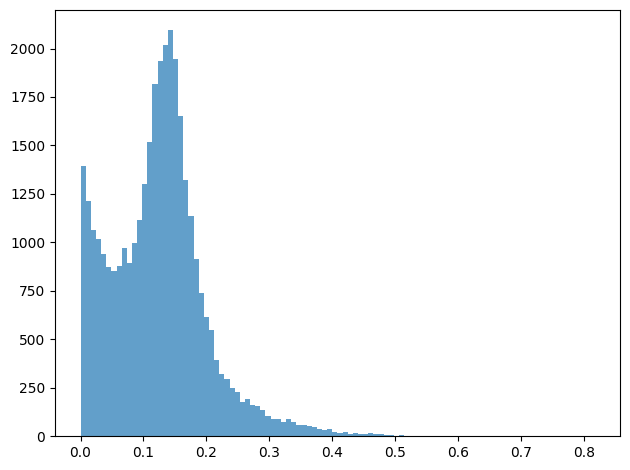

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.11], [1.31], [1.35], [1.54], [1.27], ... [1.57], [1.3], [1.65], [1.32], [1.42]] - Im: [[-0.198], [-0.138], [-0.124], [-0.0702], ... -0.141], [-0.0371], [-0.133], [-0.103]]
 ---> Plotting ---> 


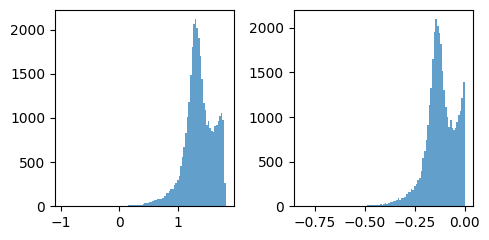

>>>>>> BWIGML out: [[1.65], [1.42], [1.38], [1.22], [1.46], ... [1.19], [1.43], [1.14], [1.4], [1.31]]	[[0.295], [0.15], [0.126], [0.0557], ... [0.156], [0.0255], [0.141], [0.0953]]
 ---> Plotting ---> 


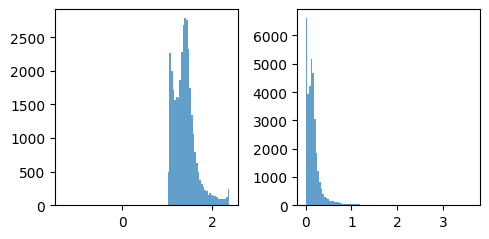

>>>>>> BWIGML : End 
>>>> FRO2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.452], [0.812], [0.612], [0.763], ... [0.453], [0.544], [0.342], [0.814]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.452], [0.812], [0.612], [0.763], ... [0.453], [0.544], [0.342], [0.814]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.359], [0.765], [0.547], [0.712], ... [0.36], [0.469], [0.205], [0.766]]
>>>>>>>> QM: 0.723979355706531
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.0242], [0.13], [0.0631], [0.112], ... [0.0243], [0.0448], [0.0059], [0.13]]
>>>>>>>> GetWGS : End
>>>>>

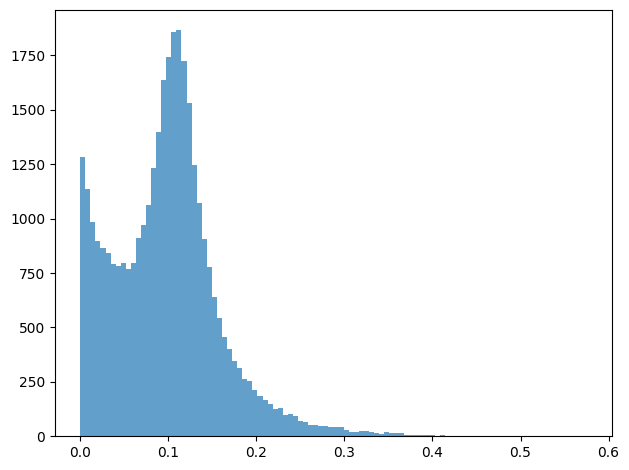

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[0.395], [-0.0605], [0.225], [0.0168], ... [0.395], [0.304], [0.482], [-0.063]] - Im: [[-0.0242], [-0.13], [-0.0631], [-0.112, ... -0.0243], [-0.0448], [-0.0059], [-0.13]]
 ---> Plotting ---> 


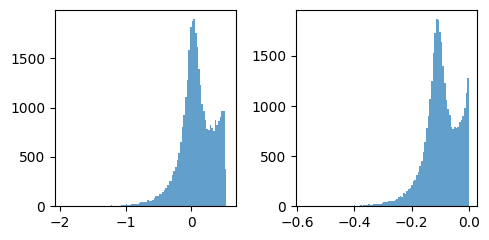

>>>>>> BWIGML out: [[1.51], [-1.77], [2.47], [0.79], [1.91, ... -1.99], [1.51], [1.93], [1.24], [-1.81]]	[[0.0925], [3.8], [0.694], [5.26], [4.92, ... [0.0931], [0.285], [0.0152], [3.73]]
 ---> Plotting ---> 


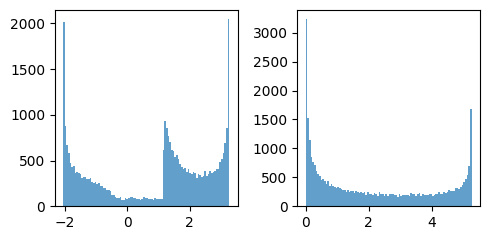

>>>>>> BWIGML : End 
>>>> FRP2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.452], [0.812], [0.612], [0.763], ... [0.453], [0.544], [0.342], [0.814]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.452], [0.812], [0.612], [0.763], ... [0.453], [0.544], [0.342], [0.814]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.359], [0.765], [0.547], [0.712], ... [0.36], [0.469], [0.205], [0.766]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.0307], [0.165], [0.0802], [0.142], ... [0.0309], [0.057], [0.00751], [0.166]]
>>>>>>>> GetWGS 

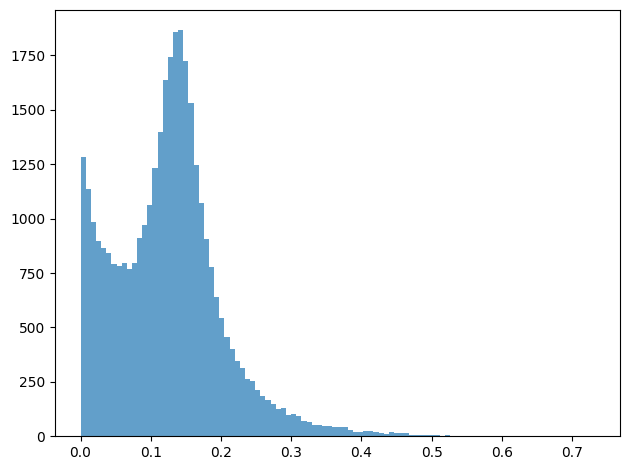

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.67], [1.22], [1.5], [1.29], [1.32], ... [1.19], [1.67], [1.58], [1.76], [1.21]] - Im: [[-0.0307], [-0.165], [-0.0802], [-0.142, ... [-0.057], [-0.00751], [-0.166]]
 ---> Plotting ---> 


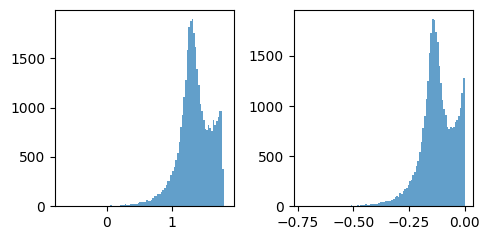

>>>>>> BWIGML out: [[1.12], [1.51], [1.25], [1.43], [1.41], ... [1.54], [1.12], [1.19], [1.07], [1.52]]	[[0.0206], [0.205], [0.0665], [0.157], ... [0.0207], [0.0427], [0.00455], [0.207]]
 ---> Plotting ---> 


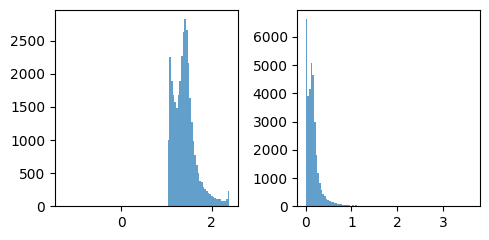

>>>>>> BWIGML : End 
>>>> FF23 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>> M: 1.275
>>>>>> G: 0.185
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.6256249999999999
>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.6256249999999999
>>>>>>>> L: 2
>>>>>>>> G: 0.185
>>>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> M: 1.275
>>>>>>>> QS: [[0.347], [0.545], [0.482], [0.449], ... [0.863], [0.282], [0.559], [0.464]]
>>>>>>>> QM: 1.246094005205771
>>>>>>>> IPOW: 5
>>>>>>>> WGS: [[0.00114], [0.00789], [0.0047], [0.00348, ... [0.000455], [0.00883], [0.00402]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[

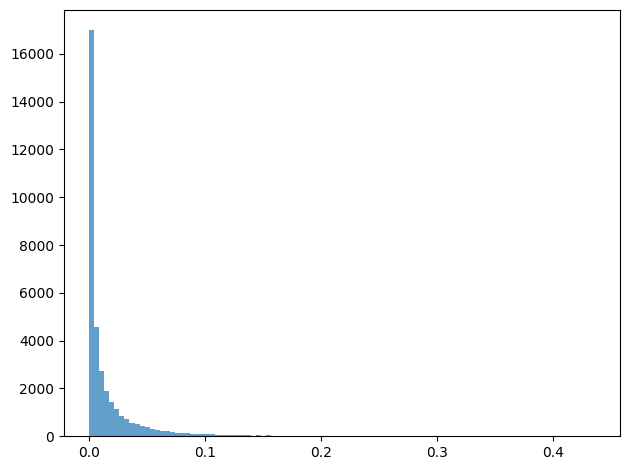

>>>>>> num - Re: 1.6256249999999999 - Im: 0
>>>>>> den - Re: [[1.43], [1.26], [1.32], [1.35], [1.52], ... [1.48], [0.808], [1.47], [1.24], [1.34]] - Im: [[-0.00114], [-0.00789], [-0.0047], ... [-0.000455], [-0.00883], [-0.00402]]
 ---> Plotting ---> 


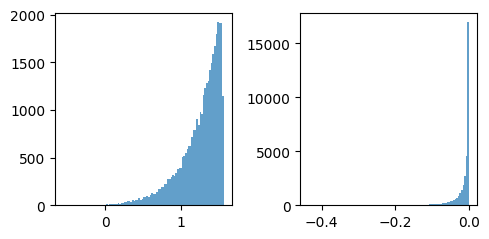

>>>>>> BWIGML out: [[1.13], [1.29], [1.23], [1.2], [1.07], ... [1.1], [2], [1.1], [1.31], [1.22]]	[[0.000906], [0.00813], [0.00438], [0.0031, ... [0.000341], [0.00933], [0.00366]]
 ---> Plotting ---> 


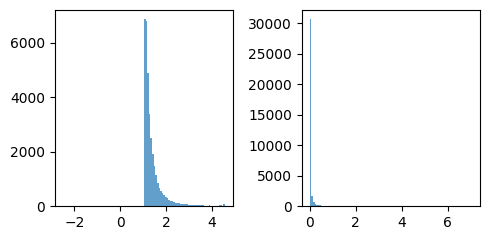

>>>>>> BWIGML : End 
>>>> FSG3 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>> M: 0.86
>>>>>> G: 0.88
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 0.7395999999999999
>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 0.7395999999999999
>>>>>>>> L: 0
>>>>>>>> G: 0.88
>>>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> M: 0.86
>>>>>>>> QS: [[0.347], [0.545], [0.482], [0.449], ... [0.863], [0.282], [0.559], [0.464]]
>>>>>>>> QM: 0.8165324670885781
>>>>>>>> IPOW: 1
>>>>>>>> WGS: [[0.629], [0.714], [0.695], [0.683], ... [0.761], [0.576], [0.718], [0.689]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], 

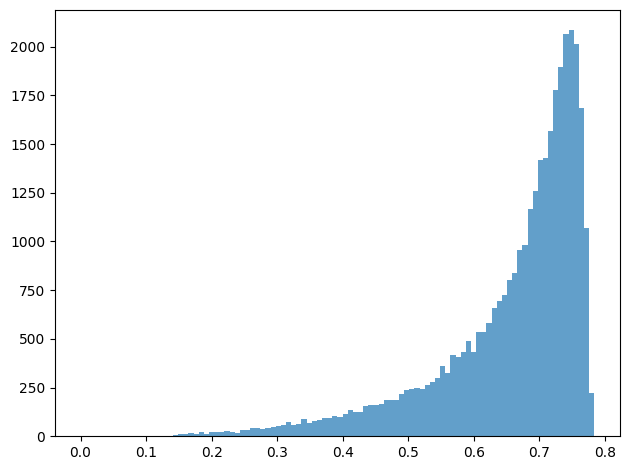

>>>>>> num - Re: 0.7395999999999999 - Im: 0
>>>>>> den - Re: [[0.546], [0.37], [0.435], [0.465], ... [-0.0785], [0.587], [0.354], [0.451]] - Im: [[-0.629], [-0.714], [-0.695], [-0.683], ... [-0.761], [-0.576], [-0.718], [-0.689]]
 ---> Plotting ---> 


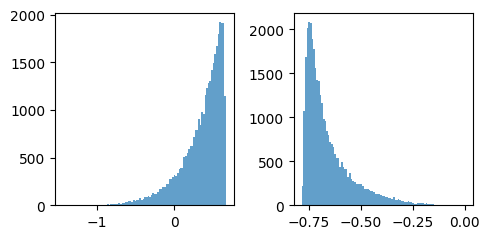

>>>>>> BWIGML out: [[0.582], [0.423], [0.478], [0.504], ... [-0.0993], [0.642], [0.409], [0.492]]	[[0.67], [0.816], [0.765], [0.74], [0.55, ... [0.962], [0.629], [0.829], [0.751]]
 ---> Plotting ---> 


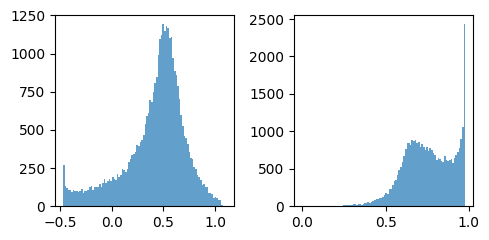

>>>>>> BWIGML : End 
>>>> FF03 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>> M: 1.186
>>>>>> G: 0.35
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.406596
>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.406596
>>>>>>>> L: 0
>>>>>>>> G: 0.35
>>>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> M: 1.186
>>>>>>>> QS: [[0.347], [0.545], [0.482], [0.449], ... [0.863], [0.282], [0.559], [0.464]]
>>>>>>>> QM: 1.1548685075842011
>>>>>>>> IPOW: 1
>>>>>>>> WGS: [[0.336], [0.382], [0.372], [0.365], ... [0.407], [0.308], [0.384], [0.369]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], [True], [True], [T

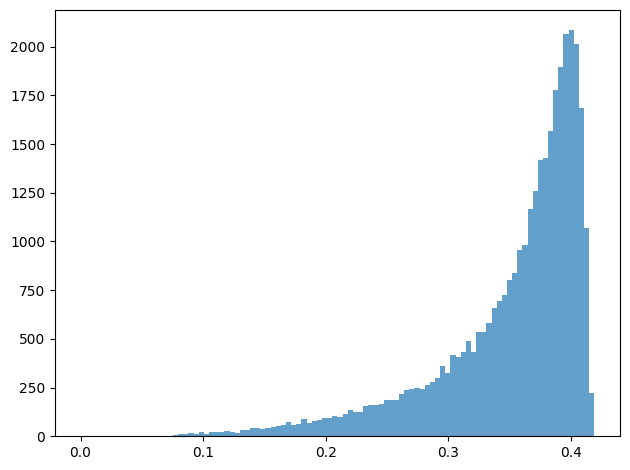

>>>>>> num - Re: 1.406596 - Im: 0
>>>>>> den - Re: [[1.21], [1.04], [1.1], [1.13], [1.3], ... [1.26], [0.588], [1.25], [1.02], [1.12]] - Im: [[-0.336], [-0.382], [-0.372], [-0.365], ... [-0.407], [-0.308], [-0.384], [-0.369]]
 ---> Plotting ---> 


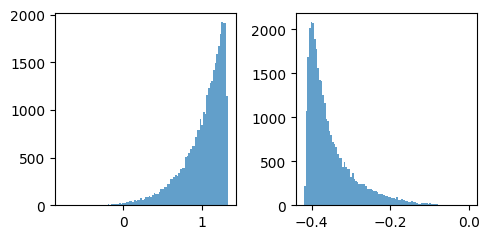

>>>>>> BWIGML out: [[1.08], [1.19], [1.15], [1.13], [1.05], ... [1.05], [1.62], [1.06], [1.21], [1.13]]	[[0.298], [0.44], [0.387], [0.363], [0.192, ... [1.12], [0.26], [0.454], [0.374]]
 ---> Plotting ---> 


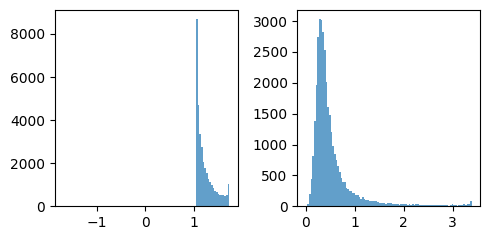

>>>>>> BWIGML : End 
>>>> F3PIFactor: [[-1.95], [1.09], [2.79], [2.06], [-0.0584, ... [0.199], [1.64], [1.78], [2.91]]	[[2.49], [5.85], [4.48], [1.13], [6.2], ... [1.14], [5.04], [0.83], [5.38], [2.48]]


>>>> \\ F3PI ///
 ---> Plotting ---> 


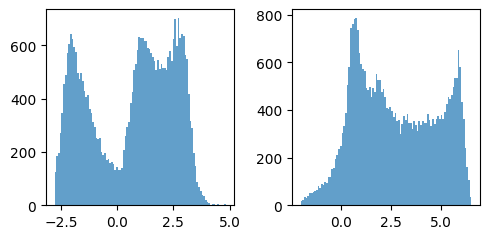

>>>>>> FA1A1P : Start
>>>>>>>> WGA1 : Start
>>>>>>>> S: [[1.11], [1.54], [1.15], [1.14], [1.22], ... [1.08], [1.55], [0.619], [1], [1.35]]
>>>>>>>>>> WGA1C : Start
>>>>>>>>>> G1_IM: [[4.55], [8.04], [4.86], [4.81], [5.47], ... [4.19], [8.08], [0.287], [3.47], [6.54]]
>>>>>>>>>> WGA1C : End 
>>>>>>>>>> WGA1N : Start
>>>>>>>>>> G1_IM: [[4.65], [8.05], [4.96], [4.91], [5.56], ... [4.3], [8.08], [0.316], [3.58], [6.6]]
>>>>>>>>>> WGA1N : End
>>>>>>>> S > MK1SQ: [[False], [False], [False], [False], ... [False], [False], [False], [False]]
>>>>>>>> GKST: [[0], [0], [0], [0], [0], [0], [0], [0], ... [0], [0], [0], [0], [0], [0], [0], [0]]
>>>>>>>> out: [[0.523], [0.914], [0.558], [0.552], ... [0.918], [0.0343], [0.4], [0.747]]
>>>>>>>> WGA1 : End
>>>>>> FA1A1P: <TComplex.TComplex object at 0x310a45f50>
>>>>>> FA1A1P : End
>>>> FORMA1: [[1.84], [0.229], [1.75], [1.76], [1.51], ... 1.92], [0.213], [1.61], [2.02], [0.97]]	[[1.57], [2.11], [1.7], [1.68], [1.94], ... [1.41], [2.1], [0.0458], [1.08]

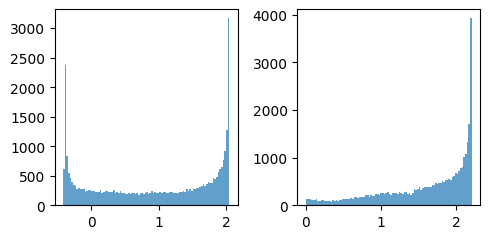

>>>> F3PIFactor x FORMA1: [[-7.5], [-12.1], [-2.74], [1.72], [-12.1, ... [-10.5], [2.6], [-2.21], [-2.58]]	[[1.52], [3.64], [12.6], [5.45], [9.23], ... [4.99], [1.49], [1.41], [12.8], [8.75]]
>>>> \\ F3PIFactor x FORMA1 ///
 ---> Plotting ---> 


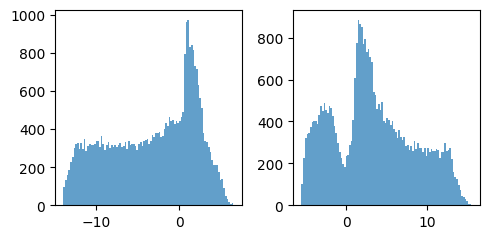

>>>> F3PI : End


>> F1: [[-7.07], [-11.4], [-2.58], [1.63], [-11.4, ... [-9.93], [2.45], [-2.08], [-2.43]]	[[1.43], [3.44], [11.8], [5.14], [8.7], ... [4.71], [1.41], [1.33], [12.1], [8.25]]

 ---> Plotting ---> 


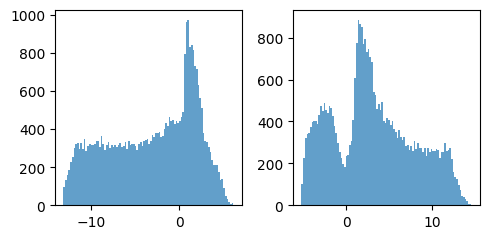

>> F2 ===>
>>>> F3PI --- : --- Start ---
>>>> BT1: 1.0	0.0
>>>> BT2: -0.11994078724388779	0.0037692910893753883
>>>> BT3: 0.3296724139496961	-0.16797648490363232
>>>> BT4: -0.0818742325871075	0.8661389092046796
>>>> BT5: -0.1330407333558646	0.6974239480173688
>>>> BT6: 1.5752332462239653	1.388754917179669
>>>> BT7: -0.09650658984451436	-0.7639283200121479
>>>> IDK: 1
>>>> IFORM: 2
>>>> S1: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>> S2: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>> S3: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
 ---> Plotting ---> 


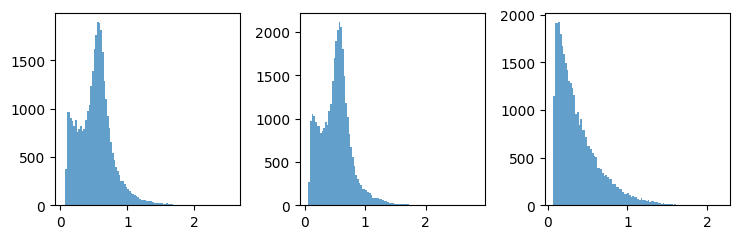

>>>> F134: [[0.00418], [0.0973], [0.0238], [0.103], ... [-0.204], [0.0483], [-0.0891], [0.125]]
>>>> F150: [[-0.0445], [-0.0844], [-0.0606], [-0.057, ... [-0.0218], [-0.0616], [-0.0672]]
>>>> F167: 0.6666666666666666
>>>> FRO1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.452], [0.812], [0.612], [0.763], ... [0.453], [0.544], [0.342], [0.814]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.452], [0.812], [0.612], [0.763], ... [0.453], [0.544], [0.342], [0.814]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.359], [0.765], [0.547], [0.712], ... [0.36], 

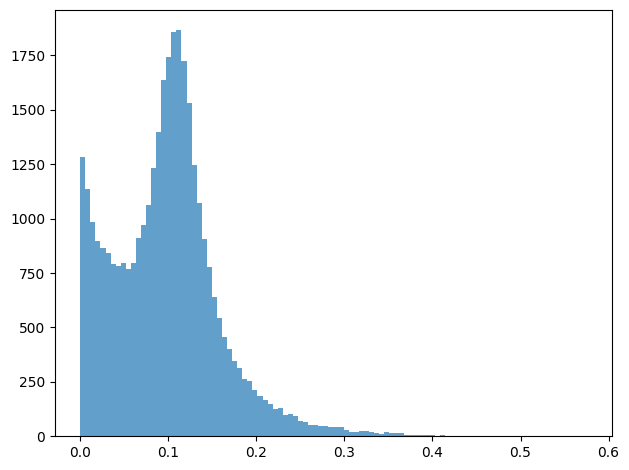

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[0.395], [-0.0605], [0.225], [0.0168], ... [0.395], [0.304], [0.482], [-0.063]] - Im: [[-0.0242], [-0.13], [-0.0631], [-0.112, ... -0.0243], [-0.0448], [-0.0059], [-0.13]]
 ---> Plotting ---> 


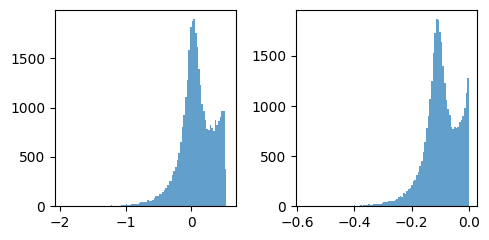

>>>>>> BWIGML out: [[1.51], [-1.77], [2.47], [0.79], [1.91, ... -1.99], [1.51], [1.93], [1.24], [-1.81]]	[[0.0925], [3.8], [0.694], [5.26], [4.92, ... [0.0931], [0.285], [0.0152], [3.73]]
 ---> Plotting ---> 


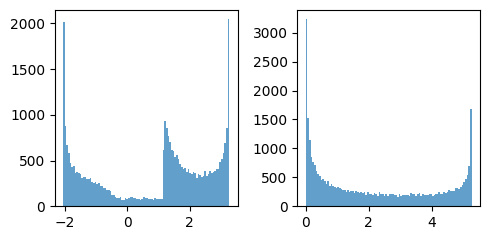

>>>>>> BWIGML : End 
>>>> FRP1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.452], [0.812], [0.612], [0.763], ... [0.453], [0.544], [0.342], [0.814]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.204], [0.66], [0.375], [0.583], ... [0.205], [0.296], [0.117], [0.663]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.452], [0.812], [0.612], [0.763], ... [0.453], [0.544], [0.342], [0.814]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.359], [0.765], [0.547], [0.712], ... [0.36], [0.469], [0.205], [0.766]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.0307], [0.165], [0.0802], [0.142], ... [0.0309], [0.057], [0.00751], [0.166]]
>>>>>>>> GetWGS 

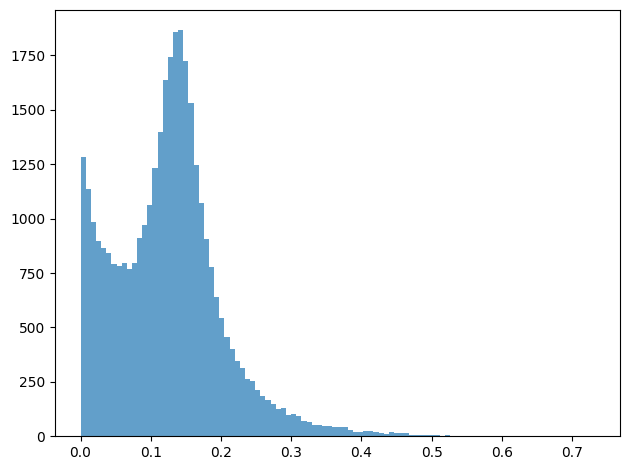

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.67], [1.22], [1.5], [1.29], [1.32], ... [1.19], [1.67], [1.58], [1.76], [1.21]] - Im: [[-0.0307], [-0.165], [-0.0802], [-0.142, ... [-0.057], [-0.00751], [-0.166]]
 ---> Plotting ---> 


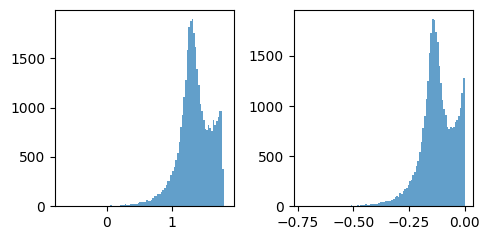

>>>>>> BWIGML out: [[1.12], [1.51], [1.25], [1.43], [1.41], ... [1.54], [1.12], [1.19], [1.07], [1.52]]	[[0.0206], [0.205], [0.0665], [0.157], ... [0.0207], [0.0427], [0.00455], [0.207]]
 ---> Plotting ---> 


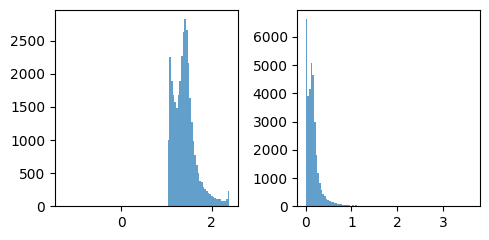

>>>>>> BWIGML : End 
>>>> FRO2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.834], [0.703], [0.67], [0.515], ... [0.711], [0.389], [0.692], [0.615]]
>>>>>>>> QM: 0.723979355706531
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.156], [0.108], [0.0978], [0.0552], ... [0.111], [0.0291], [0.105], [0.0813]]
>>>>>>>> GetWGS : End
>>

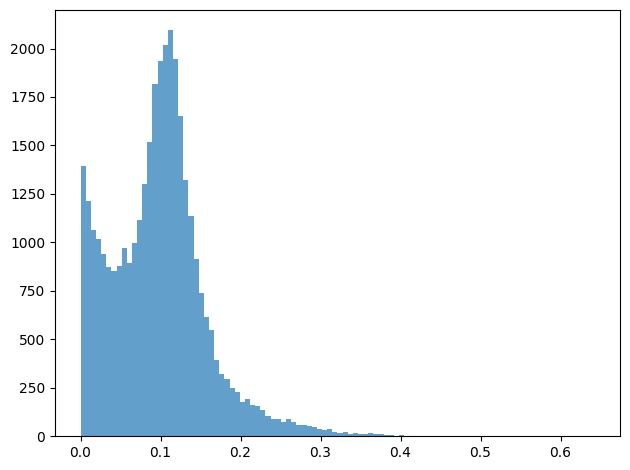

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[-0.172], [0.0302], [0.0757], [0.259], ... [0.0188], [0.373], [0.046], [0.146]] - Im: [[-0.156], [-0.108], [-0.0978], [-0.0552, ... [-0.0291], [-0.105], [-0.0813]]
 ---> Plotting ---> 


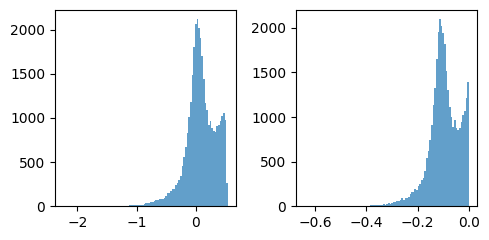

>>>>>> BWIGML out: [[-1.91], [1.43], [2.97], [2.22], [-0.43], ... [1.98], [0.89], [1.6], [2.11], [3.13]]	[[1.73], [5.13], [3.84], [0.473], [5.05], ... 0.311], [5.25], [0.125], [4.8], [1.74]]
 ---> Plotting ---> 


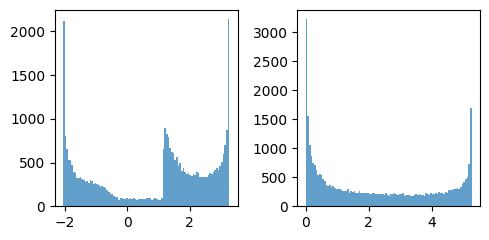

>>>>>> BWIGML : End 
>>>> FRP2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.834], [0.703], [0.67], [0.515], ... [0.711], [0.389], [0.692], [0.615]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.198], [0.138], [0.124], [0.0702], ... [0.141], [0.0371], [0.133], [0.103]]
>>>>>>>> GetWGS :

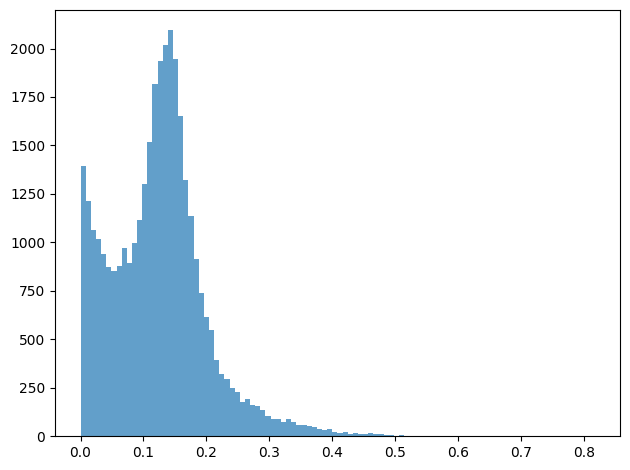

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.11], [1.31], [1.35], [1.54], [1.27], ... [1.57], [1.3], [1.65], [1.32], [1.42]] - Im: [[-0.198], [-0.138], [-0.124], [-0.0702], ... -0.141], [-0.0371], [-0.133], [-0.103]]
 ---> Plotting ---> 


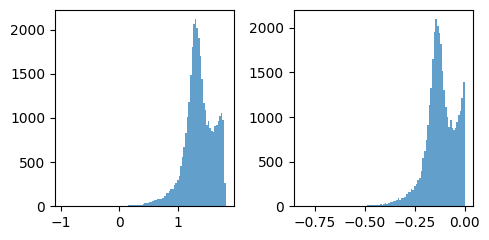

>>>>>> BWIGML out: [[1.65], [1.42], [1.38], [1.22], [1.46], ... [1.19], [1.43], [1.14], [1.4], [1.31]]	[[0.295], [0.15], [0.126], [0.0557], ... [0.156], [0.0255], [0.141], [0.0953]]
 ---> Plotting ---> 


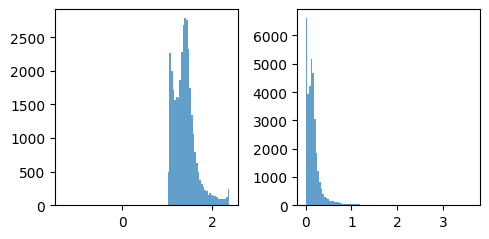

>>>>>> BWIGML : End 
>>>> FF23 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>> M: 1.275
>>>>>> G: 0.185
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.6256249999999999
>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.6256249999999999
>>>>>>>> L: 2
>>>>>>>> G: 0.185
>>>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> M: 1.275
>>>>>>>> QS: [[0.347], [0.545], [0.482], [0.449], ... [0.863], [0.282], [0.559], [0.464]]
>>>>>>>> QM: 1.246094005205771
>>>>>>>> IPOW: 5
>>>>>>>> WGS: [[0.00114], [0.00789], [0.0047], [0.00348, ... [0.000455], [0.00883], [0.00402]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[

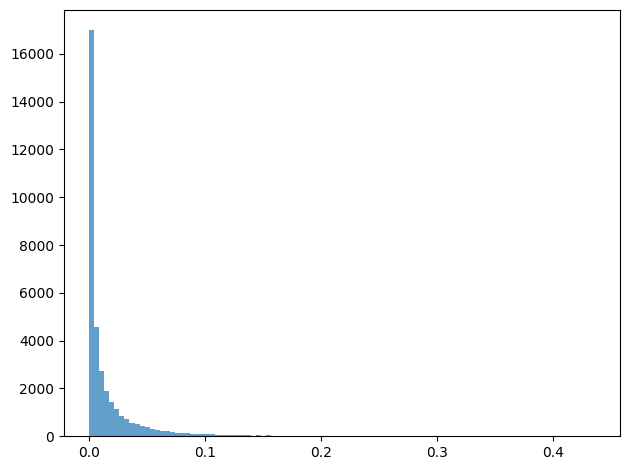

>>>>>> num - Re: 1.6256249999999999 - Im: 0
>>>>>> den - Re: [[1.43], [1.26], [1.32], [1.35], [1.52], ... [1.48], [0.808], [1.47], [1.24], [1.34]] - Im: [[-0.00114], [-0.00789], [-0.0047], ... [-0.000455], [-0.00883], [-0.00402]]
 ---> Plotting ---> 


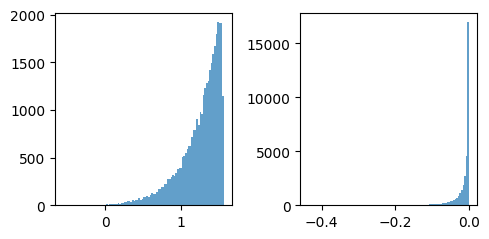

>>>>>> BWIGML out: [[1.13], [1.29], [1.23], [1.2], [1.07], ... [1.1], [2], [1.1], [1.31], [1.22]]	[[0.000906], [0.00813], [0.00438], [0.0031, ... [0.000341], [0.00933], [0.00366]]
 ---> Plotting ---> 


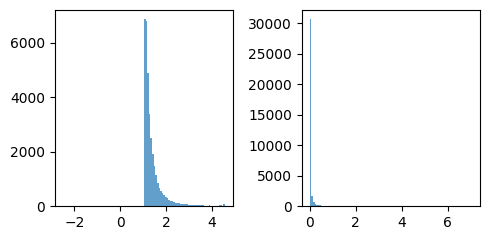

>>>>>> BWIGML : End 
>>>> FSG3 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>> M: 0.86
>>>>>> G: 0.88
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 0.7395999999999999
>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 0.7395999999999999
>>>>>>>> L: 0
>>>>>>>> G: 0.88
>>>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> M: 0.86
>>>>>>>> QS: [[0.347], [0.545], [0.482], [0.449], ... [0.863], [0.282], [0.559], [0.464]]
>>>>>>>> QM: 0.8165324670885781
>>>>>>>> IPOW: 1
>>>>>>>> WGS: [[0.629], [0.714], [0.695], [0.683], ... [0.761], [0.576], [0.718], [0.689]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], 

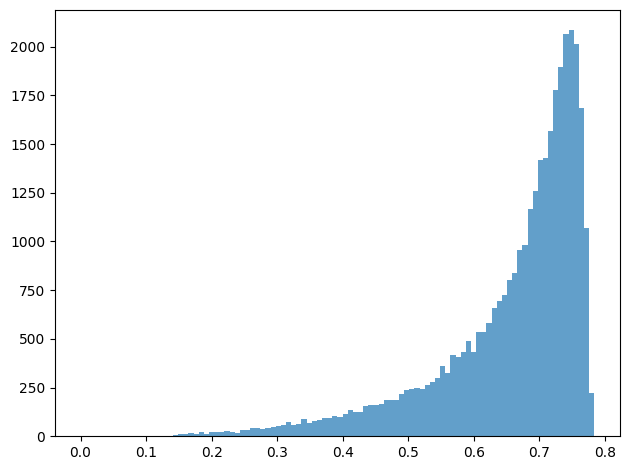

>>>>>> num - Re: 0.7395999999999999 - Im: 0
>>>>>> den - Re: [[0.546], [0.37], [0.435], [0.465], ... [-0.0785], [0.587], [0.354], [0.451]] - Im: [[-0.629], [-0.714], [-0.695], [-0.683], ... [-0.761], [-0.576], [-0.718], [-0.689]]
 ---> Plotting ---> 


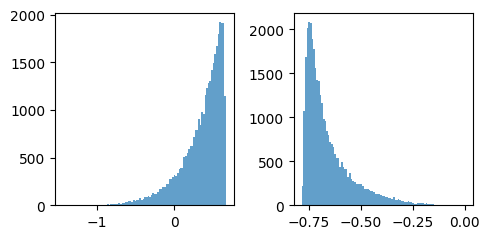

>>>>>> BWIGML out: [[0.582], [0.423], [0.478], [0.504], ... [-0.0993], [0.642], [0.409], [0.492]]	[[0.67], [0.816], [0.765], [0.74], [0.55, ... [0.962], [0.629], [0.829], [0.751]]
 ---> Plotting ---> 


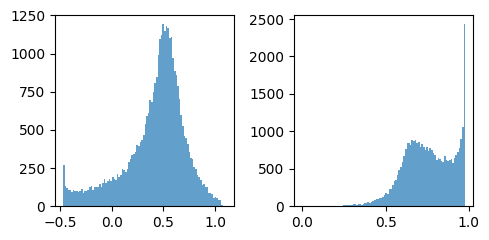

>>>>>> BWIGML : End 
>>>> FF03 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>> M: 1.186
>>>>>> G: 0.35
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.406596
>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.193], [0.369], [0.305], [0.274], ... [0.818], [0.152], [0.386], [0.288]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.406596
>>>>>>>> L: 0
>>>>>>>> G: 0.35
>>>>>>>> W: [[0.44], [0.608], [0.552], [0.524], [0.326, ... [0.904], [0.39], [0.621], [0.537]]
>>>>>>>> M: 1.186
>>>>>>>> QS: [[0.347], [0.545], [0.482], [0.449], ... [0.863], [0.282], [0.559], [0.464]]
>>>>>>>> QM: 1.1548685075842011
>>>>>>>> IPOW: 1
>>>>>>>> WGS: [[0.336], [0.382], [0.372], [0.365], ... [0.407], [0.308], [0.384], [0.369]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2: [[True], [True], [True], [T

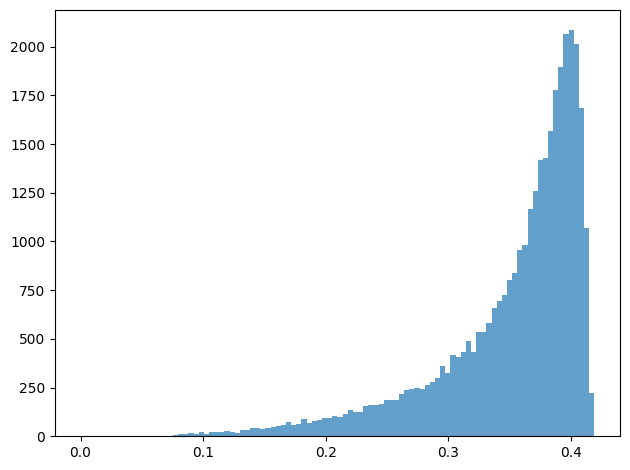

>>>>>> num - Re: 1.406596 - Im: 0
>>>>>> den - Re: [[1.21], [1.04], [1.1], [1.13], [1.3], ... [1.26], [0.588], [1.25], [1.02], [1.12]] - Im: [[-0.336], [-0.382], [-0.372], [-0.365], ... [-0.407], [-0.308], [-0.384], [-0.369]]
 ---> Plotting ---> 


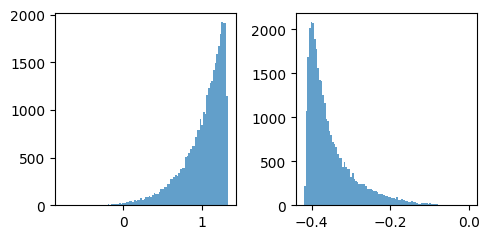

>>>>>> BWIGML out: [[1.08], [1.19], [1.15], [1.13], [1.05], ... [1.05], [1.62], [1.06], [1.21], [1.13]]	[[0.298], [0.44], [0.387], [0.363], [0.192, ... [1.12], [0.26], [0.454], [0.374]]
 ---> Plotting ---> 


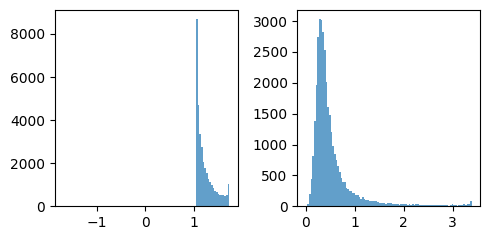

>>>>>> BWIGML : End 
>>>> F3PIFactor: [[1.45], [-2], [2.28], [0.653], [2.15], ... -1.89], [0.704], [1.97], [0.829], [-1.9]]	[[0.744], [4.58], [1.32], [5.93], [6.1], ... [4], [-0.619], [1], [0.35], [4.44]]


>>>> \\ F3PI ///
 ---> Plotting ---> 


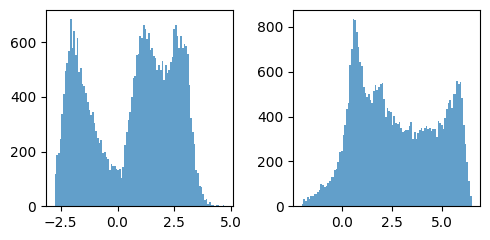

>>>>>> FA1A1P : Start
>>>>>>>> WGA1 : Start
>>>>>>>> S: [[1.11], [1.54], [1.15], [1.14], [1.22], ... [1.08], [1.55], [0.619], [1], [1.35]]
>>>>>>>>>> WGA1C : Start
>>>>>>>>>> G1_IM: [[4.55], [8.04], [4.86], [4.81], [5.47], ... [4.19], [8.08], [0.287], [3.47], [6.54]]
>>>>>>>>>> WGA1C : End 
>>>>>>>>>> WGA1N : Start
>>>>>>>>>> G1_IM: [[4.65], [8.05], [4.96], [4.91], [5.56], ... [4.3], [8.08], [0.316], [3.58], [6.6]]
>>>>>>>>>> WGA1N : End
>>>>>>>> S > MK1SQ: [[False], [False], [False], [False], ... [False], [False], [False], [False]]
>>>>>>>> GKST: [[0], [0], [0], [0], [0], [0], [0], [0], ... [0], [0], [0], [0], [0], [0], [0], [0]]
>>>>>>>> out: [[0.523], [0.914], [0.558], [0.552], ... [0.918], [0.0343], [0.4], [0.747]]
>>>>>>>> WGA1 : End
>>>>>> FA1A1P: <TComplex.TComplex object at 0x3126cbf10>
>>>>>> FA1A1P : End
>>>> FORMA1: [[1.84], [0.229], [1.75], [1.76], [1.51], ... 1.92], [0.213], [1.61], [2.02], [0.97]]	[[1.57], [2.11], [1.7], [1.68], [1.94], ... [1.41], [2.1], [0.0458], [1.08]

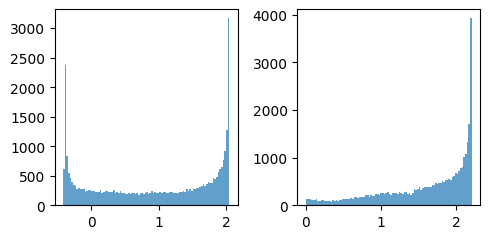

>>>> F3PIFactor x FORMA1: [[1.51], [-10.1], [1.74], [-8.8], [-8.57, ... -9.27], [1.45], [3.13], [1.3], [-11.5]]	[[3.65], [-3.16], [6.2], [11.6], [13.4], ... [5.03], [1.35], [1.71], [1.61], [0.175]]
>>>> \\ F3PIFactor x FORMA1 ///
 ---> Plotting ---> 


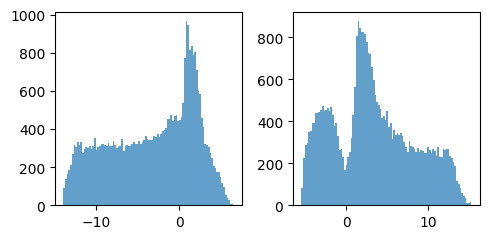

>>>> F3PI : End


>> F2: [[-1.43], [9.53], [-1.64], [8.3], [8.08, ... [-1.37], [-2.95], [-1.22], [10.9]]	[[-3.44], [2.98], [-5.84], [-10.9], ... [-1.27], [-1.61], [-1.51], [-0.165]]

 ---> Plotting ---> 


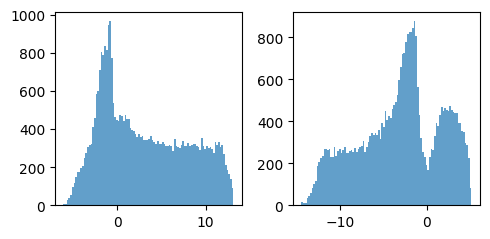

>> F3 ===>
>>>> F3PI --- : --- Start ---
>>>> BT1: 1.0	0.0
>>>> BT2: -0.11994078724388779	0.0037692910893753883
>>>> BT3: 0.3296724139496961	-0.16797648490363232
>>>> BT4: -0.0818742325871075	0.8661389092046796
>>>> BT5: -0.1330407333558646	0.6974239480173688
>>>> BT6: 1.5752332462239653	1.388754917179669
>>>> BT7: -0.09650658984451436	-0.7639283200121479
>>>> IDK: 1
>>>> IFORM: 3
>>>> S1: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>> S2: [[0.202], [0.657], [0.372], [0.58], [0.556, ... [0.202], [0.294], [0.114], [0.66]]
>>>> S3: [[0.196], [0.372], [0.307], [0.277], ... [0.821], [0.155], [0.389], [0.291]]
 ---> Plotting ---> 


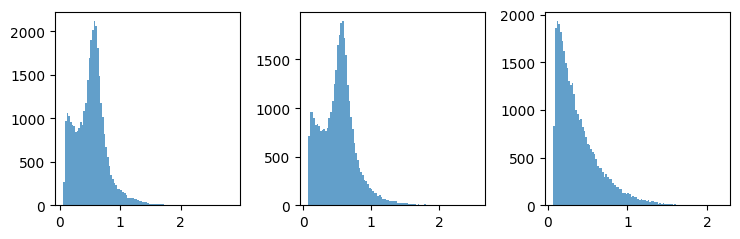

>>>> F34A: [[0.00253], [0.0955], [0.0221], [0.102], ... [-0.206], [0.0467], [-0.091], [0.124]]
>>>> F34B: [[-0.192], [-0.0662], [-0.0726], [-0.0218, ... [-0.0245], [-0.0554], [-0.0547]]
>>>> F35: [[-0.285], [0.044], [-0.0758], [0.12], ... [-0.189], [0.0333], [-0.22], [0.103]]
>>>> FRO1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> M: 0.7743


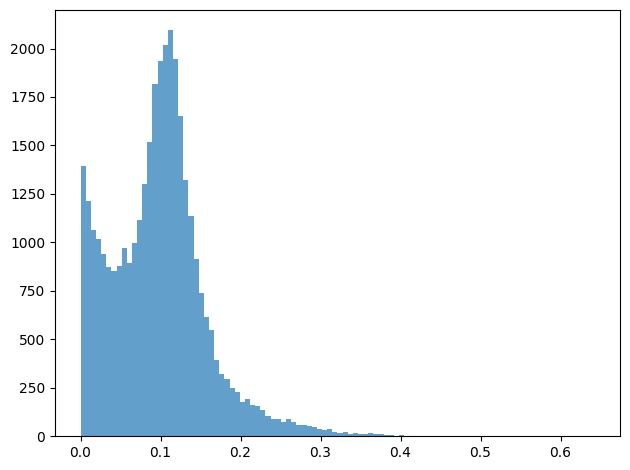

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[-0.172], [0.0302], [0.0757], [0.259], ... [0.0188], [0.373], [0.046], [0.146]] - Im: [[-0.156], [-0.108], [-0.0978], [-0.0552, ... [-0.0291], [-0.105], [-0.0813]]
 ---> Plotting ---> 


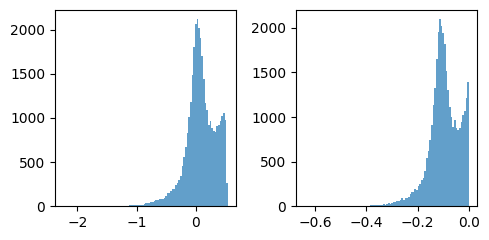

>>>>>> BWIGML out: [[-1.91], [1.43], [2.97], [2.22], [-0.43], ... [1.98], [0.89], [1.6], [2.11], [3.13]]	[[1.73], [5.13], [3.84], [0.473], [5.05], ... 0.311], [5.25], [0.125], [4.8], [1.74]]
 ---> Plotting ---> 


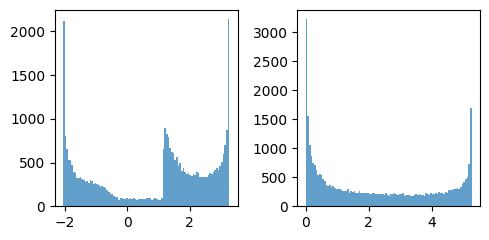

>>>>>> BWIGML : End 
>>>> FRP1 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.1349766
>>>>>> m2: 0.13957018
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.772], [0.569], [0.524], [0.341], ... [0.581], [0.227], [0.554], [0.453]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.878], [0.755], [0.724], [0.584], ... [0.762], [0.476], [0.744], [0.673]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.834], [0.703], [0.67], [0.515], ... [0.711], [0.389], [0.692], [0.615]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.198], [0.138], [0.124], [0.0702], ... [0.141], [0.0371], [0.133], [0.103]]
>>>>>>>> GetWGS :

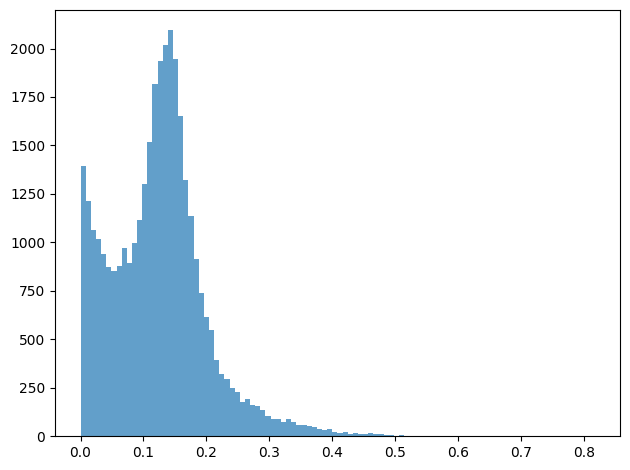

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.11], [1.31], [1.35], [1.54], [1.27], ... [1.57], [1.3], [1.65], [1.32], [1.42]] - Im: [[-0.198], [-0.138], [-0.124], [-0.0702], ... -0.141], [-0.0371], [-0.133], [-0.103]]
 ---> Plotting ---> 


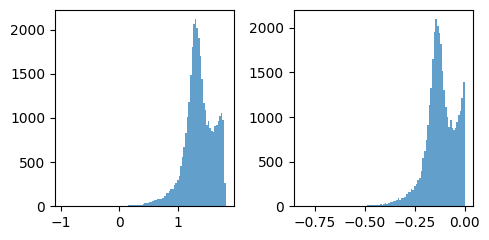

>>>>>> BWIGML out: [[1.65], [1.42], [1.38], [1.22], [1.46], ... [1.19], [1.43], [1.14], [1.4], [1.31]]	[[0.295], [0.15], [0.126], [0.0557], ... [0.156], [0.0255], [0.141], [0.0953]]
 ---> Plotting ---> 


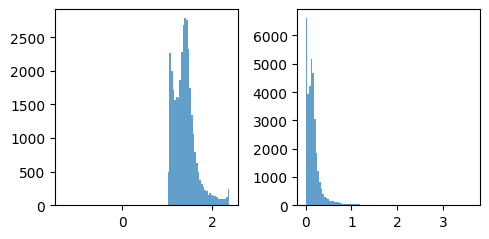

>>>>>> BWIGML : End 
>>>> FRO2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.202], [0.657], [0.372], [0.58], [0.556, ... [0.202], [0.294], [0.114], [0.66]]
>>>>>> M: 0.7743
>>>>>> G: 0.1491
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 0.59954049
>>>>>> W: [[0.449], [0.811], [0.61], [0.762], [0.746, ... [0.45], [0.542], [0.338], [0.813]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.202], [0.657], [0.372], [0.58], [0.556, ... [0.202], [0.294], [0.114], [0.66]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 0.59954049
>>>>>>>> L: 1
>>>>>>>> G: 0.1491
>>>>>>>> W: [[0.449], [0.811], [0.61], [0.762], [0.746, ... [0.45], [0.542], [0.338], [0.813]]
>>>>>>>> M: 0.7743
>>>>>>>> QS: [[0.356], [0.763], [0.545], [0.71], ... [0.356], [0.467], [0.198], [0.765]]
>>>>>>>> QM: 0.723979355706531
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.0236], [0.129], [0.0625], [0.111], ... [0.0237], [0.0443], [0.00538], [0.13]]

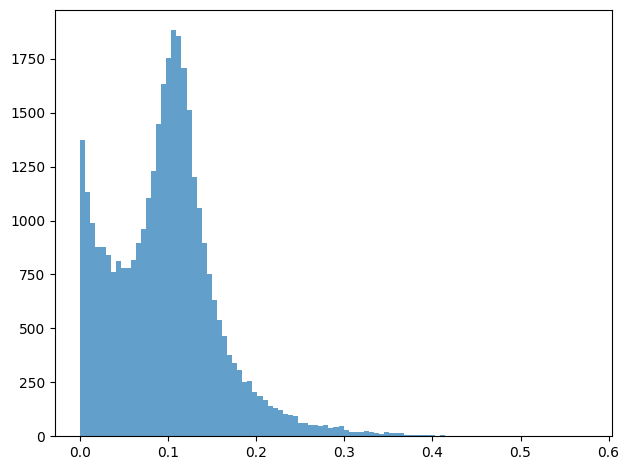

>>>>>> num - Re: 0.59954049 - Im: 0
>>>>>> den - Re: [[0.398], [-0.0578], [0.227], [0.0194], ... [0.397], [0.306], [0.485], [-0.0608]] - Im: [[-0.0236], [-0.129], [-0.0625], [-0.111, ... [-0.0443], [-0.00538], [-0.13]]
 ---> Plotting ---> 


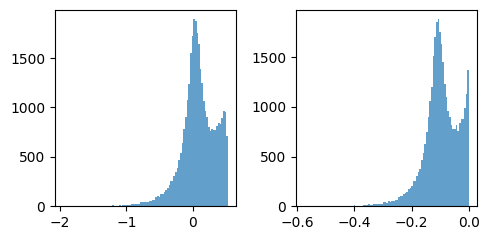

>>>>>> BWIGML out: [[1.5], [-1.74], [2.45], [0.917], [2.02], ... -1.97], [1.5], [1.92], [1.24], [-1.78]]	[[0.0893], [3.87], [0.675], [5.25], ... [0.0898], [0.278], [0.0137], [3.79]]
 ---> Plotting ---> 


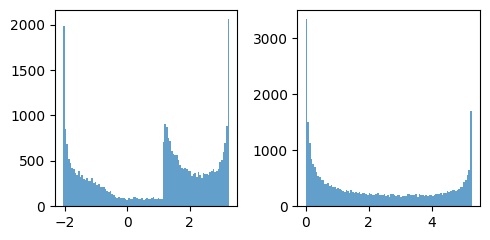

>>>>>> BWIGML : End 
>>>> FRP2 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.202], [0.657], [0.372], [0.58], [0.556, ... [0.202], [0.294], [0.114], [0.66]]
>>>>>> M: 1.37
>>>>>> G: 0.386
>>>>>> m1: 0.13957018
>>>>>> m2: 0.1349766
>>>>>> MP: 0.0753759344083684
>>>>>> MM: 2.1100977216399873e-05
>>>>>> MSQ: 1.8769000000000002
>>>>>> W: [[0.449], [0.811], [0.61], [0.762], [0.746, ... [0.45], [0.542], [0.338], [0.813]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.202], [0.657], [0.372], [0.58], [0.556, ... [0.202], [0.294], [0.114], [0.66]]
>>>>>>>> MP: 0.0753759344083684
>>>>>>>> MM: 2.1100977216399873e-05
>>>>>>>> MSQ: 1.8769000000000002
>>>>>>>> L: 1
>>>>>>>> G: 0.386
>>>>>>>> W: [[0.449], [0.811], [0.61], [0.762], [0.746, ... [0.45], [0.542], [0.338], [0.813]]
>>>>>>>> M: 1.37
>>>>>>>> QS: [[0.356], [0.763], [0.545], [0.71], ... [0.356], [0.467], [0.198], [0.765]]
>>>>>>>> QM: 1.34220110714658
>>>>>>>> IPOW: 3
>>>>>>>> WGS: [[0.03], [0.164], [0.0795], [0.141], ... [0.0302], [0.0563], [0.00684], 

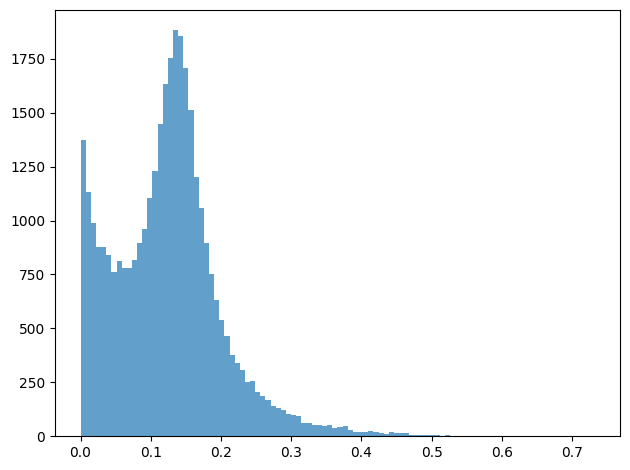

>>>>>> num - Re: 1.8769000000000002 - Im: 0
>>>>>> den - Re: [[1.67], [1.22], [1.5], [1.3], [1.32], ... [1.2], [1.67], [1.58], [1.76], [1.22]] - Im: [[-0.03], [-0.164], [-0.0795], [-0.141, ... [-0.0563], [-0.00684], [-0.165]]
 ---> Plotting ---> 


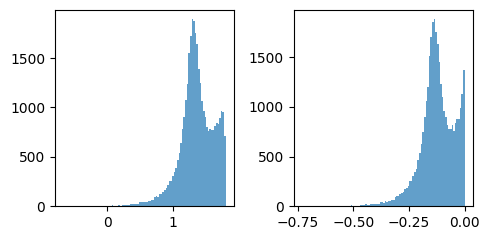

>>>>>> BWIGML out: [[1.12], [1.51], [1.24], [1.43], [1.41], ... [1.54], [1.12], [1.18], [1.06], [1.51]]	[[0.0201], [0.203], [0.0657], [0.156], ... [0.0202], [0.0421], [0.00413], [0.205]]
 ---> Plotting ---> 


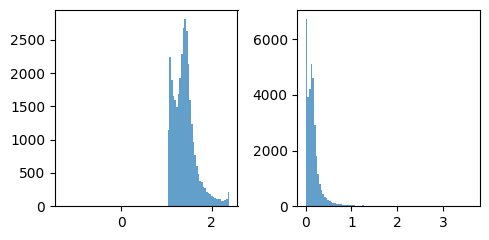

>>>>>> BWIGML : End 
>>>> FF23 ===>
>>>>>> BWIGML : Start 
>>>>>> S: [[0.196], [0.372], [0.307], [0.277], ... [0.821], [0.155], [0.389], [0.291]]
>>>>>> M: 1.275
>>>>>> G: 0.185
>>>>>> m1: 0.1349766
>>>>>> m2: 0.1349766
>>>>>> MP: 0.07287473019024
>>>>>> MM: 0.0
>>>>>> MSQ: 1.6256249999999999
>>>>>> W: [[0.442], [0.61], [0.554], [0.526], [0.33, ... [0.906], [0.393], [0.623], [0.539]]
>>>>>>>> GetWGS : Start
>>>>>>>> S: [[0.196], [0.372], [0.307], [0.277], ... [0.821], [0.155], [0.389], [0.291]]
>>>>>>>> MP: 0.07287473019024
>>>>>>>> MM: 0.0
>>>>>>>> MSQ: 1.6256249999999999
>>>>>>>> L: 2
>>>>>>>> G: 0.185
>>>>>>>> W: [[0.442], [0.61], [0.554], [0.526], [0.33, ... [0.906], [0.393], [0.623], [0.539]]
>>>>>>>> M: 1.275
>>>>>>>> QS: [[0.35], [0.547], [0.484], [0.452], [0.19, ... [0.865], [0.286], [0.562], [0.467]]
>>>>>>>> QM: 1.246094005205771
>>>>>>>> IPOW: 5
>>>>>>>> WGS: [[0.0012], [0.00803], [0.00481], [0.00358, ... [0.000485], [0.009], [0.00411]]
>>>>>>>> GetWGS : End
>>>>>> W > m1+m2

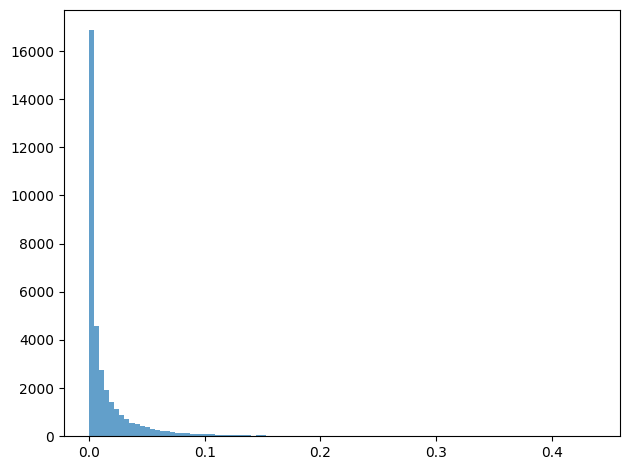

>>>>>> num - Re: 1.6256249999999999 - Im: 0
>>>>>> den - Re: [[1.43], [1.25], [1.32], [1.35], [1.52], ... [1.48], [0.805], [1.47], [1.24], [1.33]] - Im: [[-0.0012], [-0.00803], [-0.00481], ... [-0.000485], [-0.009], [-0.00411]]
 ---> Plotting ---> 


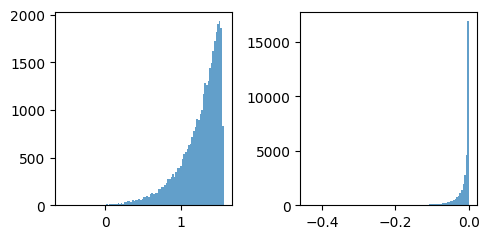

>>>>>> BWIGML out: [[1.14], [1.3], [1.23], [1.21], [1.07], ... [1.1], [2.01], [1.11], [1.31], [1.22]]	[[0.000951], [0.00831], [0.0045], [0.0032, ... [0.000365], [0.00956], [0.00375]]
 ---> Plotting ---> 


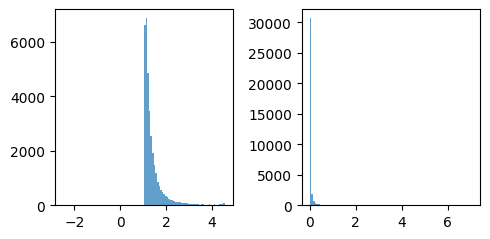

>>>>>> BWIGML : End 
>>>> F3PIFactor: [[-0.0358], [0.111], [-0.0118], [0.0275, ... -0.0896], [0.00194], [-0.0928], [0.137]]	[[-0.363], [0.106], [-0.0862], [0.124], ... [-0.78], [0.0416], [-0.462], [0.0779]]


>>>> \\ F3PI ///
 ---> Plotting ---> 


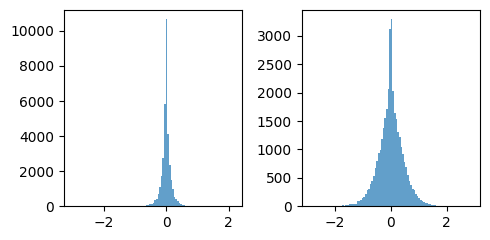

>>>>>> FA1A1P : Start
>>>>>>>> WGA1 : Start
>>>>>>>> S: [[1.11], [1.54], [1.15], [1.14], [1.22], ... [1.08], [1.55], [0.619], [1], [1.35]]
>>>>>>>>>> WGA1C : Start
>>>>>>>>>> G1_IM: [[4.55], [8.04], [4.86], [4.81], [5.47], ... [4.19], [8.08], [0.287], [3.47], [6.54]]
>>>>>>>>>> WGA1C : End 
>>>>>>>>>> WGA1N : Start
>>>>>>>>>> G1_IM: [[4.65], [8.05], [4.96], [4.91], [5.56], ... [4.3], [8.08], [0.316], [3.58], [6.6]]
>>>>>>>>>> WGA1N : End
>>>>>>>> S > MK1SQ: [[False], [False], [False], [False], ... [False], [False], [False], [False]]
>>>>>>>> GKST: [[0], [0], [0], [0], [0], [0], [0], [0], ... [0], [0], [0], [0], [0], [0], [0], [0]]
>>>>>>>> out: [[0.523], [0.914], [0.558], [0.552], ... [0.918], [0.0343], [0.4], [0.747]]
>>>>>>>> WGA1 : End
>>>>>> FA1A1P: <TComplex.TComplex object at 0x31248ed50>
>>>>>> FA1A1P : End
>>>> FORMA1: [[1.84], [0.229], [1.75], [1.76], [1.51], ... 1.92], [0.213], [1.61], [2.02], [0.97]]	[[1.57], [2.11], [1.7], [1.68], [1.94], ... [1.41], [2.1], [0.0458], [1.08]

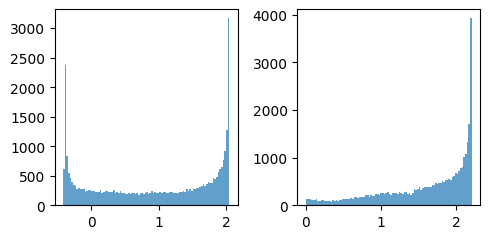

>>>> F3PIFactor x FORMA1: [[0.503], [-0.197], [0.126], [-0.16], ... [1.62], [0.00123], [0.312], [-0.0368]]	[[-0.725], [0.258], [-0.171], [0.265], ... [-0.355], [0.0672], [-1.04], [0.374]]
>>>> \\ F3PIFactor x FORMA1 ///
 ---> Plotting ---> 


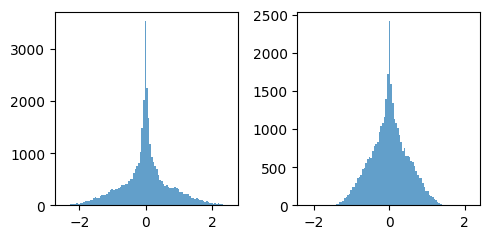

>>>> F3PI : End


>> F3: [[0.475], [-0.186], [0.119], [-0.151], ... [1.53], [0.00116], [0.294], [-0.0347]]	[[-0.684], [0.243], [-0.161], [0.25], ... [-0.334], [0.0634], [-0.976], [0.353]]

 ---> Plotting ---> 


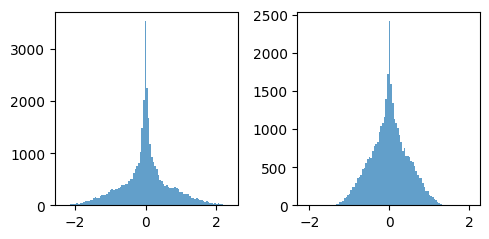

>>>> CLVEC --- : --- Start ---
>>>> HN: [[-6.99e+03], [4.89e+03], [551], [-1.68e+03, ... [6.19e+03], [630], [4.33e+03]]	[[6.16e+03], [-701], [2.35e+03], ... [3.65e+03], [-3.8e+03], [-1.12e+03]]
 ---> Plotting ---> 


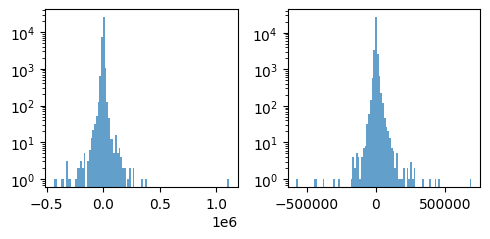

>>>> HCN: [[-6.99e+03], [4.89e+03], [551], [-1.68e+03, ... [6.19e+03], [630], [4.33e+03]]	[[-6.16e+03], [701], [-2.35e+03], ... [-3.65e+03], [3.8e+03], [1.12e+03]]
 ---> Plotting ---> 


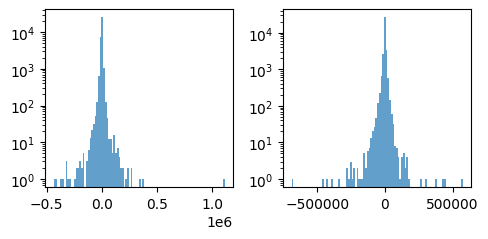

>>>> HH: [[8.28e+07], [5.54e+07], [7.3e+06], ... [4.86e+06], [1.47e+07], [6.73e+07]]
 ---> Plotting ---> 


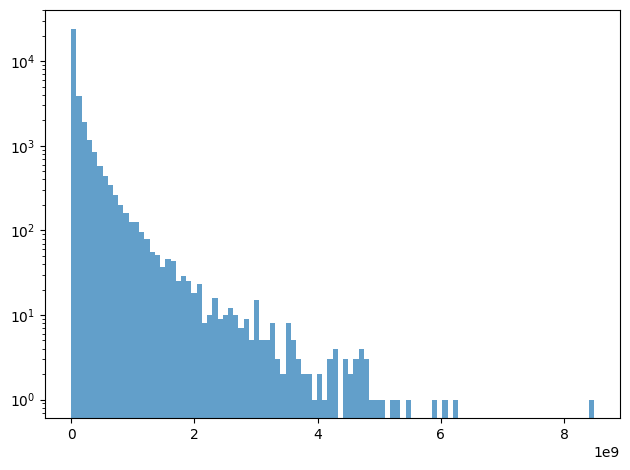

>>>> PIVEC0: [[1.17e+10], [2.01e+09], [3.19e+08], ... [4.76e+09], [1.13e+09], [3.38e+09]]
>>>> PIVEC1: [[1.03e+10], [1.17e+09], [2.8e+08], ... [9.78e+08], [-1.05e+09], [-1.58e+09]]
>>>> PIVEC2: [[4.67e+09], [1.42e+09], [1.53e+08], ... [4.56e+09], [-3.21e+08], [-2.44e+09]]
>>>> PIVEC3: [[3.09e+09], [-8.01e+08], [1.71e+07], ... [-9.15e+08], [2.69e+08], [1.73e+09]]
>>>> out: [[{x: 1.03e+10, y: 4.67e+09, z: 3.09e+09, ... z: 1.73e+09, t: 3.38e+09}]]
>>>> CLVEC : End
>>>> CLAXI : Start
>>>> d12: [[8.94e+05], [6.69e+05], [-3.83e+05], ... [-2.36e+04], [3.01e+04], [-1.59e+06]] 
>>>> d13: [[2.96e+05], [-7.57e+05], [-3.37e+05], ... [2.06e+03], [4.66e+04], [3.85e+05]] 
>>>> d14:[[4.41e+05], [7.99e+05], [-2.17e+05], ... [-2.3e+04], [5.03e+03], [1.37e+06]] 
>>>> d23: [[-1.24e+05], [-4.59e+05], [-1.76e+05], ... [-1.24e+04], [2.14e+04], [-1.15e+06]] 
>>>> d24: [[-8.15e+05], [-1.78e+05], [3.18e+05], ... [7.28e+03], [3.38e+04], [-1.29e+06]] 
>>>> d34: [[-2.09e+05], [7.5e+05], [3.79e+05], ... [1.15e+04],

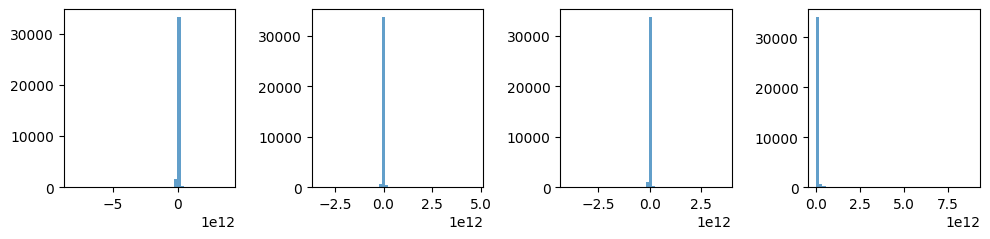

>> CLA ===>
    px: [[1e+06], [-3.83e+04], [-5.13e+05], ... [2.41e+03], [-3.33e+04], [4.42e+03]]
    py: [[4.78e+05], [-3.93e+04], [-3.03e+05], ... [6.29e+03], [-1.06e+04], [1.25e+04]]
    pz: [[2.5e+05], [3.15e+04], [-3.95e+04], [4.6e+05, ... [841], [1.08e+04], [-1.48e+04]]
    E: [[1.14e+06], [-6.27e+04], [-5.97e+05], ... [6.37e+03], [3.65e+04], [-1.86e+04]]
 ---> Plotting ---> 


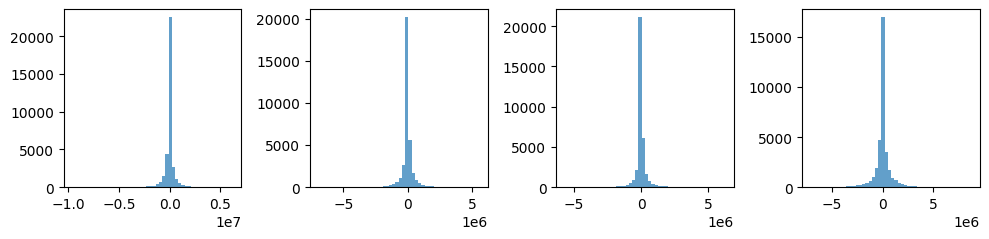

>> P.CLV: [[7.33e+11], [1.21e+11], [1.95e+10], ... [2.97e+11], [7.08e+10], [2.11e+11]]
>> P.CLA: [[7.1e+07], [-3.8e+06], [-3.66e+07], ... [3.98e+05], [2.28e+06], [-1.16e+06]]
>> omega: [[7.33e+11], [1.21e+11], [1.96e+10], ... [2.97e+11], [7.08e+10], [2.11e+11]]
 ---> Plotting ---> 


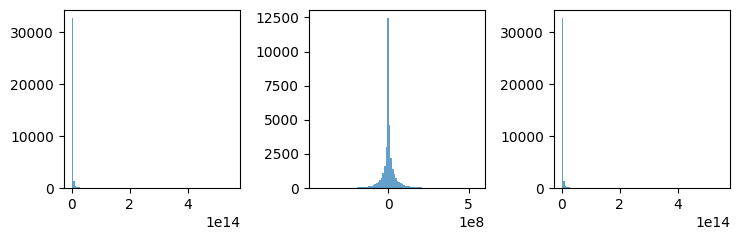

>> P.mass: [[1.78], [1.78], [1.78], [1.78], [1.78], ... [1.78], [1.78], [1.78], [1.78], [1.78]]
>> P.mass**2: [[3.16], [3.16], [3.16], [3.16], [3.16], ... [3.16], [3.16], [3.16], [3.16], [3.16]]
>> CLA - CLV : [[{x: -1.03e+10, y: -4.67e+09, z: -3.09e+09, ... z: -1.73e+09, t: -3.38e+09}]]
>> P*(P.dot(CLA) - P.dot(CLV)): [[{x: -4.07e+13, y: -1.78e+13, z: -1.11e+13, ... z: -6.62e+12, t: -1.32e+13}]]	[[{x: -4.07e+13, y: -1.78e+13, z: -1.11e+13, ... z: -6.62e+12, t: -1.32e+13}]]
>> 1/omega/P.mass: [[7.68e-13], [4.64e-12], [2.88e-11], ... [1.89e-12], [7.95e-12], [2.67e-12]]
>> PVC out : [[{x: 31.2, y: 13.6, z: 8.49, t: 35.1}], ... y: -26.1, z: 17.6, t: 35.2}]]
 ---> Plotting ---> 


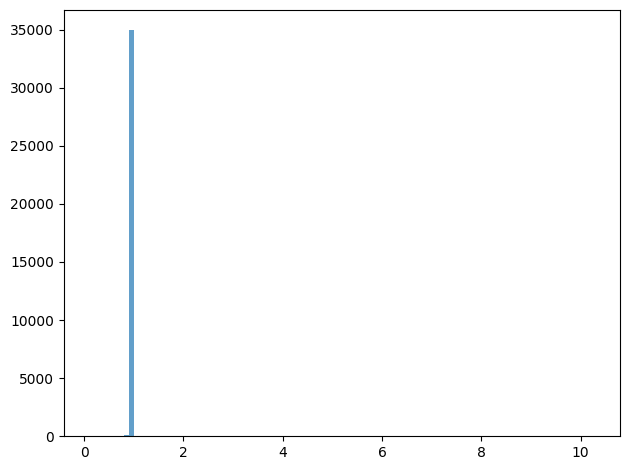

>> PVC : End 
  hvec : [[{x: -31.2, y: -13.6, z: -8.49}], [{x: -18.8, ... [{x: 15.7, y: 26.1, z: -17.6}]]
    x: [[-31.2], [-18.8], [-29.2], [31.6], [31.9, ... [-9.46], [-6.99], [32.7], [15.7]]
    y: [[-13.6], [-24.4], [-18.1], [-11.4], [-6.01, ... [-15.1], [-33.8], [8.8], [26.1]]
    z: [[-8.49], [14.7], [-2.04], [-10.6], [13.5, ... [-30.3], [6.56], [-9.25], [-17.6]]
h1: unitvec
    x: [[0.889], [0.551], [0.849], [-0.897], ... [0.269], [0.199], [-0.932], [-0.447]]
    y: [[0.389], [0.715], [0.526], [0.323], ... [0.429], [0.962], [-0.251], [-0.741]]
    z: [[0.242], [-0.43], [0.0592], [0.301], ... [0.863], [-0.187], [0.263], [0.501]]
 ---> Plotting ---> 


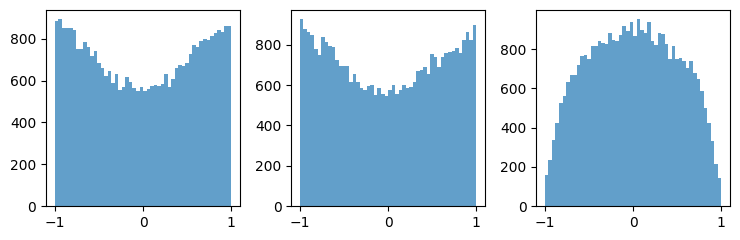

h2: unitvec
    x: [[-0.889], [-0.551], [-0.849], [0.897], ... [-0.269], [-0.199], [0.932], [0.447]]
    y: [[-0.389], [-0.715], [-0.526], [-0.323], ... [-0.429], [-0.962], [0.251], [0.741]]
    z: [[-0.242], [0.43], [-0.0592], [-0.301], ... [-0.863], [0.187], [-0.263], [-0.501]]
 ---> Plotting ---> 


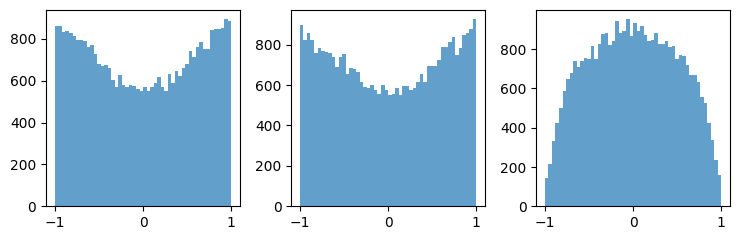

tau- hrest unit
    x: [[-0.889], [-0.551], [-0.849], [0.897], ... [-0.269], [-0.199], [0.932], [0.447]]
    y: [[-0.389], [-0.715], [-0.526], [-0.323], ... [-0.429], [-0.962], [0.251], [0.741]]
    z: [[-0.242], [0.43], [-0.0592], [-0.301], ... [-0.863], [0.187], [-0.263], [-0.501]]
 ---> Plotting ---> 


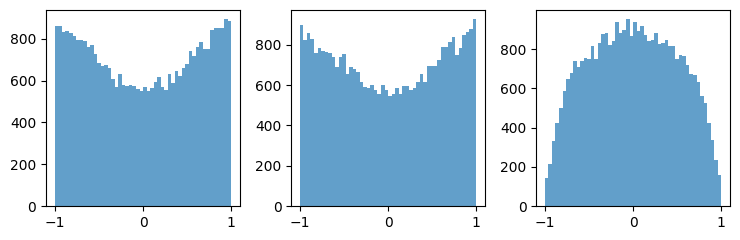

tau+ hrest unit
    x: [[0.889], [0.551], [0.849], [-0.897], ... [0.269], [0.199], [-0.932], [-0.447]]
    y: [[0.389], [0.715], [0.526], [0.323], ... [0.429], [0.962], [-0.251], [-0.741]]
    z: [[0.242], [-0.43], [0.0592], [0.301], ... [0.863], [-0.187], [0.263], [0.501]]
 ---> Plotting ---> 


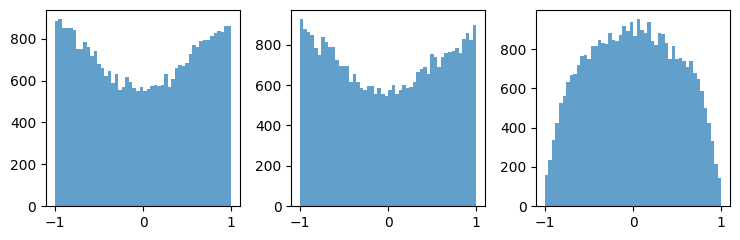

k1raw
    x: [[2.84e-05], [6.3e-07], [-3.32e-06], ... [7.61e-06], [2.54e-06], [2.97e-05]]
    y: [[-0.000157], [8.66e-06], [5.43e-06], ... [-2.14e-06], [2.88e-05], [-8.12e-07]]
    z: [[0.000148], [1.52e-05], [-6.3e-07], ... [-2.9e-06], [3.64e-05], [2.52e-05]]
 ---> Plotting ---> 


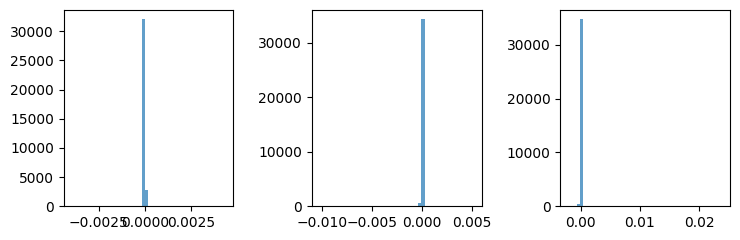

k2raw
    x: [[-4.83e-06], [-1.56e-05], [1.34e-07], ... [4.87e-06], [-1.22e-05], [1.4e-05]]
    y: [[1.68e-05], [2.75e-05], [-5.38e-06], ... [9.09e-08], [1.93e-05], [4.51e-06]]
    z: [[-9.24e-06], [2.58e-05], [4.59e-05], ... [5.66e-06], [-2.49e-05], [1.92e-05]]
 ---> Plotting ---> 


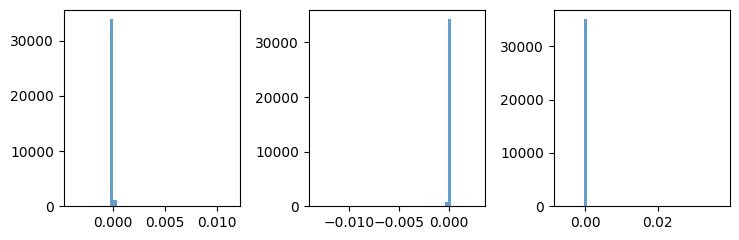

k1: unitvec
    x: [[0.13], [0.036], [-0.519], [0.226], ... [-0.471], [0.904], [0.0546], [0.761]]
    y: [[-0.722], [0.495], [0.849], [0.922], ... [0.84], [-0.254], [0.62], [-0.0208]]
    z: [[0.68], [0.868], [-0.0986], [-0.315], ... [-0.27], [-0.344], [0.783], [0.648]]
 ---> Plotting ---> 


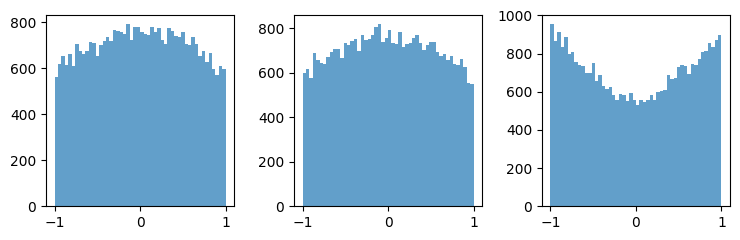

k2: unitvec
    x: [[-0.244], [-0.382], [0.00291], [0.441], ... [0.00442], [0.652], [-0.362], [0.58]]
    y: [[0.85], [0.674], [-0.116], [0.691], ... [-0.896], [0.0122], [0.571], [0.186]]
    z: [[-0.467], [0.632], [0.993], [0.573], ... [0.444], [0.758], [-0.737], [0.793]]
 ---> Plotting ---> 


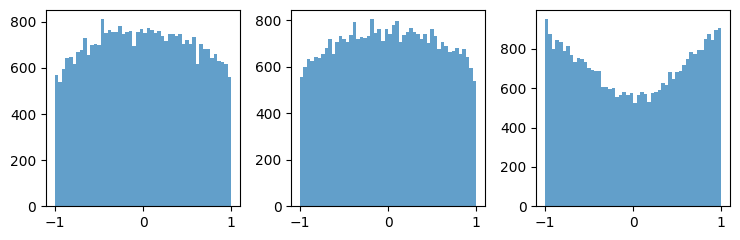

 -- Check -- : -- Strat --
 -- cosine angle between hi and tau+- 
 ---> Plotting ---> 


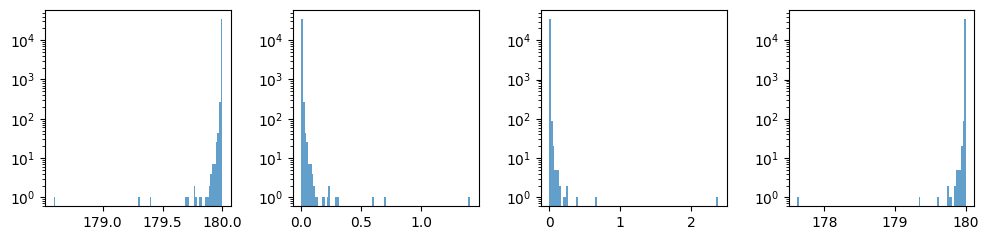

 -- h1xh2 --
    x: [[3.33e-05], [1.62e-05], [-3.4e-06], ... [2.38e-06], [1.46e-05], [1.58e-05]]
    y: [[-0.000174], [-1.89e-05], [1.07e-05], ... [-2.15e-06], [1.01e-05], [-5.43e-06]]
    z: [[0.000157], [-1.05e-05], [-4.65e-05], ... [-8.55e-06], [6.14e-05], [6.08e-06]]
 ---> Plotting ---> 


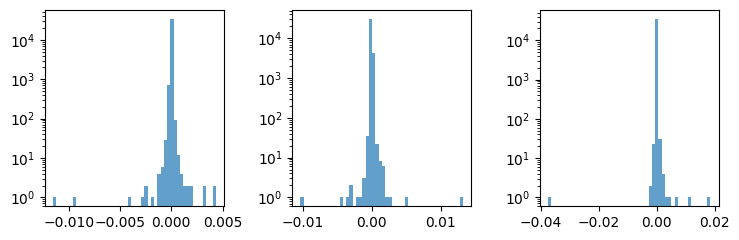

h1xh2.dot(p4_taum_hrest.pvec.unit) : h1xh2.dot(p4_taup_hrest.pvec.unit)
 ---> Plotting ---> 


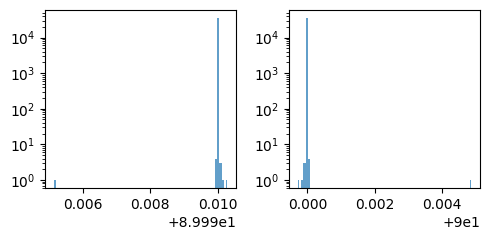

 -- Check -- : -- End --
Angle: [[-1.17e-09], [-3.55e-10], [2.89e-10], ... [-6.05e-11], [1.51e-09], [2.96e-10]]
 ---> Plotting ---> 


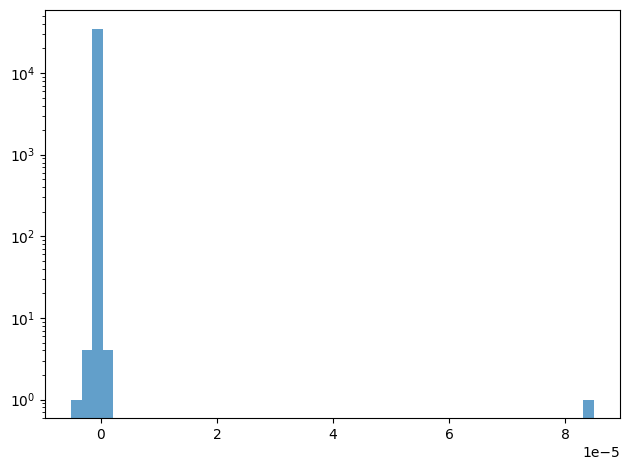

 ---> Plotting ---> 


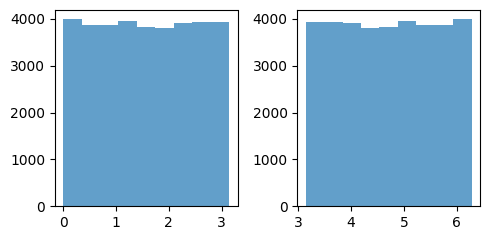

PhiCP: [[2.87], [0.519], [4.51], [0.981], [5.46], ... 4.07], [3.65], [1.24], [4.47], [5.97]]
 ---> Plotting ---> 


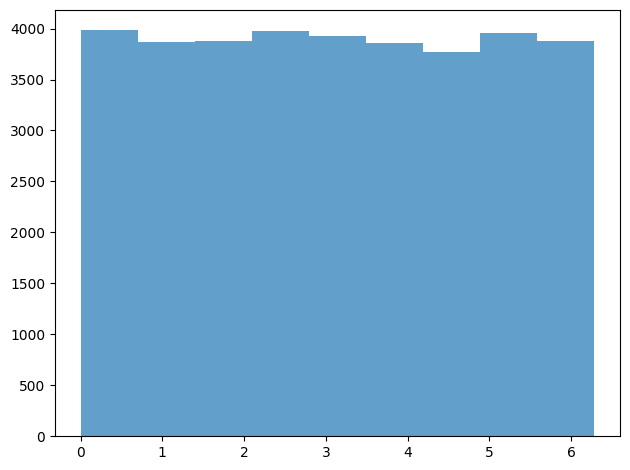

<Array [[2.87], [0.519], ... [4.47], [5.97]] type='35094 * option[var * ?float64]'>

In [35]:
phicp_obj = PhiCPComp(cat="a1a1", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
#phicp = phicp_obj.comp_PhiCP_DP()
phicp

 

--- get_evtinfo_a1a1 --- 
 --- get the masks to select a1-a1 events --- 
 --- then construct Lorentz vector --- 
Selection of a1-a1 pair [mask]: [False, False, False, False, False, False, ... False, False, False, False, False]
n total events: 1709262
n selected events: 35094
 [15]	[16, -211, -211, 211]
 [49.2]	[32.2, 2.53, 9.69, 4.83]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [76.8]	[21.1, 6.45, 7.28, 42]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [68.2]	[11.1, 17.9, 22.4, 16.8]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [49.8]	[18.4, 9.47, 17.6, 4.28]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [50.6]	[2.23, 38.9, 5.28, 4.28]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [74.2]	[36.5, 1.94, 17.2, 18.6]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [49.1]	[7.55, 15.4, 13.1, 13.1]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [69]	[25, 10.2, 19.2, 14.6]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [51]	[7.06, 23.6, 19.6, 0.699]
 [2]	[1, 1, 1, 1]
 [-15

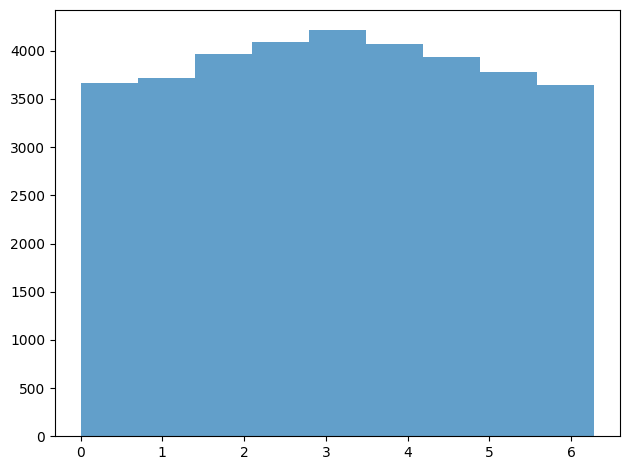

<Array [[6.02], [0.304], ... [1.39], [1.06]] type='35094 * option[var * ?float64]'>

In [36]:
phicp_obj = PhiCPComp(cat="a1a1", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
#phicp = phicp_obj.comp_phiCP()
phicp = phicp_obj.comp_PhiCP_DP()
phicp

In [37]:
"""
phicp_obj = PhiCPComp(cat="pipi", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
#phicp = phicp_obj.comp_PhiCP_DP()
phicp
"""

'\nphicp_obj = PhiCPComp(cat="pipi", \n                      taum=taum,\n                      taup=taup,\n                      taum_decay=taum_children,\n                      taup_decay=taup_children)\nphicp = phicp_obj.comp_phiCP()\n#phicp = phicp_obj.comp_PhiCP_DP()\nphicp\n'

In [38]:
"""
phicp_obj = PhiCPComp(cat="a1a1", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
phicp
"""

'\nphicp_obj = PhiCPComp(cat="a1a1", \n                      taum=taum,\n                      taup=taup,\n                      taum_decay=taum_children,\n                      taup_decay=taup_children)\nphicp = phicp_obj.comp_phiCP()\nphicp\n'

In [39]:
#ak.ravel(phicp)

In [40]:
#plothist(arrlist=[ak.ravel(phicp).to_numpy()], bins=9)

In [41]:
#10/2/5

In [42]:
from TComplex import TComplex

In [43]:
a = np.complex(2,2)
b = a

/var/folders/1h/pmwmdycj247fxs340zx84y5w0000gq/T/ipykernel_3279/1570323349.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.complex(2,2)


In [44]:
c = a**3

In [45]:
a, b, c

((2+2j), (2+2j), (-16+16j))

In [46]:
d = TComplex(ak.Array([[2,2], [3,3]]), ak.Array([[4,4], [6,6]]))
e = TComplex(ak.Array([[2,2], [3,3]]), ak.Array([[4,4], [6,6]]))
d, e

(<TComplex.TComplex at 0x3123a7790>, <TComplex.TComplex at 0x3126c4ed0>)

In [47]:
d.Re(), d.Im()

(<Array [[2, 2], [3, 3]] type='2 * var * int64'>,
 <Array [[4, 4], [6, 6]] type='2 * var * int64'>)

In [48]:
e.Re(), e.Im()

(<Array [[2, 2], [3, 3]] type='2 * var * int64'>,
 <Array [[4, 4], [6, 6]] type='2 * var * int64'>)

In [49]:
a = d/e

In [50]:
a.Im()

<Array [[0, 0], [0, 0]] type='2 * var * float64'>

In [51]:
a = TComplex(2,4)
b = TComplex(2,2)

In [52]:
c = a/b
c.Re(), c.Im()

(1.5, 0.5)

In [53]:
f = -e*e*e

In [54]:
d.Re(), e.Re(), f.Re()

(<Array [[2, 2], [3, 3]] type='2 * var * int64'>,
 <Array [[2, 2], [3, 3]] type='2 * var * int64'>,
 <Array [[88, 88], [297, 297]] type='2 * var * int64'>)

In [55]:
d.Im(), e.Im(), f.Im()

(<Array [[4, 4], [6, 6]] type='2 * var * int64'>,
 <Array [[4, 4], [6, 6]] type='2 * var * int64'>,
 <Array [[16, 16], [54, 54]] type='2 * var * int64'>)

In [56]:
f.Im()

<Array [[16, 16], [54, 54]] type='2 * var * int64'>

In [57]:
a = np.complex(2,2)
a

/var/folders/1h/pmwmdycj247fxs340zx84y5w0000gq/T/ipykernel_3279/2129234747.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.complex(2,2)


(2+2j)

In [58]:
a-2

2j

In [59]:
a/2

(1+1j)

In [60]:
a*2

(4+4j)